### Comparison between Hodgkin Huxley, LIF and AdEx on 10 sweeps of short square triple on Frontal Lobe of 25 yr old male with epilepsy

***
***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from brian2 import *
from brian2modelfitting import *
# from general_functions import *

WARNING    c:\Users\yjk16\anaconda3\envs\brianfit_env\lib\site-packages\brian2modelfitting\utils.py:1: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
 [py.warnings]


In [2]:
from general_functions import *

In [3]:
# sweep nos 100-109 from Allen...
input_current = pd.read_csv('short_square_triple_in.csv', index_col=0).to_numpy()
output_response = pd.read_csv('short_square_triple_out.csv', index_col=0).to_numpy()

input_current_amps = input_current * 10**-12

start = 100_000
end = 150_000

sliced_input_amps = input_current_amps[:, start:end]
sliced_output_res = output_response[:, start:end]

time_step = np.arange(0, len(input_current_amps[0]))
sampling_rate = 50000
# time_steps = time_step * (1/sampling_rate)

# dt = 1/sampling_rate
# dt_in_ms = (1/sampling_rate) * 1000

end2 = 20_000
fast_spikes_input = sliced_input_amps[2:6,:end2]
fast_spikes_output = sliced_output_res[2:6,:end2]

end3 = 7_500
fastspikes_input_sliced = fast_spikes_input[:,:end3]
fastspikes_output_sliced = fast_spikes_output[:,:end3]

***
***

# Initial analysis

***

A look at the input data and output response

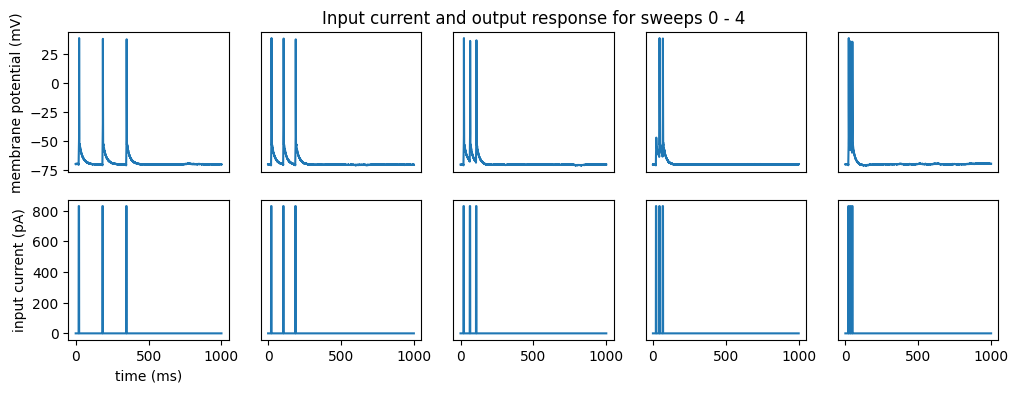

In [4]:
create_initial_in_out(sliced_output_res, sliced_input_amps* 10**12, 0)

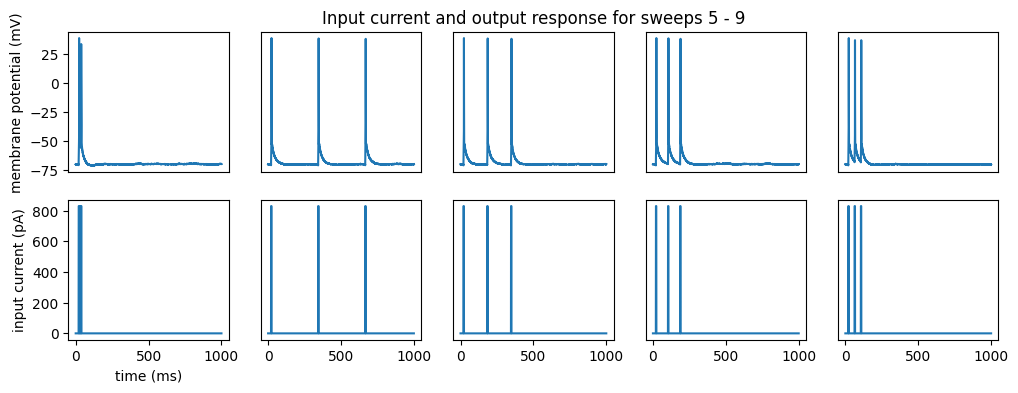

In [6]:
create_initial_in_out(sliced_output_res, sliced_input_amps*10**12, 5)

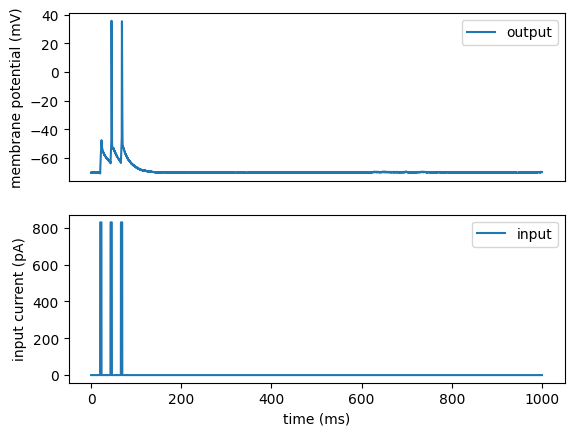

In [7]:
out_in_vertical(sliced_output_res[3], sliced_input_amps[3]*10**12)

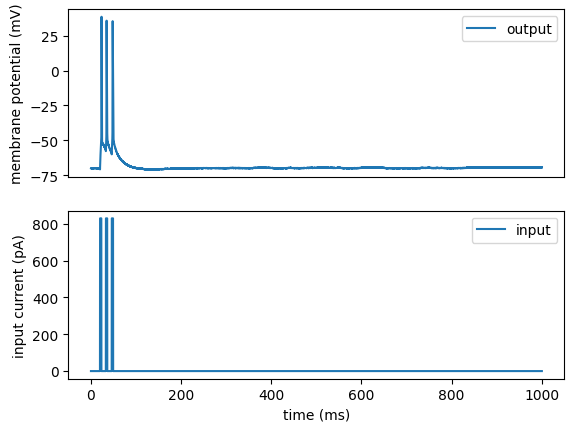

In [8]:
out_in_vertical(sliced_output_res[4], sliced_input_amps[4]*10**12)

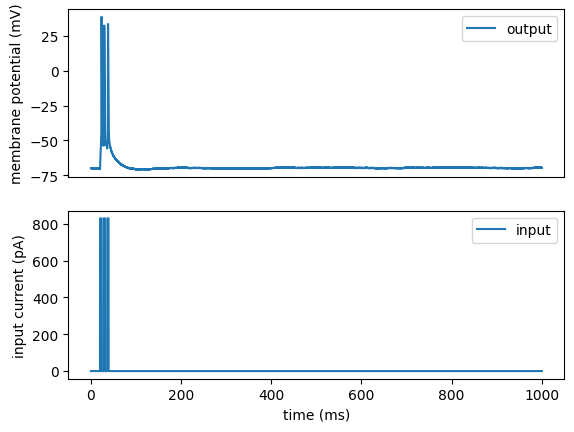

In [11]:
out_in_vertical(sliced_output_res[5], sliced_input_amps[5]*10**12)


***
***

# Run models

***

In [5]:
hh0 = run_hh(sliced_input_amps, sliced_output_res, dt_in_ms)

WARNING    Cannot use Cython, a test compilation failed: Cython is not available (ImportError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


first fit:
Round 0: Best parameters g_kd=2.40073454 uS, g_na=13.55715921 uS, gl=18.59774625 nS (error: 16.51389938 mV^2)
Round 1: Best parameters g_kd=3.18699091 uS, g_na=16.03907149 uS, gl=13.18240318 nS (error: 15.52850389 mV^2)
Round 2: Best parameters g_kd=3.18455713 uS, g_na=16.59947731 uS, gl=12.56638305 nS (error: 14.62940153 mV^2)
Round 3: Best parameters g_kd=3.1438585 uS, g_na=17.57210043 uS, gl=13.43692287 nS (error: 14.03028895 mV^2)
Round 4: Best parameters g_kd=3.30057564 uS, g_na=18.35532105 uS, gl=12.94205943 nS (error: 13.86585184 mV^2)
Round 5: Best parameters g_kd=3.37032035 uS, g_na=17.7864825 uS, gl=11.42263239 nS (error: 13.844019 mV^2)
Round 6: Best parameters g_kd=3.44476996 uS, g_na=18.61939353 uS, gl=11.92205916 nS (error: 13.77041107 mV^2)
Round 7: Best parameters g_kd=3.48715326 uS, g_na=18.94217418 uS, gl=11.8184598 nS (error: 13.66658348 mV^2)
Round 8: Best parameters g_kd=3.57504039 uS, g_na=19.0238376 uS, gl=11.10180698 nS (error: 13.62403376 mV^2)
Round

In [6]:
lif0 = run_lif(sliced_input_amps, sliced_output_res, dt_in_ms)

first fit:
Round 0: Best parameters R=207.3426468 Mohm, tau=24.33938799 ms (error: 13.77425232 mV^2)
Round 1: Best parameters R=203.94995103 Mohm, tau=19.13635477 ms (error: 13.67502234 mV^2)
Round 2: Best parameters R=189.32617539 Mohm, tau=22.88963425 ms (error: 13.65823402 mV^2)
Round 3: Best parameters R=214.37875246 Mohm, tau=20.18524519 ms (error: 13.62253737 mV^2)
Round 4: Best parameters R=219.95549925 Mohm, tau=20.84743859 ms (error: 13.6073272 mV^2)
Round 5: Best parameters R=219.68591187 Mohm, tau=20.74288786 ms (error: 13.60401123 mV^2)
Round 6: Best parameters R=219.68591187 Mohm, tau=20.74288786 ms (error: 13.60401123 mV^2)
Round 7: Best parameters R=219.68591187 Mohm, tau=20.74288786 ms (error: 13.60401123 mV^2)
Round 8: Best parameters R=171.52527071 Mohm, tau=20.18524519 ms (error: 13.59250158 mV^2)
Round 9: Best parameters R=171.52527071 Mohm, tau=20.18524519 ms (error: 13.59250158 mV^2)
Round 10: Best parameters R=171.52527071 Mohm, tau=20.18524519 ms (error: 13.5925

In [ ]:
# lif0 = run_lif(sliced_input_amps, sliced_output_res, dt_in_ms)

TypeError: Object of type <class 'function'> does not have dimensions

In [ ]:
# adex0 = run_adex()

TypeError: Object of type <class 'function'> does not have dimensions

In [5]:
adex0 = run_adex()

WARNING    Cannot use Cython, a test compilation failed: Cython is not available (ImportError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


first fit:
Round 0: Best parameters a=1.80326232 nS, b=55.6107584 pA, tauw=128.98417065 ms (error: 15.66543189 mV^2)
Round 1: Best parameters a=1.53335253 nS, b=29.06597519 pA, tauw=154.95805441 ms (error: 14.59079357 mV^2)
Round 2: Best parameters a=1.33874492 nS, b=24.34597514 pA, tauw=137.83866482 ms (error: 14.35545079 mV^2)
Round 3: Best parameters a=1.51101117 nS, b=23.30133459 pA, tauw=125.04570354 ms (error: 14.32437895 mV^2)
Round 4: Best parameters a=1.61889041 nS, b=21.53727806 pA, tauw=125.13601731 ms (error: 14.30292671 mV^2)
Round 5: Best parameters a=1.61889041 nS, b=21.53727806 pA, tauw=125.13601731 ms (error: 14.30292671 mV^2)
Round 6: Best parameters a=1.61889041 nS, b=21.53727806 pA, tauw=125.13601731 ms (error: 14.30292671 mV^2)
Round 7: Best parameters a=1.3508023 nS, b=19.76064602 pA, tauw=124.55318791 ms (error: 14.22406947 mV^2)
Round 8: Best parameters a=1.3508023 nS, b=19.76064602 pA, tauw=124.55318791 ms (error: 14.22406947 mV^2)
Round 9: Best parameters a=1.

***

# START OF EXPERIMENT

Reduce to 10 rounds as difference in error after that is negligible for this experiment.

Using best params from previous experiments.

In [10]:
hh_0 = run_hh(sliced_input_amps, sliced_output_res, dt_in_ms)

first fit:
Round 0: Best parameters g_kd=2.20195568 uS, g_na=12.39335346 uS, gl=16.98590543 nS (error: 15.64406494 mV^2)
Round 1: Best parameters g_kd=2.90228659 uS, g_na=15.34060808 uS, gl=13.64769601 nS (error: 14.94372701 mV^2)
Round 2: Best parameters g_kd=2.90228659 uS, g_na=15.85343038 uS, gl=13.84189838 nS (error: 14.48931803 mV^2)
Round 3: Best parameters g_kd=3.06887926 uS, g_na=15.77769736 uS, gl=11.98659666 nS (error: 14.30009285 mV^2)
Round 4: Best parameters g_kd=3.31963208 uS, g_na=17.93573376 uS, gl=12.61788632 nS (error: 14.18558488 mV^2)
Round 5: Best parameters g_kd=3.39000622 uS, g_na=18.13653261 uS, gl=12.12390035 nS (error: 14.0391176 mV^2)
Round 6: Best parameters g_kd=3.53642387 uS, g_na=18.90914229 uS, gl=11.62660126 nS (error: 13.80476766 mV^2)
Round 7: Best parameters g_kd=3.51272295 uS, g_na=18.93806422 uS, gl=11.53956481 nS (error: 13.64485729 mV^2)
Round 8: Best parameters g_kd=3.64971237 uS, g_na=19.26904396 uS, gl=10.89431295 nS (error: 13.61749231 mV^2)


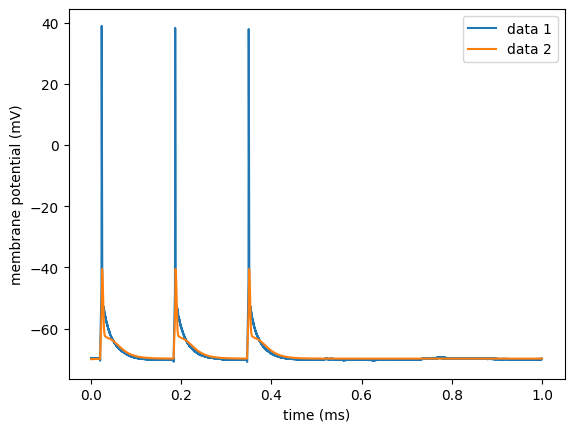

In [ ]:
# original vs hh, sweep 0
create_comparison_together(sliced_output_res[0], hh_0[0]*1000)

In [11]:
lif_0 = run_lif(sliced_input_amps, sliced_output_res, dt_in_ms)

first fit:
Round 0: Best parameters R=238.1003479 Mohm, tau=22.64609327 ms (error: 13.74019181 mV^2)
Round 1: Best parameters R=171.33305183 Mohm, tau=20.38421373 ms (error: 13.66174388 mV^2)
Round 2: Best parameters R=171.33305183 Mohm, tau=20.38421373 ms (error: 13.66174388 mV^2)
Round 3: Best parameters R=171.33305183 Mohm, tau=20.38421373 ms (error: 13.66174388 mV^2)
Round 4: Best parameters R=171.33305183 Mohm, tau=20.38421373 ms (error: 13.66174388 mV^2)
Round 5: Best parameters R=171.33305183 Mohm, tau=20.38421373 ms (error: 13.66174388 mV^2)
Round 6: Best parameters R=174.0176091 Mohm, tau=20.64448097 ms (error: 13.61718433 mV^2)
Round 7: Best parameters R=174.0176091 Mohm, tau=20.64448097 ms (error: 13.61718433 mV^2)
Round 8: Best parameters R=174.0176091 Mohm, tau=20.64448097 ms (error: 13.61718433 mV^2)
Round 9: Best parameters R=174.0176091 Mohm, tau=20.64448097 ms (error: 13.61718433 mV^2)


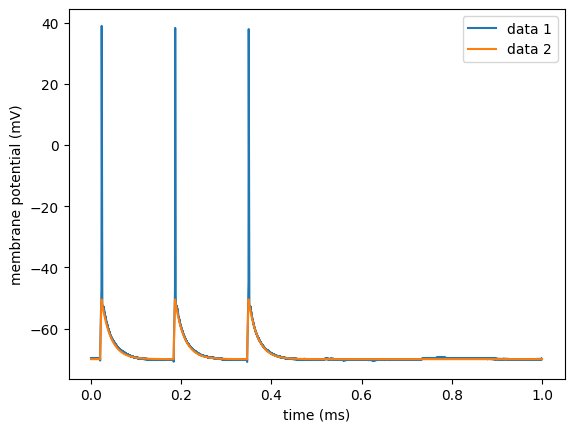

In [ ]:
# original vs lif, sweep 0
create_comparison_together(sliced_output_res[0], lif_0[0]*1000)

In [12]:
adex_0 = run_adex()

first fit:
Round 0: Best parameters a=2.33082631 nS, b=73.73049464 pA, tauw=138.38911733 ms (error: 17.07897278 mV^2)
Round 1: Best parameters a=1.70680087 nS, b=37.1480005 pA, tauw=127.73014498 ms (error: 14.78173264 mV^2)
Round 2: Best parameters a=1.67395694 nS, b=22.41946859 pA, tauw=145.05268354 ms (error: 14.38352624 mV^2)
Round 3: Best parameters a=1.45077492 nS, b=16.09001269 pA, tauw=135.16160394 ms (error: 14.19592949 mV^2)
Round 4: Best parameters a=1.20250013 nS, b=11.76620863 pA, tauw=124.94512312 ms (error: 14.09628221 mV^2)
Round 5: Best parameters a=1.13545153 nS, b=9.28228624 pA, tauw=124.72652533 ms (error: 14.07369771 mV^2)
Round 6: Best parameters a=1.12640811 nS, b=7.74854046 pA, tauw=122.49543128 ms (error: 14.06390469 mV^2)
Round 7: Best parameters a=1.08011825 nS, b=6.19870487 pA, tauw=122.22024632 ms (error: 14.05888016 mV^2)
Round 8: Best parameters a=1.0589205 nS, b=6.22246341 pA, tauw=121.23693765 ms (error: 14.05647262 mV^2)
Round 9: Best parameters a=1.045

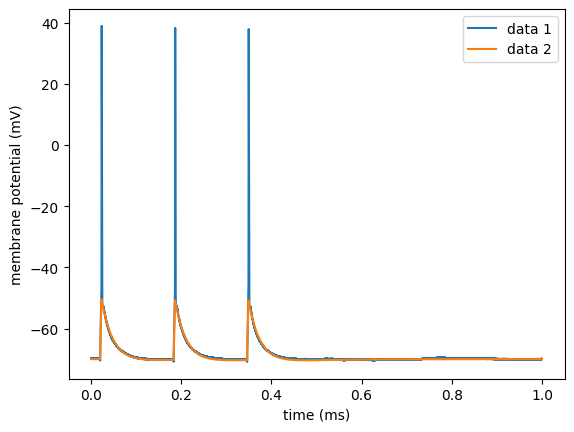

In [ ]:
# original vs adex, sweep 0
create_comparison_together(sliced_output_res[0], adex_0[0]*1000)

### Sweep 0

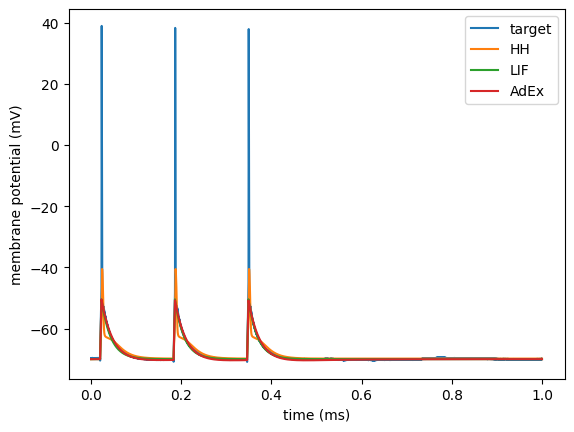

In [ ]:
# original vs hh vs lif vs adex
create_comparison_together_four(sliced_output_res[0], hh_0[0]*1000, lif_0[0]*1000, 
                                adex_0[0]*1000, d2_title='HH', d3_title='LIF', d4_title='AdEx')

(-72.0, -40.0)

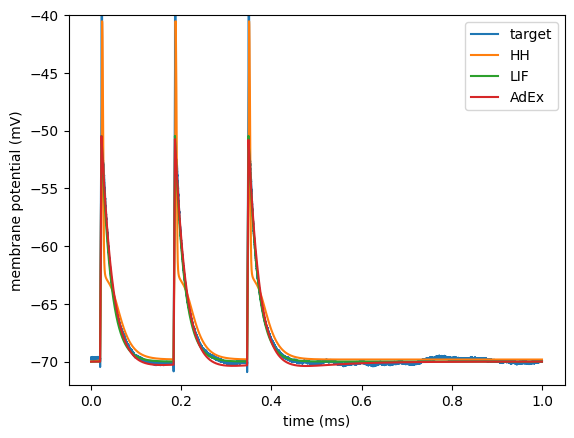

In [22]:
create_comparison_together_four(sliced_output_res[0], hh_0[0]*1000, lif_0[0]*1000, 
                                adex_0[0]*1000, d2_title='HH', d3_title='LIF', d4_title='AdEx')
ylim(-72, -40)

### Sweep 3

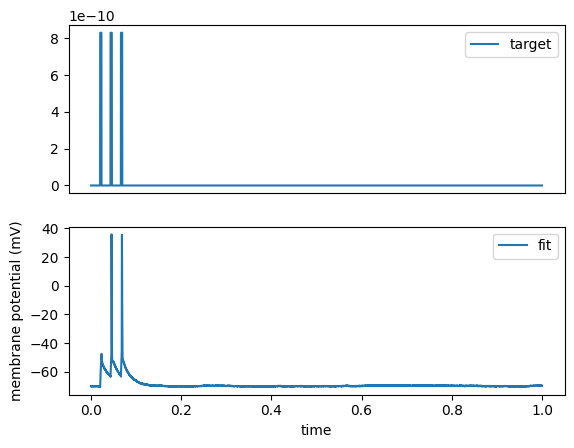

In [ ]:
# original input and output
# doesn't spike for first input
# happens too quickly...?
plot_vertical_tar_fit(sliced_input_amps[3], sliced_output_res[3])

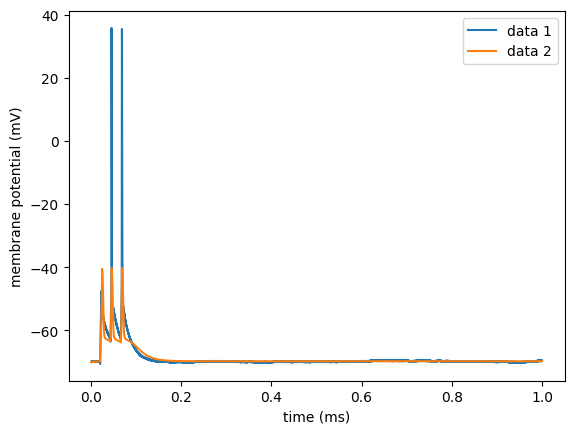

In [ ]:
# ori v hh
create_comparison_together(sliced_output_res[3], hh_0[3]*1000)

(0.0, 0.2)

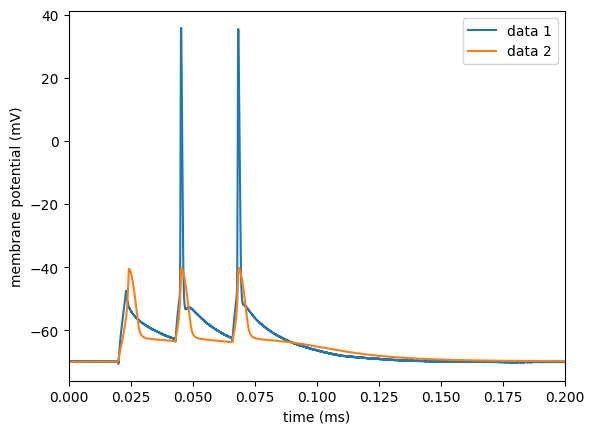

In [31]:
create_comparison_together(sliced_output_res[3], hh_0[3]*1000)
xlim(0, 0.2)

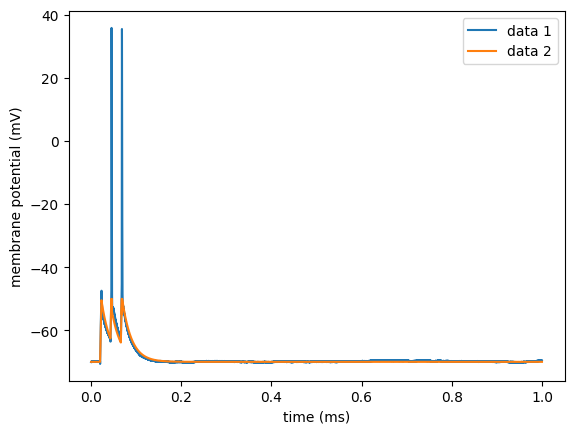

In [ ]:
# ori v lif
create_comparison_together(sliced_output_res[3], lif_0[3]*1000)

(0.0, 0.2)

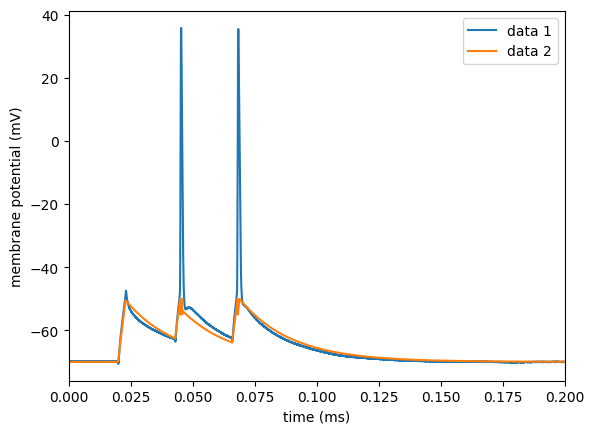

In [ ]:
create_comparison_together(sliced_output_res[3], lif_0[3]*1000)
xlim(0, 0.2)

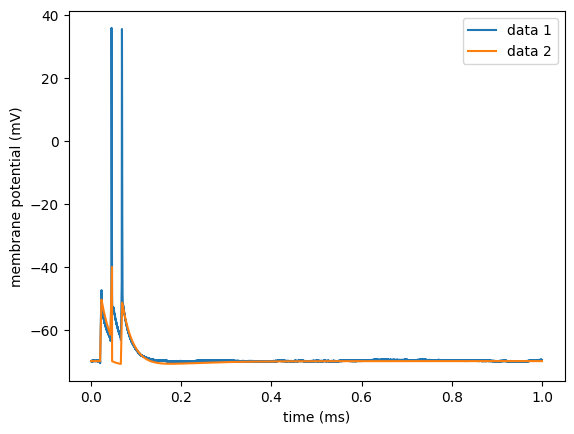

In [ ]:
# ori v adex
create_comparison_together(sliced_output_res[3], adex_0[3]*1000)

(0.0, 0.2)

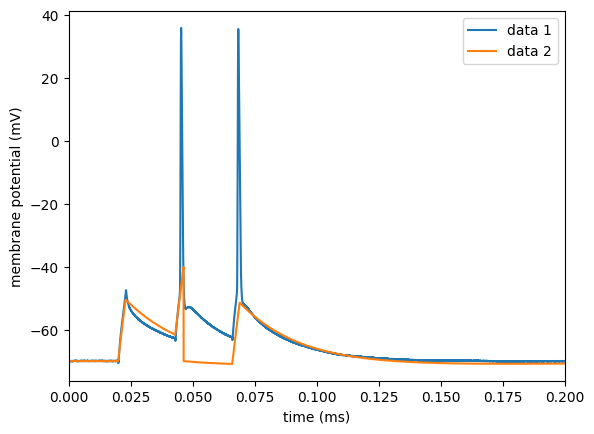

In [ ]:
create_comparison_together(sliced_output_res[3], adex_0[3]*1000)
xlim(0, 0.2)

# spike times ok, but trace interesting

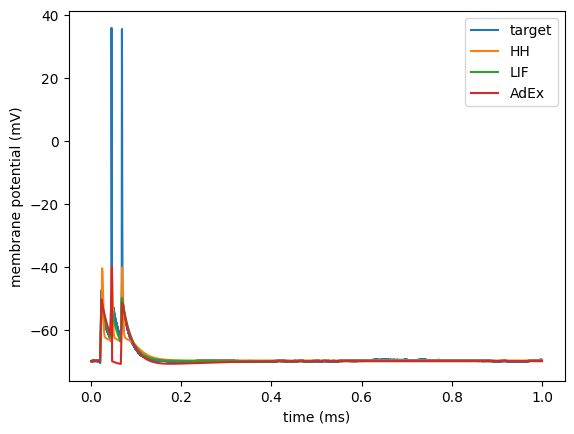

In [ ]:
# ori v hh v lif v adex
create_comparison_together_four(sliced_output_res[3], hh_0[3]*1000, lif_0[3]*1000, 
                                adex_0[3]*1000, d2_title='HH', d3_title='LIF', d4_title='AdEx')

(-72.0, -38.0)

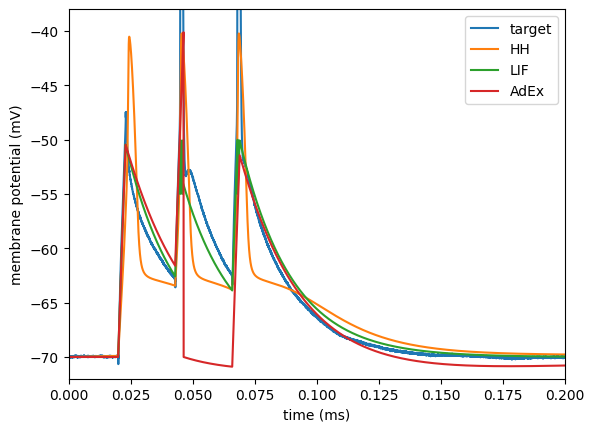

In [37]:
create_comparison_together_four(sliced_output_res[3], hh_0[3]*1000, lif_0[3]*1000, 
                                adex_0[3]*1000, d2_title='HH', d3_title='LIF', d4_title='AdEx')
xlim(0, 0.2)
ylim(-72, -38)

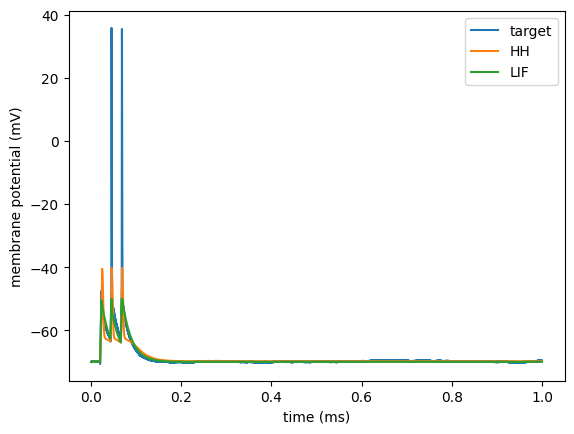

In [ ]:
# ori v hh v lif
create_comparison_together_three(sliced_output_res[3], hh_0[3]*1000, lif_0[3]*1000, 
                                d2_title='HH', d3_title='LIF')

(-72.0, -38.0)

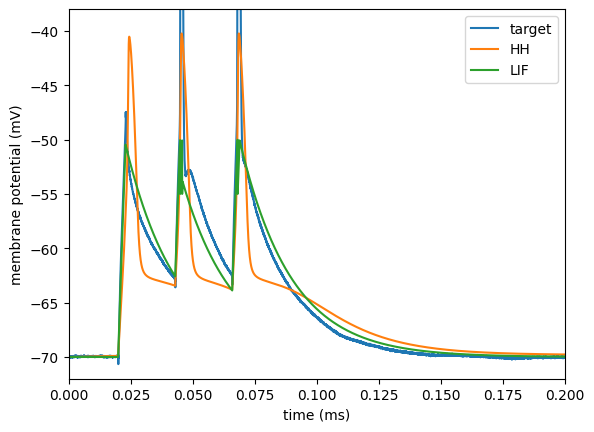

In [ ]:
create_comparison_together_three(sliced_output_res[3], hh_0[3]*1000, lif_0[3]*1000, 
                                d2_title='HH', d3_title='LIF')
xlim(0, 0.2)
ylim(-72, -38)

# LIF closer than HH?

(-72.0, -38.0)

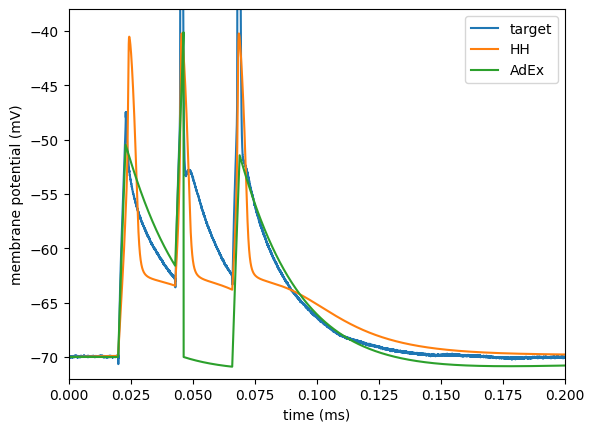

In [ ]:
# ori v hh v adexcreate_comparison_together_three(sliced_output_res[3], hh_0[3]*1000, adex_0[3]*1000, 
                                d2_title='HH', d3_title='AdEx')
xlim(0, 0.2)
ylim(-72, -38)

create_comparison_together_three(sliced_output_res[3], hh_0[3]*1000, adex_0[3]*1000, 
                                d2_title='HH', d3_title='AdEx')
xlim(0, 0.2)
ylim(-72, -38)

# HH closer than AdEx?

(-72.0, -38.0)

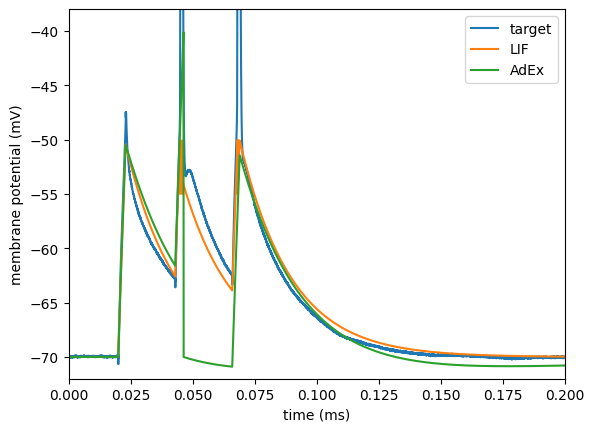

In [ ]:
# ori v lif v adex
create_comparison_together_three(sliced_output_res[3], lif_0[3]*1000, adex_0[3]*1000, 
                                d2_title='LIF', d3_title='AdEx')
xlim(0, 0.2)
ylim(-72, -38)

# LIF closer than AdEx

### Sweep 5

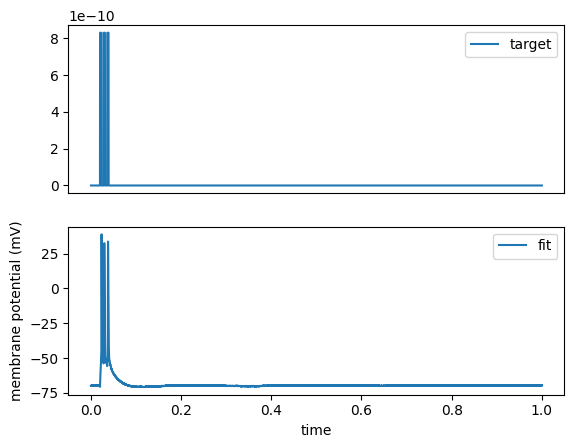

In [42]:
# original input and output
plot_vertical_tar_fit(sliced_input_amps[5], sliced_output_res[5])

In [47]:
# original input and output
plot_vertical_tar_fit(sliced_input_amps[5], sliced_output_res[5], xlimmax=0.1)

TypeError: plot_vertical_tar_fit() got an unexpected keyword argument 'xlimmax'

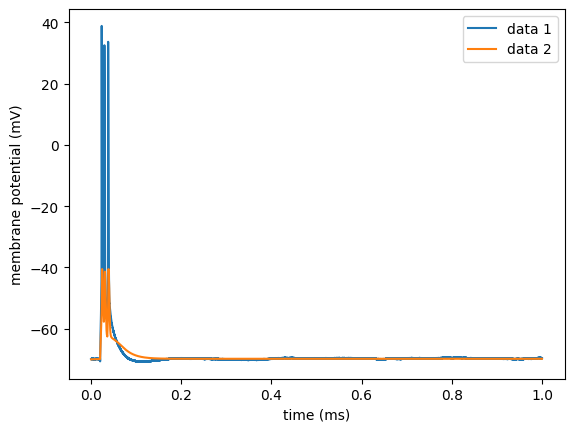

In [ ]:
# ori v hh
create_comparison_together(sliced_output_res[5], hh_0[5]*1000)

(0.0, 0.1)

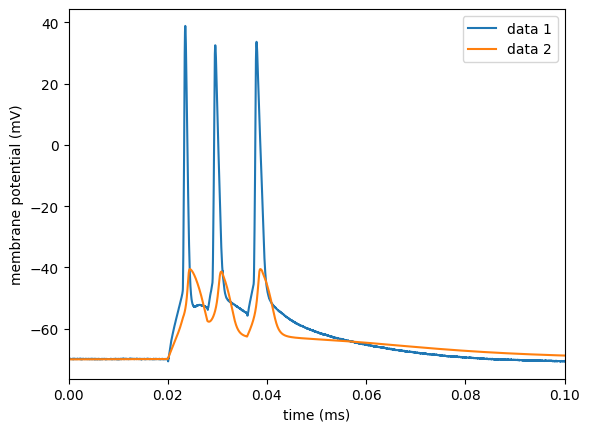

In [50]:
# ori v hh
create_comparison_together(sliced_output_res[5], hh_0[5]*1000)
xlim(0, 0.1)

(0.0, 0.1)

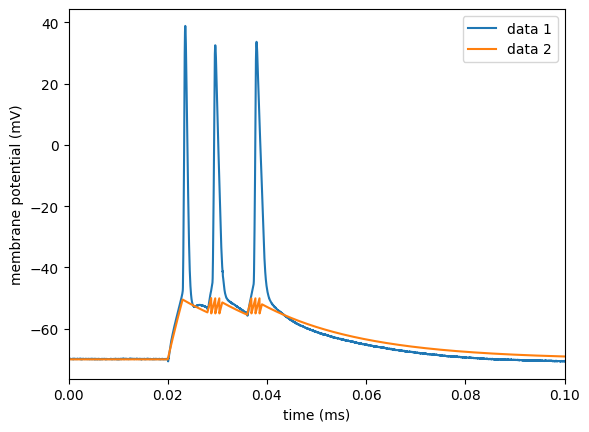

In [51]:
# ori v lif
create_comparison_together(sliced_output_res[5], lif_0[5]*1000)
xlim(0, 0.1)

(0.0, 0.1)

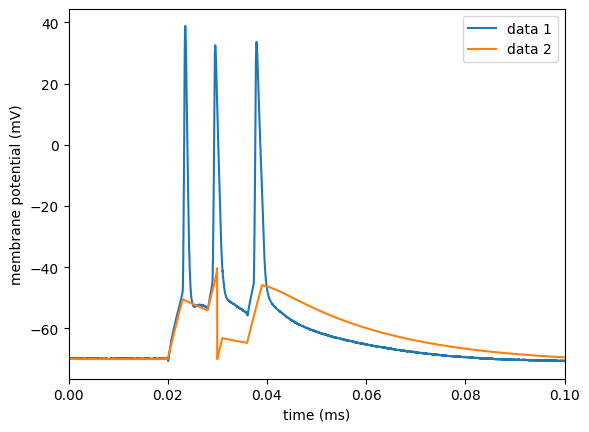

In [52]:
# ori v adex
create_comparison_together(sliced_output_res[5], adex_0[5]*1000)
xlim(0, 0.1)

(-72.0, -38.0)

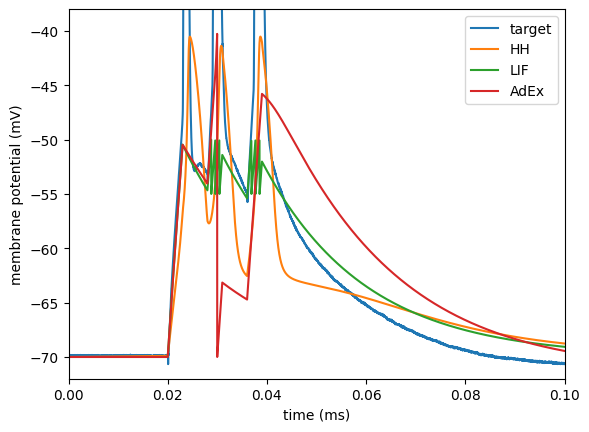

In [ ]:
create_comparison_together_four(sliced_output_res[5], hh_0[5]*1000, lif_0[5]*1000, 
                                adex_0[5]*1000, d2_title='HH', d3_title='LIF', d4_title='AdEx')
xlim(0, 0.1)
ylim(-72, -38)

# HH closest?

(-72.0, -38.0)

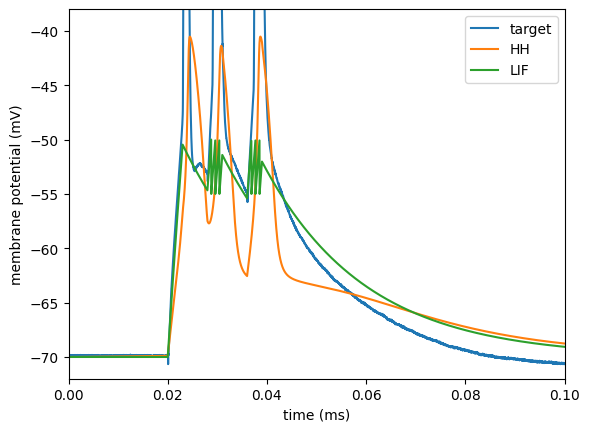

In [ ]:
# ori v hh v lif
create_comparison_together_three(sliced_output_res[5], hh_0[5]*1000, lif_0[5]*1000, 
                                d2_title='HH', d3_title='LIF')
xlim(0, 0.1)
ylim(-72, -38)

# arguably lif closer to trace but the multi-spikes...

(-72.0, -38.0)

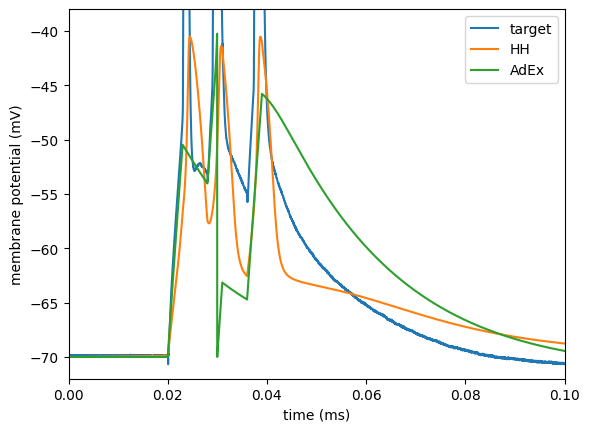

In [ ]:
# ori v hh v adex
create_comparison_together_three(sliced_output_res[5], hh_0[5]*1000, adex_0[5]*1000, 
                                d2_title='HH', d3_title='AdEx')
xlim(0, 0.1)
ylim(-72, -38)

# HH closer, but still not close

(-72.0, -38.0)

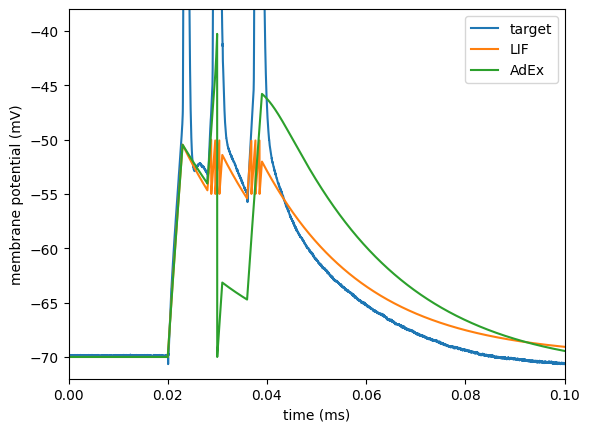

In [ ]:
# ori v lif v adex
create_comparison_together_three(sliced_output_res[5], lif_0[5]*1000, adex_0[5]*1000, 
                                d2_title='LIF', d3_title='AdEx')
xlim(0, 0.1)
ylim(-72, -38)

# LIF closest to trace...

### Sweep 6

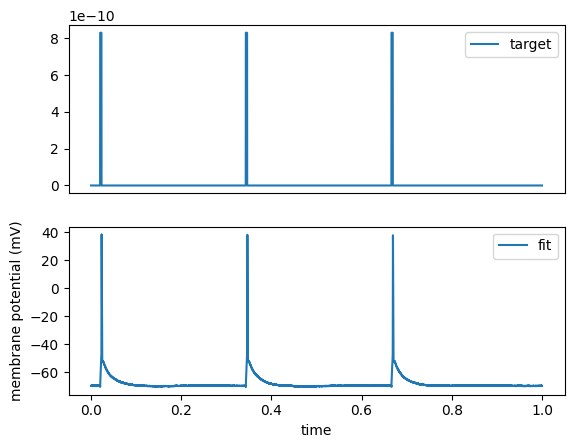

In [57]:
plot_vertical_tar_fit(sliced_input_amps[6], sliced_output_res[6])

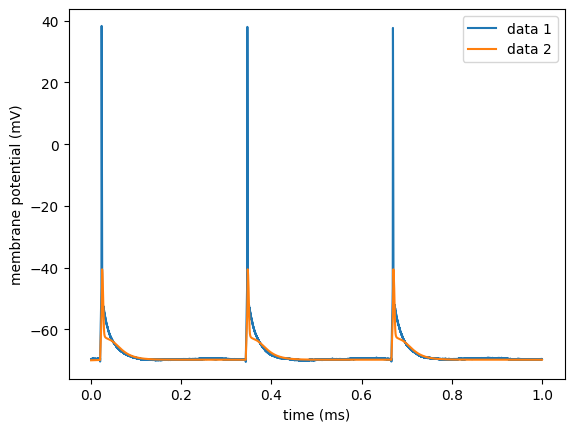

In [ ]:
# ori v hh
create_comparison_together(sliced_output_res[6], hh_0[6]*1000)


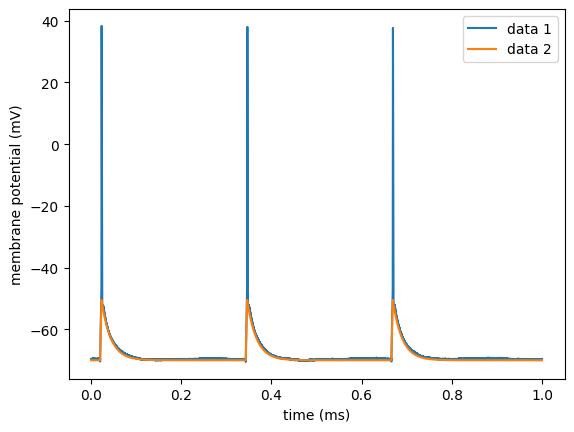

In [59]:
# ori v lif
create_comparison_together(sliced_output_res[6], lif_0[6]*1000)

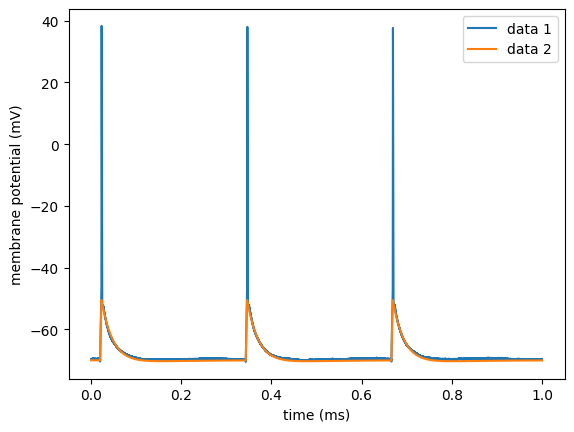

In [63]:
# ori v adex
create_comparison_together(sliced_output_res[6], adex_0[6]*1000)

(-72.0, -38.0)

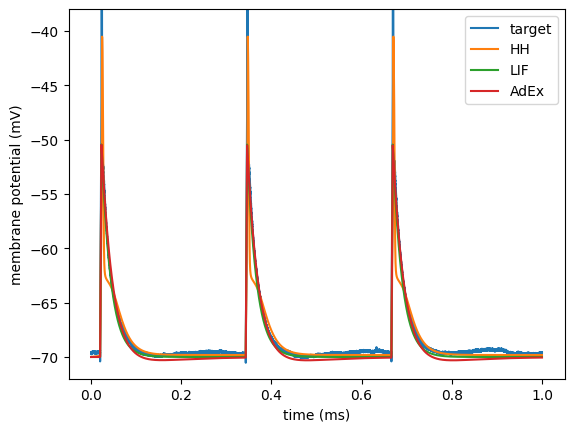

In [ ]:
# ori v hh v lif v adex
create_comparison_together_four(sliced_output_res[6], hh_0[6]*1000, lif_0[6]*1000, 
                                adex_0[6]*1000, d2_title='HH', d3_title='LIF', d4_title='AdEx')
ylim(-72, -38)

# all pretty close, but HH less close

### Sweep 9

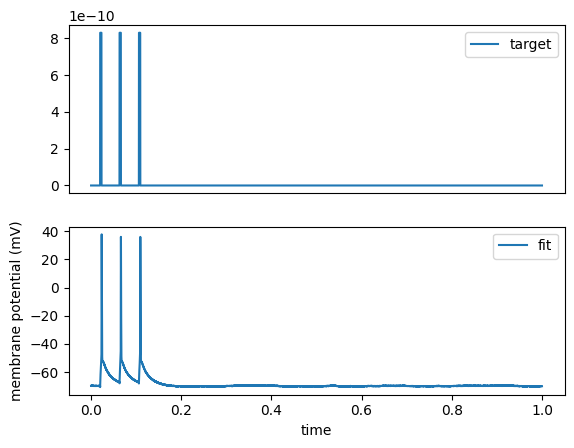

In [65]:
plot_vertical_tar_fit(sliced_input_amps[9], sliced_output_res[9])

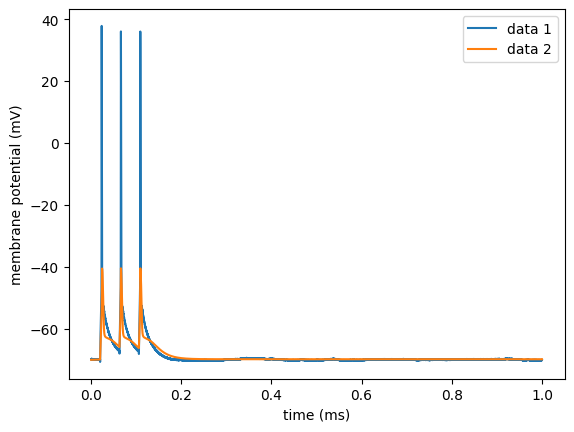

In [66]:
# ori v hh
create_comparison_together(sliced_output_res[9], hh_0[9]*1000)

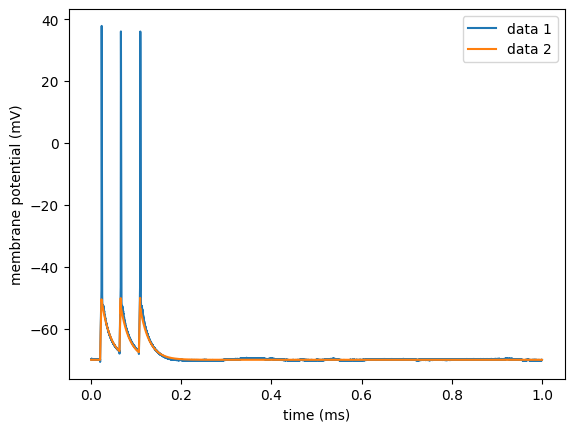

In [67]:
# ori v lif
create_comparison_together(sliced_output_res[9], lif_0[9]*1000)

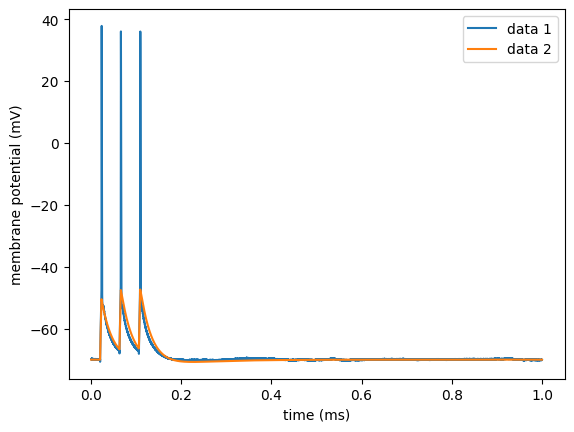

In [68]:
# ori v adex
create_comparison_together(sliced_output_res[9], adex_0[9]*1000)

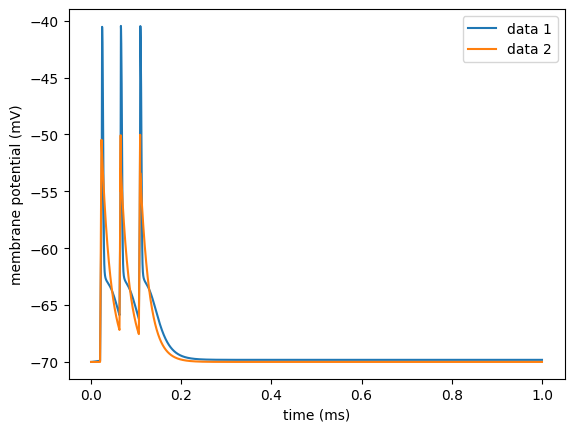

In [69]:
# hh v lif
create_comparison_together(hh_0[9]*1000, lif_0[9]*1000)

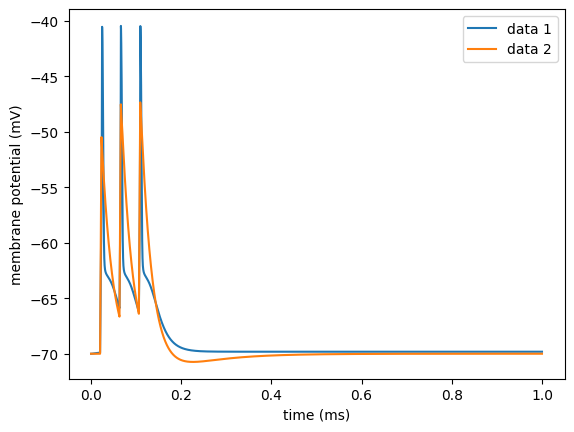

In [70]:
# hh v adex
create_comparison_together(hh_0[9]*1000, adex_0[9]*1000)

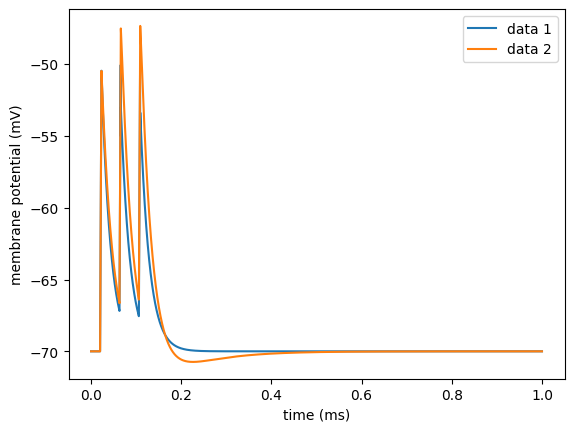

In [71]:
# lif v adex
create_comparison_together(lif_0[9]*1000, adex_0[9]*1000)

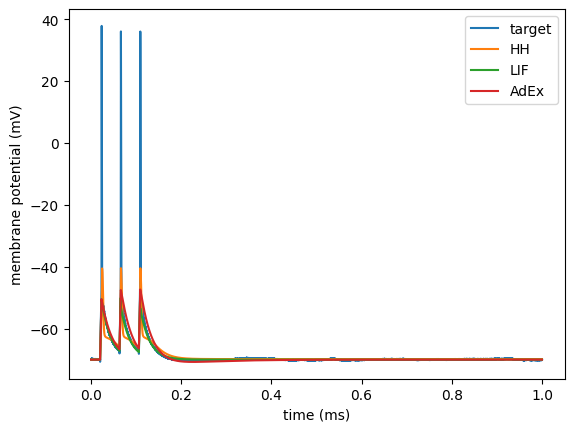

In [72]:
create_comparison_together_four(sliced_output_res[9], hh_0[9]*1000, lif_0[9]*1000, 
                                adex_0[9]*1000, d2_title='HH', d3_title='LIF', d4_title='AdEx')

(-72.0, -42.0)

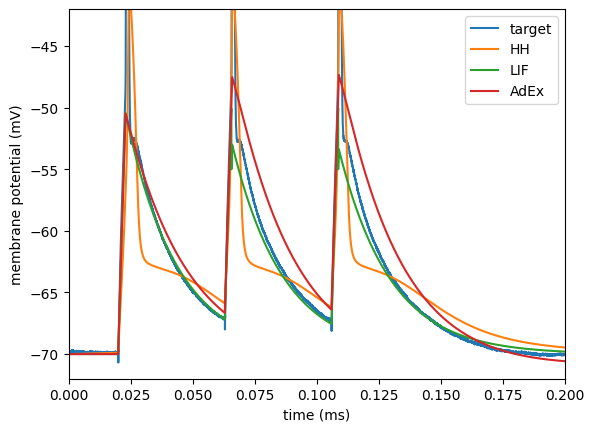

In [ ]:
create_comparison_together_four(sliced_output_res[9], hh_0[9]*1000, lif_0[9]*1000, 
                                adex_0[9]*1000, d2_title='HH', d3_title='LIF', d4_title='AdEx')
xlim(0, 0.2)
ylim(-72, -42)

# LIF closest?

Closer the spikes, the less accurate and more variance between models.

Also, modelling between 10 sweeps... LIF possibly best?  As no adaptation or anything too complex going on... also less computation and less time, less params...

***

Reduce to 4 sweeps (2-5), fastest spikes...

In [ ]:
hh_1 = run_hh(fast_spikes_input, fast_spikes_output)

# time take: 1m 24.2s

WARNING    Cannot use Cython, a test compilation failed: Cython is not available (ImportError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


first fit:
Round 0: Best parameters g_kd=2.45169216 uS, g_na=12.17550149 uS, gl=15.65633012 nS (error: 37.00898602 mV^2)
Round 1: Best parameters g_kd=2.61097609 uS, g_na=14.36708503 uS, gl=15.69026196 nS (error: 34.53202788 mV^2)
Round 2: Best parameters g_kd=2.61097609 uS, g_na=14.36708503 uS, gl=15.69026196 nS (error: 34.53202788 mV^2)
Round 3: Best parameters g_kd=3.22406087 uS, g_na=17.27547024 uS, gl=12.74834776 nS (error: 32.93074182 mV^2)
Round 4: Best parameters g_kd=3.17701967 uS, g_na=17.6456621 uS, gl=13.20134634 nS (error: 31.65444824 mV^2)
Round 5: Best parameters g_kd=3.17701967 uS, g_na=17.6456621 uS, gl=13.20134634 nS (error: 31.65444824 mV^2)
Round 6: Best parameters g_kd=3.31367504 uS, g_na=18.34921723 uS, gl=12.52318813 nS (error: 31.65136812 mV^2)
Round 7: Best parameters g_kd=3.31367504 uS, g_na=18.34921723 uS, gl=12.52318813 nS (error: 31.65136812 mV^2)
Round 8: Best parameters g_kd=3.31367504 uS, g_na=18.34921723 uS, gl=12.52318813 nS (error: 31.65136812 mV^2)
R

In [ ]:
lif_1 = run_lif(fast_spikes_input, fast_spikes_output)

# time taken: 20.2s

first fit:
Round 0: Best parameters R=203.3153692 Mohm, tau=18.95050952 ms (error: 35.31848163 mV^2)
Round 1: Best parameters R=208.35525565 Mohm, tau=19.34656909 ms (error: 35.17882893 mV^2)
Round 2: Best parameters R=208.35525565 Mohm, tau=19.34656909 ms (error: 35.17882893 mV^2)
Round 3: Best parameters R=208.35525565 Mohm, tau=19.34656909 ms (error: 35.17882893 mV^2)
Round 4: Best parameters R=218.77542421 Mohm, tau=17.94045805 ms (error: 35.17137986 mV^2)
Round 5: Best parameters R=218.77542421 Mohm, tau=17.94045805 ms (error: 35.17137986 mV^2)
Round 6: Best parameters R=218.77542421 Mohm, tau=17.94045805 ms (error: 35.17137986 mV^2)
Round 7: Best parameters R=218.77542421 Mohm, tau=17.94045805 ms (error: 35.17137986 mV^2)
Round 8: Best parameters R=218.77542421 Mohm, tau=17.94045805 ms (error: 35.17137986 mV^2)
Round 9: Best parameters R=218.77542421 Mohm, tau=17.94045805 ms (error: 35.17137986 mV^2)


In [ ]:
adex_1 = run_adex(fast_spikes_input, fast_spikes_output)

# time taken: 22.9s

first fit:
Round 0: Best parameters a=1.68412281 nS, b=74.97279652 pA, tauw=131.52571274 ms (error: 56.23614622 mV^2)
Round 1: Best parameters a=1.42862087 nS, b=31.38903558 pA, tauw=137.55547213 ms (error: 41.51963623 mV^2)
Round 2: Best parameters a=1.3143051 nS, b=17.8683111 pA, tauw=151.41947274 ms (error: 39.4275808 mV^2)
Round 3: Best parameters a=1.33490111 nS, b=11.38888697 pA, tauw=129.24083315 ms (error: 38.70268637 mV^2)
Round 4: Best parameters a=1.29374067 nS, b=7.22683988 pA, tauw=136.33209642 ms (error: 38.56710779 mV^2)
Round 5: Best parameters a=1.84444563 nS, b=4.42755549 pA, tauw=126.96694264 ms (error: 38.46147898 mV^2)
Round 6: Best parameters a=1.55382381 nS, b=4.24107358 pA, tauw=126.55470295 ms (error: 38.44559712 mV^2)
Round 7: Best parameters a=1.70633519 nS, b=4.01193784 pA, tauw=124.07319473 ms (error: 38.43829224 mV^2)
Round 8: Best parameters a=1.73128029 nS, b=3.63719241 pA, tauw=122.66538388 ms (error: 38.43502506 mV^2)
Round 9: Best parameters a=1.62164

Text(0.5, 1.0, 'Short Square Triple: sweep 2')

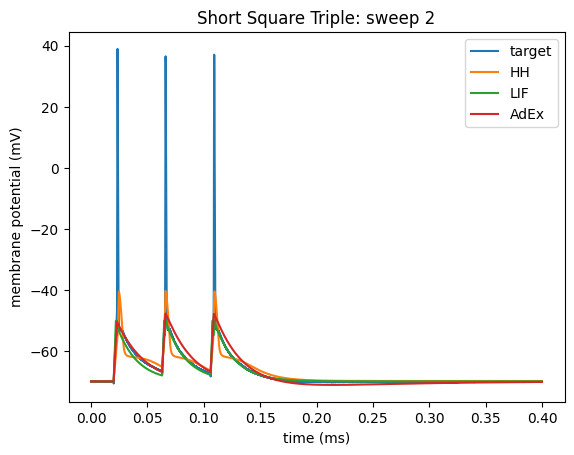

In [14]:
create_comparison_together_four(fast_spikes_output[0], hh_1[0]*1000, lif_1[0]*1000, adex_1[0]*1000,
                                d2_title='HH', d3_title='LIF', d4_title='AdEx')
title('Short Square Triple: sweep 2')

Text(0.5, 1.0, 'Short Square Triple: sweep 3')

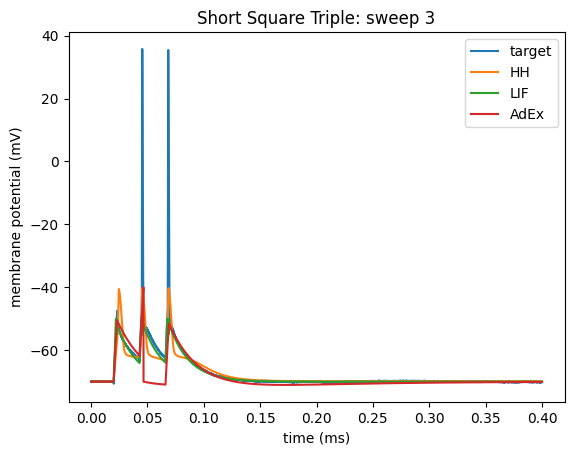

In [15]:
create_comparison_together_four(fast_spikes_output[1], hh_1[1]*1000, lif_1[1]*1000, adex_1[1]*1000,
                                d2_title='HH', d3_title='LIF', d4_title='AdEx')
title('Short Square Triple: sweep 3')

Text(0.5, 1.0, 'Short Square Triple: sweep 4')

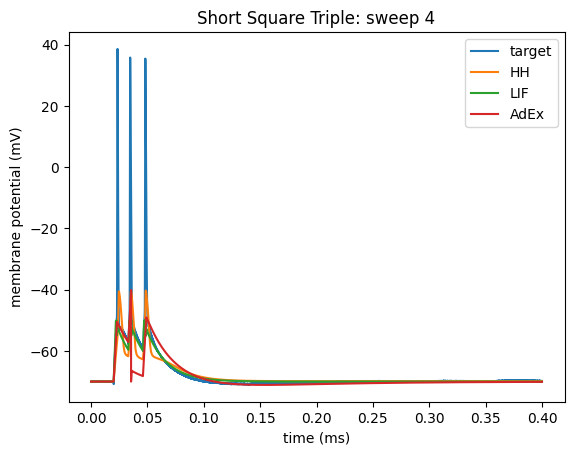

In [16]:
create_comparison_together_four(fast_spikes_output[2], hh_1[2]*1000, lif_1[2]*1000, adex_1[2]*1000,
                                d2_title='HH', d3_title='LIF', d4_title='AdEx')
title('Short Square Triple: sweep 4')

Text(0.5, 1.0, 'Short Square Triple: sweep 5')

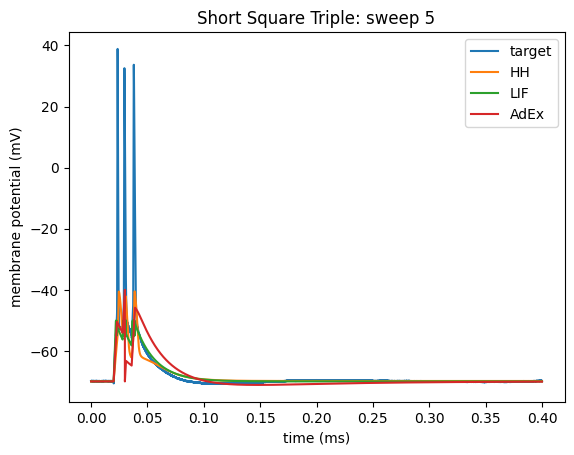

In [17]:
create_comparison_together_four(fast_spikes_output[3], hh_1[3]*1000, lif_1[3]*1000, adex_1[3]*1000,
                                d2_title='HH', d3_title='LIF', d4_title='AdEx')
title('Short Square Triple: sweep 5')

Slice again...

***

In [ ]:
hh_2 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced)

# tt: 33.2s

first fit:
Round 0: Best parameters g_kd=2.42341568 uS, g_na=14.31039481 uS, gl=19.36612612 nS (error: 98.03182551 mV^2)
Round 1: Best parameters g_kd=2.41412356 uS, g_na=13.32064935 uS, gl=16.40782575 nS (error: 92.64974152 mV^2)
Round 2: Best parameters g_kd=2.41412356 uS, g_na=13.32064935 uS, gl=16.40782575 nS (error: 92.64974152 mV^2)
Round 3: Best parameters g_kd=2.56849971 uS, g_na=13.40898691 uS, gl=14.14993988 nS (error: 89.85694322 mV^2)
Round 4: Best parameters g_kd=3.27873753 uS, g_na=17.38501819 uS, gl=12.11026229 nS (error: 86.29071352 mV^2)
Round 5: Best parameters g_kd=3.21350663 uS, g_na=18.37332294 uS, gl=13.75178857 nS (error: 83.92983286 mV^2)
Round 6: Best parameters g_kd=3.21350663 uS, g_na=18.37332294 uS, gl=13.75178857 nS (error: 83.92983286 mV^2)
Round 7: Best parameters g_kd=3.21350663 uS, g_na=18.37332294 uS, gl=13.75178857 nS (error: 83.92983286 mV^2)
Round 8: Best parameters g_kd=3.21350663 uS, g_na=18.37332294 uS, gl=13.75178857 nS (error: 83.92983286 mV^2)

In [ ]:
lif_2 = run_lif(fastspikes_input_sliced, fastspikes_output_sliced)

# tt: 8.8s

first fit:
Round 0: Best parameters R=171.92281727 Mohm, tau=16.93142395 ms (error: 93.85811165 mV^2)
Round 1: Best parameters R=171.92281727 Mohm, tau=16.93142395 ms (error: 93.85811165 mV^2)
Round 2: Best parameters R=171.92281727 Mohm, tau=16.93142395 ms (error: 93.85811165 mV^2)
Round 3: Best parameters R=171.92281727 Mohm, tau=16.93142395 ms (error: 93.85811165 mV^2)
Round 4: Best parameters R=194.84335208 Mohm, tau=22.77485965 ms (error: 93.79767134 mV^2)
Round 5: Best parameters R=194.84335208 Mohm, tau=22.77485965 ms (error: 93.79767134 mV^2)
Round 6: Best parameters R=194.84335208 Mohm, tau=22.77485965 ms (error: 93.79767134 mV^2)
Round 7: Best parameters R=194.84335208 Mohm, tau=22.77485965 ms (error: 93.79767134 mV^2)
Round 8: Best parameters R=194.84335208 Mohm, tau=22.77485965 ms (error: 93.79767134 mV^2)
Round 9: Best parameters R=180.56558455 Mohm, tau=20.97402684 ms (error: 93.74637124 mV^2)


In [ ]:
adex_2 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced)

# tt: 10.1s

first fit:
Round 0: Best parameters a=3.48005577 nS, b=77.69696866 pA, tauw=151.96284219 ms (error: 145.27895789 mV^2)
Round 1: Best parameters a=1.96730765 nS, b=45.8072179 pA, tauw=152.73320253 ms (error: 115.57724963 mV^2)
Round 2: Best parameters a=1.96553476 nS, b=30.61880755 pA, tauw=156.22647358 ms (error: 107.4933403 mV^2)
Round 3: Best parameters a=1.6112335 nS, b=24.98929011 pA, tauw=136.32529437 ms (error: 105.00861631 mV^2)
Round 4: Best parameters a=1.60985742 nS, b=16.68925866 pA, tauw=145.51053318 ms (error: 103.01452486 mV^2)
Round 5: Best parameters a=1.68679309 nS, b=13.01247308 pA, tauw=134.9974535 ms (error: 102.34727359 mV^2)
Round 6: Best parameters a=1.74952952 nS, b=8.69696572 pA, tauw=153.52974385 ms (error: 102.12182348 mV^2)
Round 7: Best parameters a=2.03741718 nS, b=6.92890901 pA, tauw=128.13492229 ms (error: 101.83881648 mV^2)
Round 8: Best parameters a=2.39637097 nS, b=5.54746172 pA, tauw=149.12642757 ms (error: 101.81459076 mV^2)
Round 9: Best parameters

Text(0.5, 1.0, 'Short Square Triple: sweep 2')

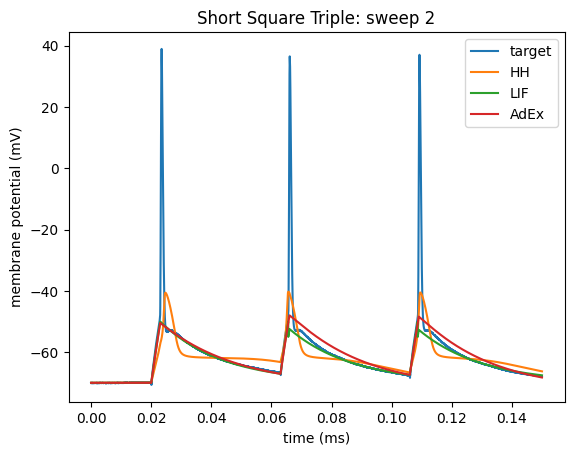

In [24]:
create_comparison_together_four(fastspikes_output_sliced[0], hh_2[0]*1000, lif_2[0]*1000, adex_2[0]*1000,
                                d2_title='HH', d3_title='LIF', d4_title='AdEx')
title('Short Square Triple: sweep 2')

HH: slighlty off for spike times?  hyperpolarises?

LIF: accurate on timing?

AdEx: accurate on timing?

Text(0.5, 1.0, 'Short Square Triple: sweep 3')

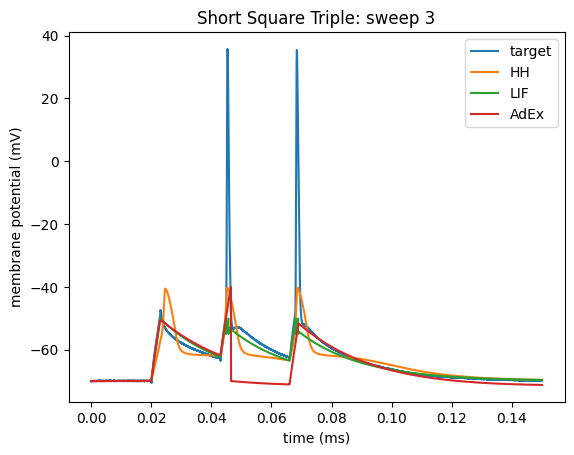

In [25]:
create_comparison_together_four(fastspikes_output_sliced[1], hh_2[1]*1000, lif_2[1]*1000, adex_2[1]*1000,
                                d2_title='HH', d3_title='LIF', d4_title='AdEx')
title('Short Square Triple: sweep 3')

None particularly precise, HH closest...

Text(0.5, 1.0, 'Short Square Triple: sweep 4')

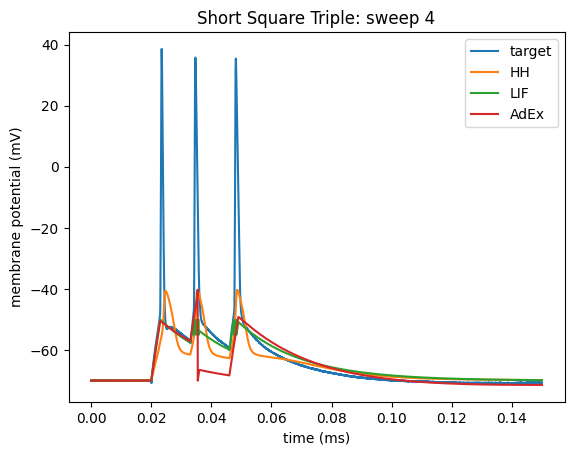

In [26]:
create_comparison_together_four(fastspikes_output_sliced[2], hh_2[2]*1000, lif_2[2]*1000, adex_2[2]*1000,
                                d2_title='HH', d3_title='LIF', d4_title='AdEx')
title('Short Square Triple: sweep 4')

All slightly off for diff reasons...

Text(0.5, 1.0, 'Short Square Triple: sweep 5')

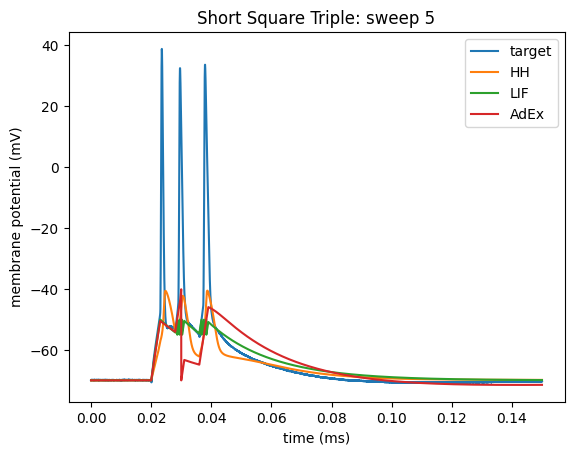

In [27]:
create_comparison_together_four(fastspikes_output_sliced[3], hh_2[3]*1000, lif_2[3]*1000, adex_2[3]*1000,
                                d2_title='HH', d3_title='LIF', d4_title='AdEx')
title('Short Square Triple: sweep 5')

HH: slightly off for timing.  Obvs doesn't reach spike height.  Hyperpolarises.

LIF: timing ok?  But oscillations...

AdEx: timing slightly off.  Hyperpolarises for spike2, then not enough after spike 3.  All three spikes diff height but opp to ori.

***

### Attempts to improve voltage trace

Cm...

In [ ]:
hh_3 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120)

# tt: 38.1s

first fit:
Round 0: Best parameters g_kd=1.18039093 uS, g_na=7.74609534 uS, gl=15.61055697 nS (error: 74.43424262 mV^2)
Round 1: Best parameters g_kd=0.9543682 uS, g_na=5.6516201 uS, gl=13.08780815 nS (error: 72.27215626 mV^2)
Round 2: Best parameters g_kd=1.21045285 uS, g_na=7.87093397 uS, gl=13.46591292 nS (error: 68.93304189 mV^2)
Round 3: Best parameters g_kd=1.21045285 uS, g_na=7.87093397 uS, gl=13.46591292 nS (error: 68.93304189 mV^2)
Round 4: Best parameters g_kd=1.21045285 uS, g_na=7.87093397 uS, gl=13.46591292 nS (error: 68.93304189 mV^2)
Round 5: Best parameters g_kd=1.21045285 uS, g_na=7.87093397 uS, gl=13.46591292 nS (error: 68.93304189 mV^2)
Round 6: Best parameters g_kd=1.21045285 uS, g_na=7.87093397 uS, gl=13.46591292 nS (error: 68.93304189 mV^2)
Round 7: Best parameters g_kd=1.21045285 uS, g_na=7.87093397 uS, gl=13.46591292 nS (error: 68.93304189 mV^2)
Round 8: Best parameters g_kd=1.21045285 uS, g_na=7.87093397 uS, gl=13.46591292 nS (error: 68.93304189 mV^2)
Round 9: B

Text(0.5, 1.0, 'SST: cm=120, sweep 2')

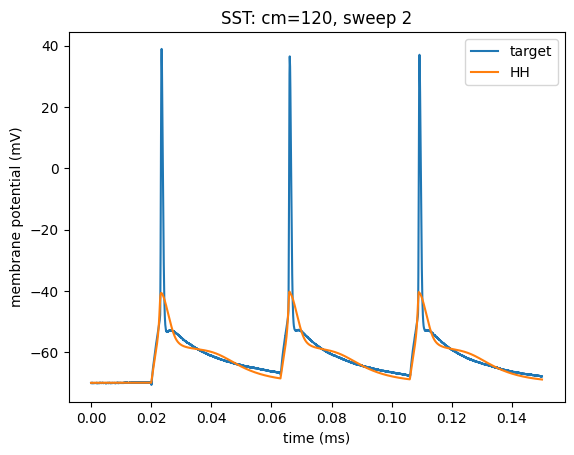

In [31]:
create_comparison_together(fastspikes_output_sliced[0], hh_3[0]*1000, d2_title='HH')
title('SST: cm=120, sweep 2')

Text(0.5, 1.0, 'SST: cm=120, sweep 3')

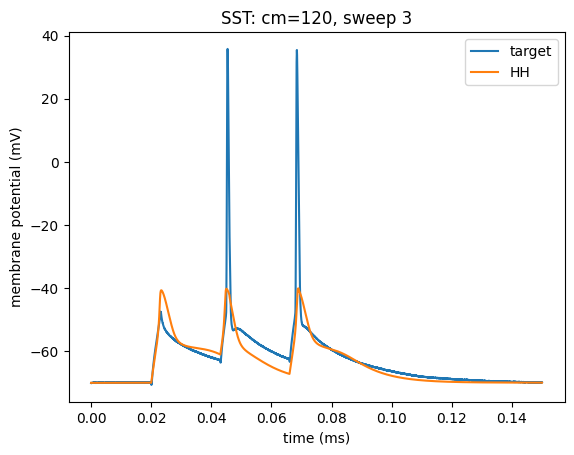

In [32]:
create_comparison_together(fastspikes_output_sliced[1], hh_3[1]*1000, d2_title='HH')
title('SST: cm=120, sweep 3')

Text(0.5, 1.0, 'SST: cm=120, sweep 4')

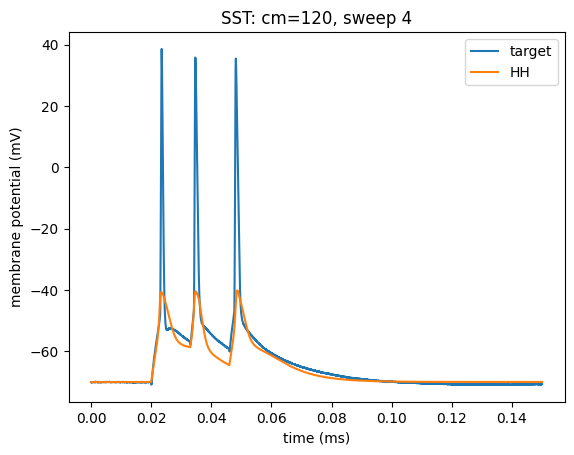

In [33]:
create_comparison_together(fastspikes_output_sliced[2], hh_3[2]*1000, d2_title='HH')
title('SST: cm=120, sweep 4')

Text(0.5, 1.0, 'SST: cm=120, sweep 5')

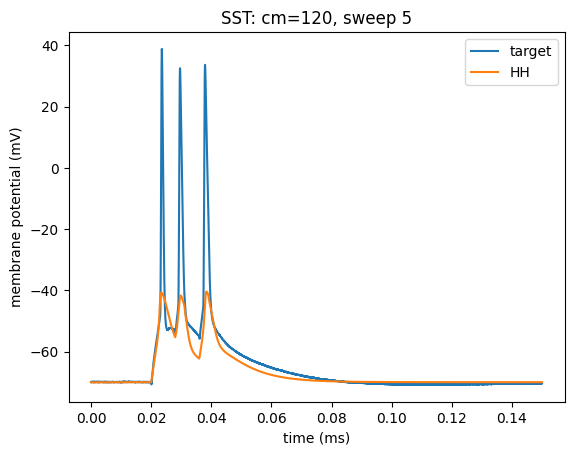

In [34]:
create_comparison_together(fastspikes_output_sliced[3], hh_3[3]*1000, d2_title='HH')
title('SST: cm=120, sweep 5')

Peaks at -40

Tends to hyperpolarise.  More so when ISI shorter.

Timings ok.

In [35]:
hh_4 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=60)

first fit:
Round 0: Best parameters g_kd=1.34052962 uS, g_na=11.80838979 uS, gl=15.36417838 nS (error: 87.10935966 mV^2)
Round 1: Best parameters g_kd=1.40131319 uS, g_na=11.80838979 uS, gl=12.43720367 nS (error: 86.79605189 mV^2)
Round 2: Best parameters g_kd=1.40131319 uS, g_na=11.80838979 uS, gl=12.43720367 nS (error: 86.79605189 mV^2)
Round 3: Best parameters g_kd=0.45754891 uS, g_na=3.48767827 uS, gl=12.12743014 nS (error: 84.10408379 mV^2)
Round 4: Best parameters g_kd=0.45754891 uS, g_na=3.48767827 uS, gl=12.12743014 nS (error: 84.10408379 mV^2)
Round 5: Best parameters g_kd=0.45754891 uS, g_na=3.48767827 uS, gl=12.12743014 nS (error: 84.10408379 mV^2)
Round 6: Best parameters g_kd=0.45754891 uS, g_na=3.48767827 uS, gl=12.12743014 nS (error: 84.10408379 mV^2)
Round 7: Best parameters g_kd=0.93620968 uS, g_na=8.13348763 uS, gl=13.23280457 nS (error: 84.01922797 mV^2)
Round 8: Best parameters g_kd=0.52662666 uS, g_na=4.94119857 uS, gl=15.40329316 nS (error: 83.10783574 mV^2)
Round

Text(0.5, 1.0, 'SST: cm=60, sweep 2')

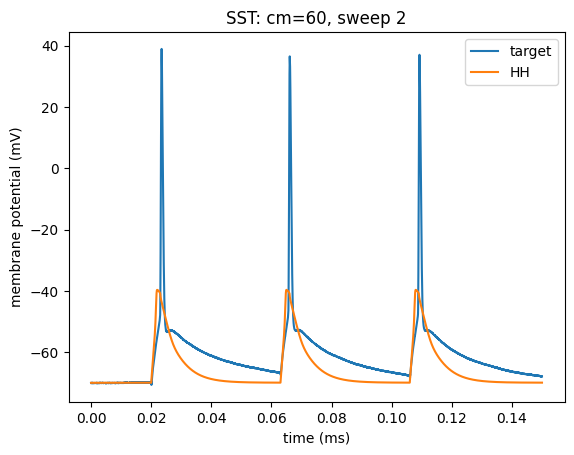

In [36]:
create_comparison_together(fastspikes_output_sliced[0], hh_4[0]*1000, d2_title='HH')
title('SST: cm=60, sweep 2')

Text(0.5, 1.0, 'Comparison for HH between cm=120 and cm=60: sweep 2')

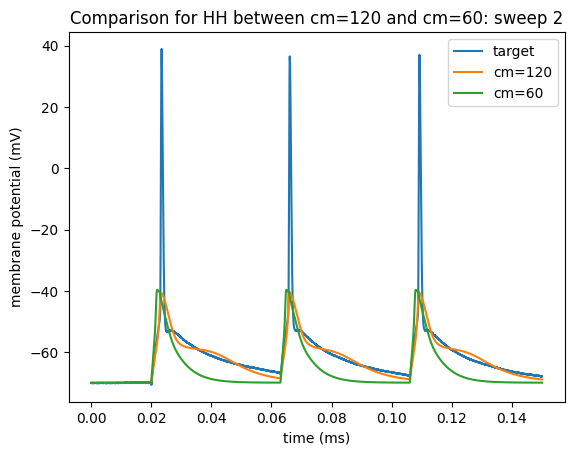

In [46]:
create_comparison_together_three(fastspikes_output_sliced[0], hh_3[0]*1000, hh_4[0]*1000, d2_title='cm=120', d3_title='cm=60')
title('Comparison for HH between cm=120 and cm=60: sweep 2')

Text(0.5, 1.0, 'SST: cm=60, sweep 3')

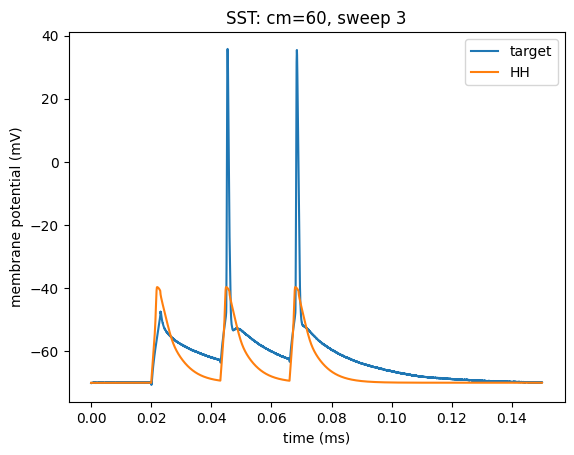

In [47]:
create_comparison_together(fastspikes_output_sliced[1], hh_4[1]*1000, d2_title='HH')
title('SST: cm=60, sweep 3')

Text(0.5, 1.0, 'Comparison for HH between cm=120 and cm=60: sweep 3')

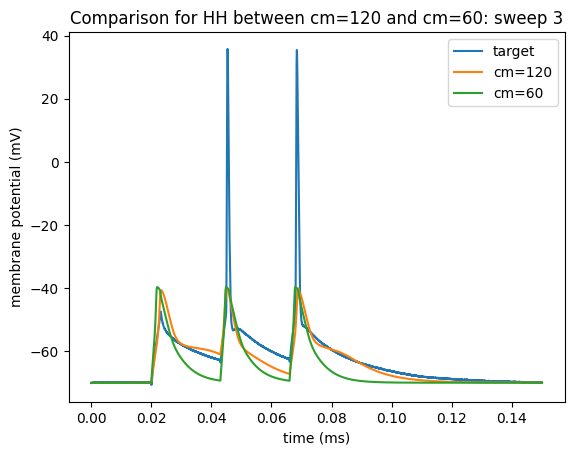

In [48]:
create_comparison_together_three(fastspikes_output_sliced[1], hh_3[1]*1000, hh_4[1]*1000, d2_title='cm=120', d3_title='cm=60')
title('Comparison for HH between cm=120 and cm=60: sweep 3')

Text(0.5, 1.0, 'SST: cm=60, sweep 4')

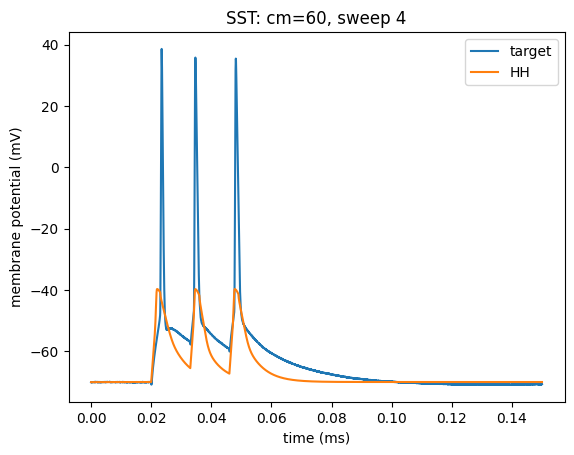

In [49]:
create_comparison_together(fastspikes_output_sliced[2], hh_4[2]*1000, d2_title='HH')
title('SST: cm=60, sweep 4')

Text(0.5, 1.0, 'Comparison for HH between cm=120 and cm=60: sweep 4')

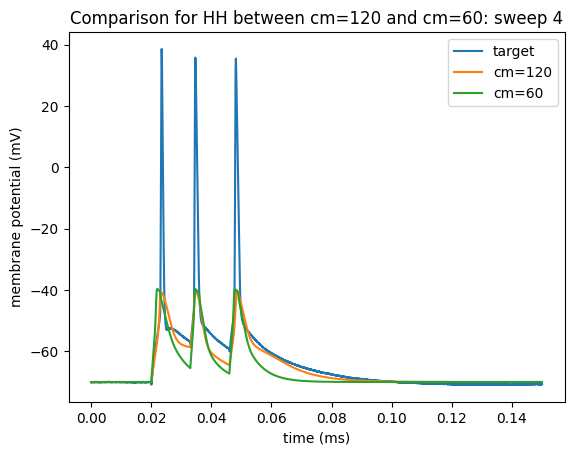

In [50]:
create_comparison_together_three(fastspikes_output_sliced[2], hh_3[2]*1000, hh_4[2]*1000, d2_title='cm=120', d3_title='cm=60')
title('Comparison for HH between cm=120 and cm=60: sweep 4')

Text(0.5, 1.0, 'SST: cm=60, sweep 5')

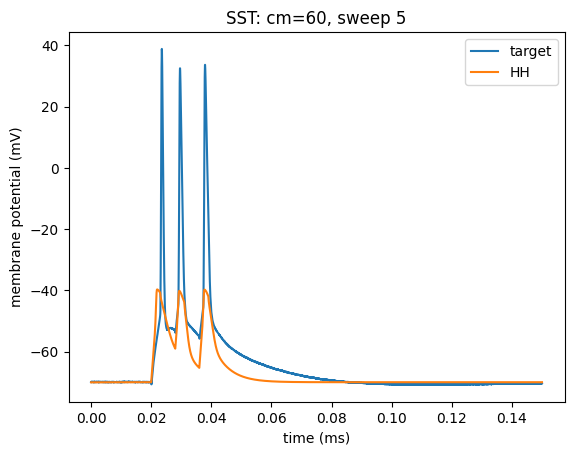

In [51]:
create_comparison_together(fastspikes_output_sliced[3], hh_4[3]*1000, d2_title='HH')
title('SST: cm=60, sweep 5')

Text(0.5, 1.0, 'Comparison for HH between cm=120 and cm=60: sweep 5')

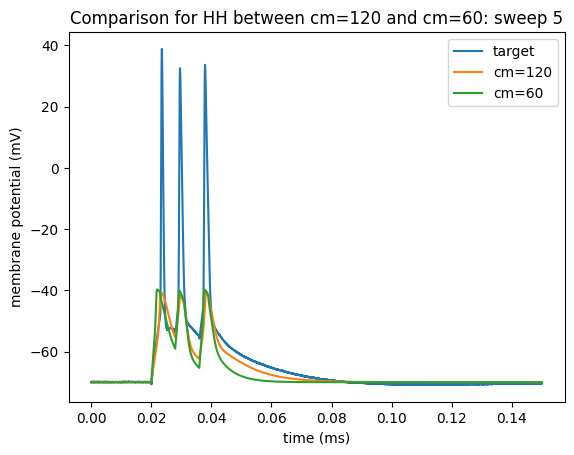

In [52]:
create_comparison_together_three(fastspikes_output_sliced[3], hh_3[3]*1000, hh_4[3]*1000, d2_title='cm=120', d3_title='cm=60')
title('Comparison for HH between cm=120 and cm=60: sweep 5')

cm=120 indisputably more accurate

In [45]:
hh_5 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=180)

first fit:
Round 0: Best parameters g_kd=2.18082584 uS, g_na=11.97625025 uS, gl=15.82631044 nS (error: 92.16576475 mV^2)
Round 1: Best parameters g_kd=2.72992599 uS, g_na=15.22527533 uS, gl=12.9965292 nS (error: 80.96716278 mV^2)
Round 2: Best parameters g_kd=2.9698548 uS, g_na=17.59422141 uS, gl=13.54826255 nS (error: 78.30718505 mV^2)
Round 3: Best parameters g_kd=2.9698548 uS, g_na=17.59422141 uS, gl=13.54826255 nS (error: 78.30718505 mV^2)
Round 4: Best parameters g_kd=2.9499064 uS, g_na=17.60712705 uS, gl=13.41191279 nS (error: 76.51217047 mV^2)
Round 5: Best parameters g_kd=2.9499064 uS, g_na=17.60712705 uS, gl=13.41191279 nS (error: 76.51217047 mV^2)
Round 6: Best parameters g_kd=3.08945067 uS, g_na=18.68158232 uS, gl=13.42543275 nS (error: 76.28432774 mV^2)
Round 7: Best parameters g_kd=3.08945067 uS, g_na=18.68158232 uS, gl=13.42543275 nS (error: 76.28432774 mV^2)
Round 8: Best parameters g_kd=3.04128612 uS, g_na=18.60628325 uS, gl=13.95527874 nS (error: 76.22163311 mV^2)
Roun

Text(0.5, 1.0, 'Comparison for HH between cm=120 and cm=180: sweep 2')

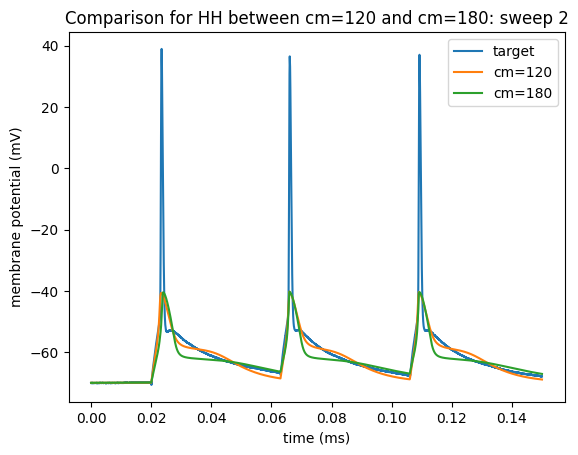

In [53]:
create_comparison_together_three(fastspikes_output_sliced[0], hh_3[0]*1000, hh_5[0]*1000, d2_title='cm=120', d3_title='cm=180')
title('Comparison for HH between cm=120 and cm=180: sweep 2')

Text(0.5, 1.0, 'Comparison for HH between cm=120 and cm=180: sweep 3')

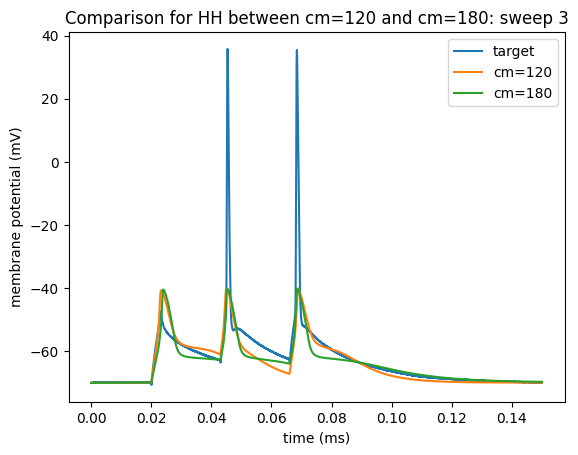

In [54]:
create_comparison_together_three(fastspikes_output_sliced[1], hh_3[1]*1000, hh_5[1]*1000, d2_title='cm=120', d3_title='cm=180')
title('Comparison for HH between cm=120 and cm=180: sweep 3')

Text(0.5, 1.0, 'Comparison for HH between cm=120 and cm=180: sweep 4')

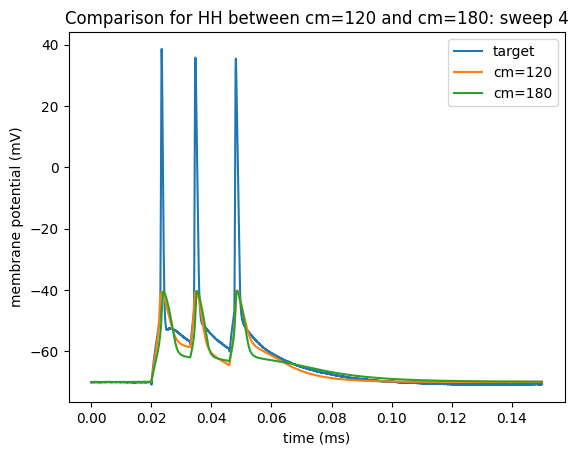

In [55]:
create_comparison_together_three(fastspikes_output_sliced[2], hh_3[2]*1000, hh_5[2]*1000, d2_title='cm=120', d3_title='cm=180')
title('Comparison for HH between cm=120 and cm=180: sweep 4')

Text(0.5, 1.0, 'Comparison for HH between cm=120 and cm=180: sweep 5')

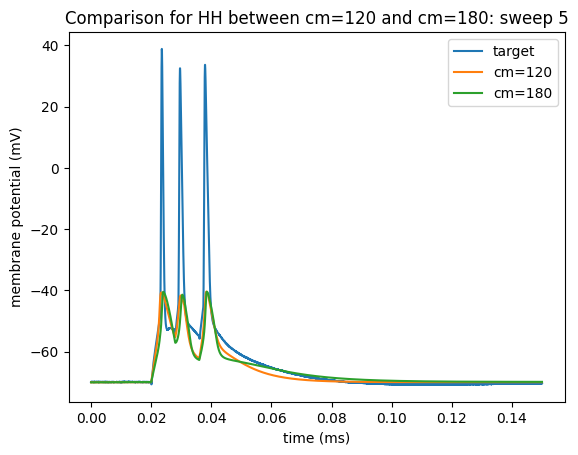

In [56]:
create_comparison_together_three(fastspikes_output_sliced[3], hh_3[3]*1000, hh_5[3]*1000, d2_title='cm=120', d3_title='cm=180')
title('Comparison for HH between cm=120 and cm=180: sweep 5')

On average cm=120 more accurate?  Although seems to switch as ISI becomes shorter?

Ek...

In [58]:
hh_6 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, ek=-60)

first fit:
Round 0: Best parameters g_kd=3.239358 uS, g_na=4.75467328 uS, gl=15.00728688 nS (error: 72.41260537 mV^2)
Round 1: Best parameters g_kd=3.12521372 uS, g_na=4.43560822 uS, gl=13.84465565 nS (error: 71.1331802 mV^2)
Round 2: Best parameters g_kd=3.19818067 uS, g_na=3.99460213 uS, gl=12.3086786 nS (error: 70.98089323 mV^2)
Round 3: Best parameters g_kd=3.35825575 uS, g_na=4.38407698 uS, gl=12.8588108 nS (error: 70.46926432 mV^2)
Round 4: Best parameters g_kd=3.35825575 uS, g_na=4.38407698 uS, gl=12.8588108 nS (error: 70.46926432 mV^2)
Round 5: Best parameters g_kd=3.55342108 uS, g_na=4.38407698 uS, gl=12.42101875 nS (error: 70.30611276 mV^2)
Round 6: Best parameters g_kd=3.55342108 uS, g_na=4.38407698 uS, gl=12.42101875 nS (error: 70.30611276 mV^2)
Round 7: Best parameters g_kd=3.55342108 uS, g_na=4.38407698 uS, gl=12.42101875 nS (error: 70.30611276 mV^2)
Round 8: Best parameters g_kd=3.70775184 uS, g_na=4.29257588 uS, gl=11.9301171 nS (error: 70.26057706 mV^2)
Round 9: Best p

Text(0.5, 1.0, 'Comparison for HH between ek, sweep: 2')

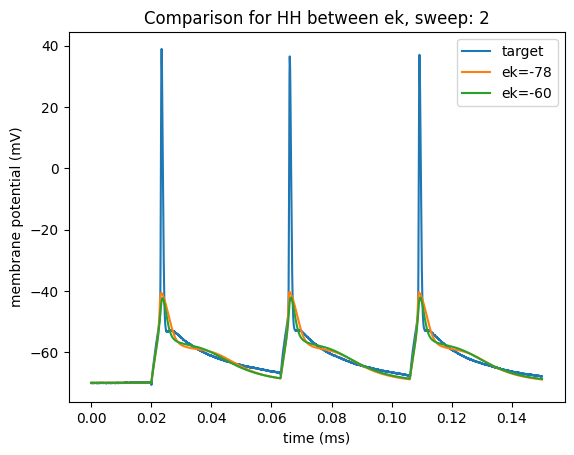

In [59]:
create_comparison_together_three(fastspikes_output_sliced[0], hh_3[0]*1000, hh_6[0]*1000,
                                 d2_title='ek=-78', d3_title='ek=-60')
title('Comparison for HH between ek, sweep: 2')

(-70.0, -40.0)

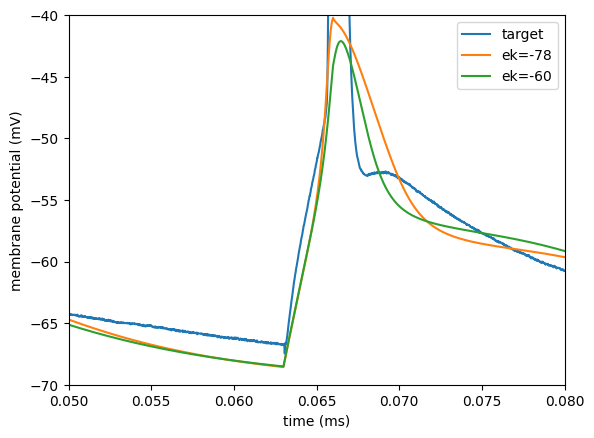

In [60]:
create_comparison_together_three(fastspikes_output_sliced[0], hh_3[0]*1000, hh_6[0]*1000,
                                 d2_title='ek=-78', d3_title='ek=-60')
xlim(0.05, 0.08)
ylim(-70, -40)

Questionable... -78 better than -60?

Text(0.5, 1.0, 'Comparison for HH between ek, sweep: 3')

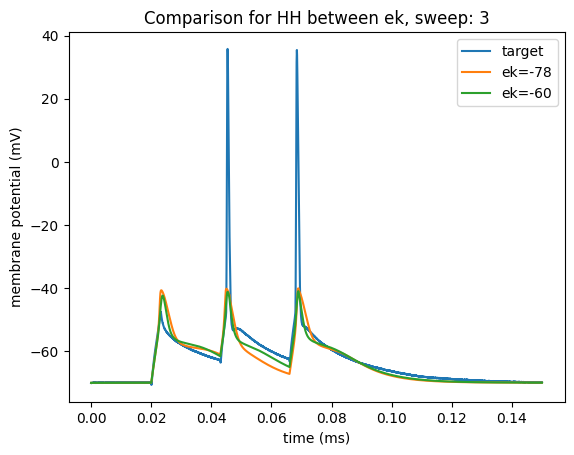

In [61]:
create_comparison_together_three(fastspikes_output_sliced[1], hh_3[1]*1000, hh_6[1]*1000,
                                 d2_title='ek=-78', d3_title='ek=-60')
title('Comparison for HH between ek, sweep: 3')

-60 better than -78?  Depends...

Text(0.5, 1.0, 'Comparison for HH between ek, sweep: 4')

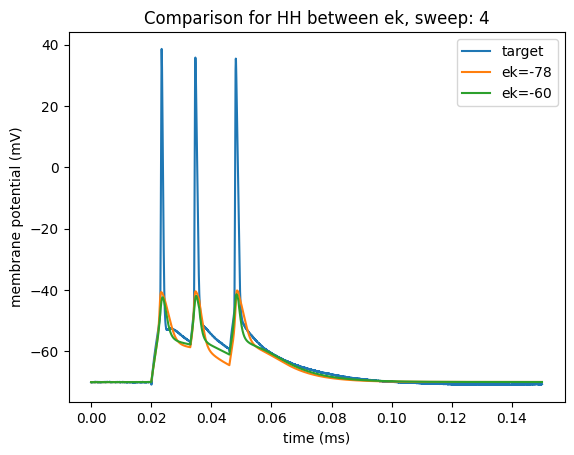

In [62]:
create_comparison_together_three(fastspikes_output_sliced[2], hh_3[2]*1000, hh_6[2]*1000,
                                 d2_title='ek=-78', d3_title='ek=-60')
title('Comparison for HH between ek, sweep: 4')

Arguably -60 > -78

Text(0.5, 1.0, 'Comparison for HH between ek, sweep: 5')

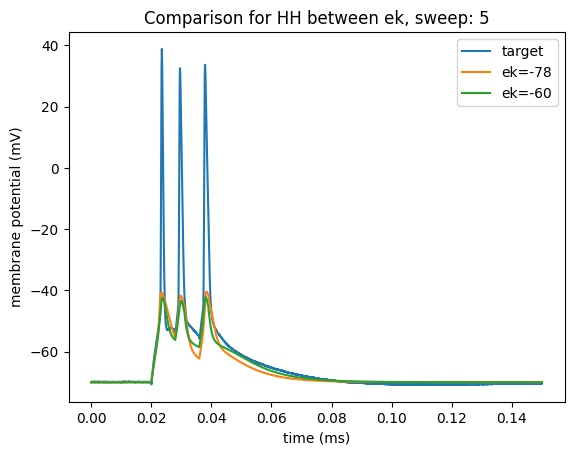

In [63]:
create_comparison_together_three(fastspikes_output_sliced[3], hh_3[3]*1000, hh_6[3]*1000,
                                 d2_title='ek=-78', d3_title='ek=-60')
title('Comparison for HH between ek, sweep: 5')

-60 > -78?

In [64]:
hh_7 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, ek=-30)

first fit:
Round 0: Best parameters g_kd=0.61315051 uS, g_na=8.36824773 uS, gl=33.05391309 nS (error: 558.14682211 mV^2)
Round 1: Best parameters g_kd=0.66249945 uS, g_na=3.01264015 uS, gl=38.19808319 nS (error: 272.3342561 mV^2)
Round 2: Best parameters g_kd=0.40962869 uS, g_na=2.77380012 uS, gl=37.62287816 nS (error: 140.66174729 mV^2)
Round 3: Best parameters g_kd=237.49369966 nS, g_na=3.24107669 uS, gl=34.65589387 nS (error: 129.44600562 mV^2)
Round 4: Best parameters g_kd=237.49369966 nS, g_na=3.24107669 uS, gl=34.65589387 nS (error: 129.44600562 mV^2)
Round 5: Best parameters g_kd=282.14195036 nS, g_na=2.33042733 uS, gl=29.76521389 nS (error: 124.82335278 mV^2)
Round 6: Best parameters g_kd=237.4185874 nS, g_na=2.14205647 uS, gl=29.0992875 nS (error: 122.20992701 mV^2)
Round 7: Best parameters g_kd=188.3557344 nS, g_na=2.30945816 uS, gl=27.24204279 nS (error: 113.38845792 mV^2)
Round 8: Best parameters g_kd=158.38544493 nS, g_na=2.0721276 uS, gl=24.07050448 nS (error: 106.8968012

Text(0.5, 1.0, 'Comparison for HH between ek, sweep: 2')

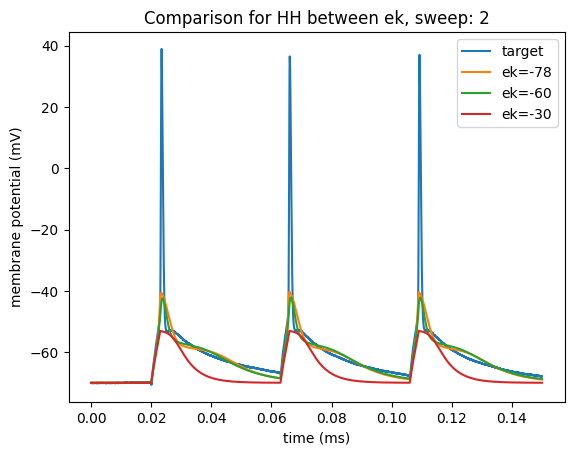

In [65]:
create_comparison_together_four(fastspikes_output_sliced[0], hh_3[0]*1000, hh_6[0]*1000, hh_7[0]*1000,
                                 d2_title='ek=-78', d3_title='ek=-60', d4_title='ek=-30')
title('Comparison for HH between ek, sweep: 2')

Text(0.5, 1.0, 'Comparison for HH between ek, sweep: 3')

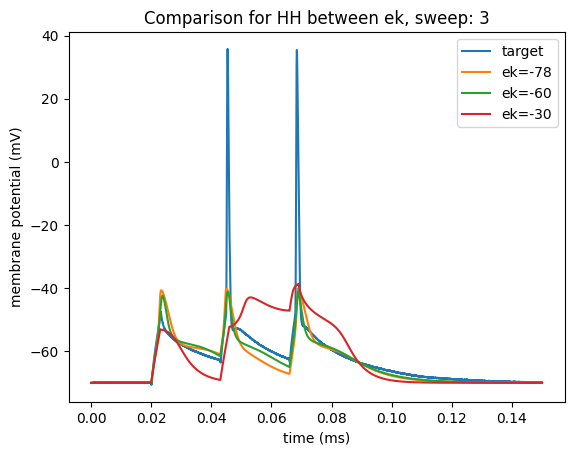

In [66]:
create_comparison_together_four(fastspikes_output_sliced[1], hh_3[1]*1000, hh_6[1]*1000, hh_7[1]*1000,
                                 d2_title='ek=-78', d3_title='ek=-60', d4_title='ek=-30')
title('Comparison for HH between ek, sweep: 3')

In [67]:
hh_8 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, ek=-70)

first fit:
Round 0: Best parameters g_kd=1.98551922 uS, g_na=8.51008309 uS, gl=15.37524379 nS (error: 72.12164833 mV^2)
Round 1: Best parameters g_kd=1.81040818 uS, g_na=6.95291876 uS, gl=13.10128077 nS (error: 71.19017485 mV^2)
Round 2: Best parameters g_kd=1.81040818 uS, g_na=6.95291876 uS, gl=13.10128077 nS (error: 71.19017485 mV^2)
Round 3: Best parameters g_kd=1.63710051 uS, g_na=7.23498843 uS, gl=14.97411115 nS (error: 70.39003356 mV^2)
Round 4: Best parameters g_kd=1.43942466 uS, g_na=5.30071184 uS, gl=11.44200537 nS (error: 68.38609433 mV^2)
Round 5: Best parameters g_kd=1.43942466 uS, g_na=5.30071184 uS, gl=11.44200537 nS (error: 68.38609433 mV^2)
Round 6: Best parameters g_kd=1.77346431 uS, g_na=6.8446956 uS, gl=11.8911763 nS (error: 67.6873906 mV^2)
Round 7: Best parameters g_kd=1.77346431 uS, g_na=6.8446956 uS, gl=11.8911763 nS (error: 67.6873906 mV^2)
Round 8: Best parameters g_kd=1.77346431 uS, g_na=6.8446956 uS, gl=11.8911763 nS (error: 67.6873906 mV^2)
Round 9: Best par

Text(0.5, 1.0, 'Comparison for HH between ek, sweep: 2')

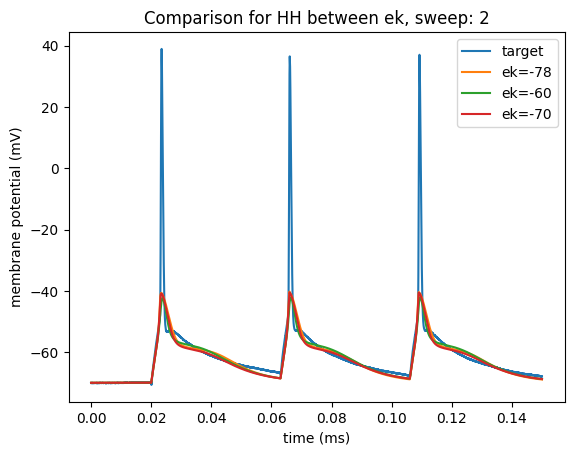

In [68]:
create_comparison_together_four(fastspikes_output_sliced[0], hh_3[0]*1000, hh_6[0]*1000, hh_8[0]*1000,
                                 d2_title='ek=-78', d3_title='ek=-60', d4_title='ek=-70')
title('Comparison for HH between ek, sweep: 2')

Text(0.5, 1.0, 'Comparison for HH between ek, sweep: 2')

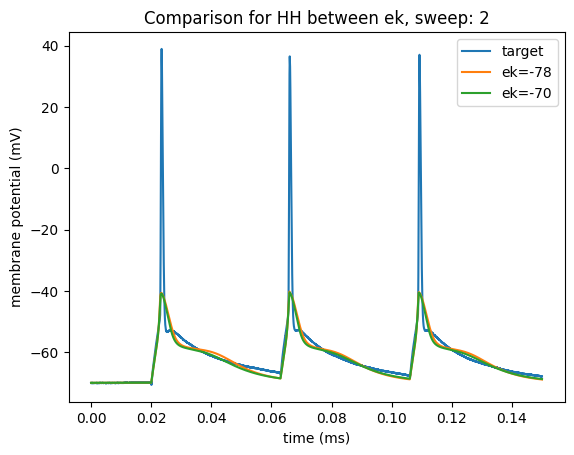

In [69]:
create_comparison_together_three(fastspikes_output_sliced[0], hh_3[0]*1000, hh_8[0]*1000,
                                 d2_title='ek=-78', d3_title='ek=-70')
title('Comparison for HH between ek, sweep: 2')

Text(0.5, 1.0, 'Comparison for HH between ek, sweep: 2')

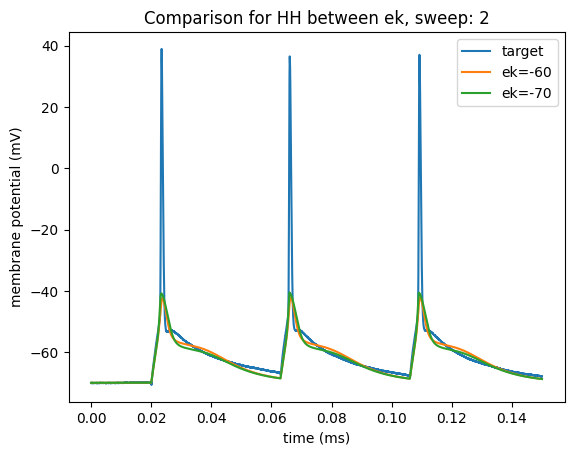

In [71]:
create_comparison_together_three(fastspikes_output_sliced[0], hh_6[0]*1000, hh_8[0]*1000,
                                 d2_title='ek=-60', d3_title='ek=-70')
title('Comparison for HH between ek, sweep: 2')

***

ek = -70 (for now)

ena...

In [72]:
hh_9 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, ek=-70, ena=40)

first fit:
Round 0: Best parameters g_kd=0.73397777 uS, g_na=6.57397001 uS, gl=18.5495928 nS (error: 116.40074601 mV^2)
Round 1: Best parameters g_kd=0.48453676 uS, g_na=3.50012843 uS, gl=19.27939787 nS (error: 95.91626542 mV^2)
Round 2: Best parameters g_kd=0.40531885 uS, g_na=2.66023086 uS, gl=18.5495928 nS (error: 82.95184724 mV^2)
Round 3: Best parameters g_kd=0.36180358 uS, g_na=1.82450186 uS, gl=13.69399109 nS (error: 56.77186814 mV^2)
Round 4: Best parameters g_kd=0.32502397 uS, g_na=1.71715915 uS, gl=12.47142631 nS (error: 39.11327432 mV^2)
Round 5: Best parameters g_kd=0.32502397 uS, g_na=1.71715915 uS, gl=12.47142631 nS (error: 39.11327432 mV^2)
Round 6: Best parameters g_kd=313.12224488 nS, g_na=1.48154808 uS, gl=11.80374143 nS (error: 35.09332445 mV^2)
Round 7: Best parameters g_kd=0.32068414 uS, g_na=1.48154808 uS, gl=11.31349083 nS (error: 34.16768493 mV^2)
Round 8: Best parameters g_kd=0.32068414 uS, g_na=1.48154808 uS, gl=11.31349083 nS (error: 34.16768493 mV^2)
Round 9

Text(0.5, 1.0, 'Comparison for HH between ena, sweep: 2')

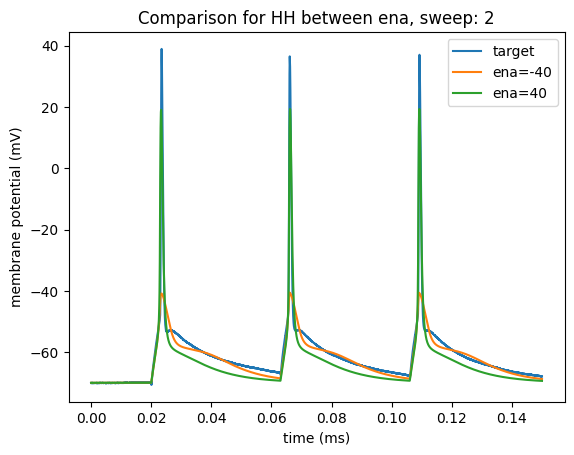

In [73]:
create_comparison_together_three(fastspikes_output_sliced[0], hh_8[0]*1000, hh_9[0]*1000,
                                 d2_title='ena=-40', d3_title='ena=40')
title('Comparison for HH between ena, sweep: 2')

Text(0.5, 1.0, 'Comparison for HH between ena, sweep: 3')

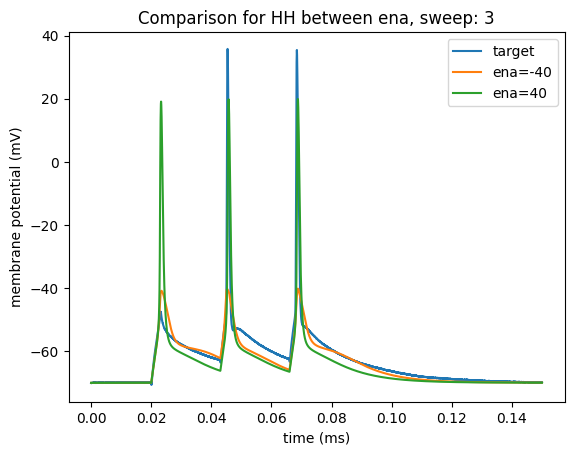

In [74]:
create_comparison_together_three(fastspikes_output_sliced[1], hh_8[1]*1000, hh_9[1]*1000,
                                 d2_title='ena=-40', d3_title='ena=40')
title('Comparison for HH between ena, sweep: 3')

Text(0.5, 1.0, 'Comparison for HH between ena, sweep: 4')

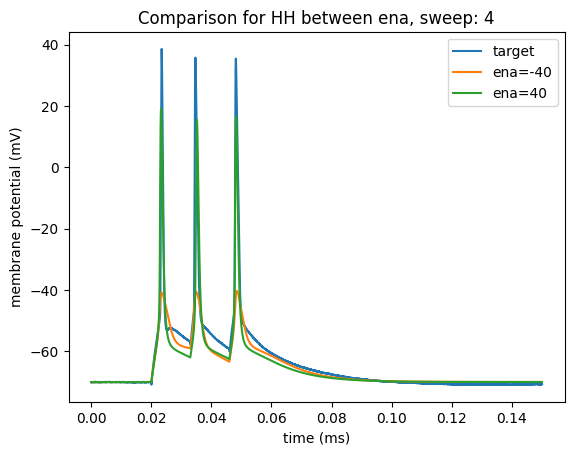

In [75]:
create_comparison_together_three(fastspikes_output_sliced[2], hh_8[2]*1000, hh_9[2]*1000,
                                 d2_title='ena=-40', d3_title='ena=40')
title('Comparison for HH between ena, sweep: 4')

Text(0.5, 1.0, 'Comparison for HH between ena, sweep: 5')

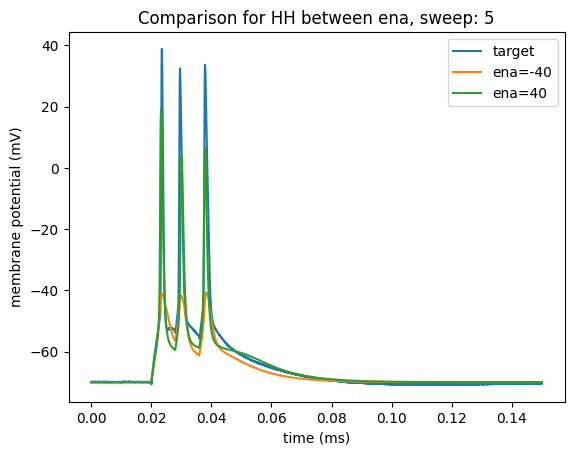

In [76]:
create_comparison_together_three(fastspikes_output_sliced[3], hh_8[3]*1000, hh_9[3]*1000,
                                 d2_title='ena=-40', d3_title='ena=40')
title('Comparison for HH between ena, sweep: 5')

In [77]:
hh_10 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, ek=-70, ena=60)

first fit:
Round 0: Best parameters g_kd=0.71978197 uS, g_na=7.75285821 uS, gl=17.42775631 nS (error: 154.9206865 mV^2)
Round 1: Best parameters g_kd=0.53602437 uS, g_na=2.54671005 uS, gl=13.53530898 nS (error: 105.64899593 mV^2)
Round 2: Best parameters g_kd=0.39811375 uS, g_na=2.47253194 uS, gl=13.53530898 nS (error: 76.97503885 mV^2)
Round 3: Best parameters g_kd=0.35304168 uS, g_na=1.9849751 uS, gl=12.63857035 nS (error: 59.47265705 mV^2)
Round 4: Best parameters g_kd=0.35304168 uS, g_na=1.9849751 uS, gl=12.63857035 nS (error: 59.47265705 mV^2)
Round 5: Best parameters g_kd=0.32286103 uS, g_na=1.70492291 uS, gl=13.0671005 nS (error: 51.4573823 mV^2)
Round 6: Best parameters g_kd=0.32286103 uS, g_na=1.70492291 uS, gl=13.0671005 nS (error: 51.4573823 mV^2)
Round 7: Best parameters g_kd=0.32286103 uS, g_na=1.70492291 uS, gl=13.0671005 nS (error: 51.4573823 mV^2)
Round 8: Best parameters g_kd=311.88911416 nS, g_na=1.37957992 uS, gl=12.22219657 nS (error: 45.02290973 mV^2)
Round 9: Best

Text(0.5, 1.0, 'Comparison for HH between ena, sweep: 2')

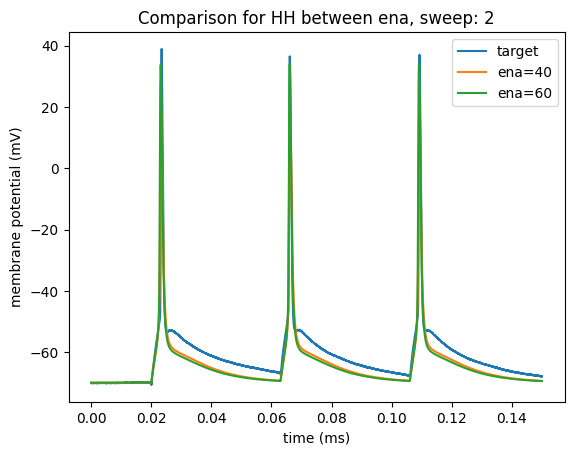

In [78]:
create_comparison_together_three(fastspikes_output_sliced[0], hh_9[0]*1000, hh_10[0]*1000,
                                 d2_title='ena=40', d3_title='ena=60')
title('Comparison for HH between ena, sweep: 2')

Interesting.  Looks like 60 > 40, but error higher...

Text(0.5, 1.0, 'Comparison for HH between ena, sweep: 3')

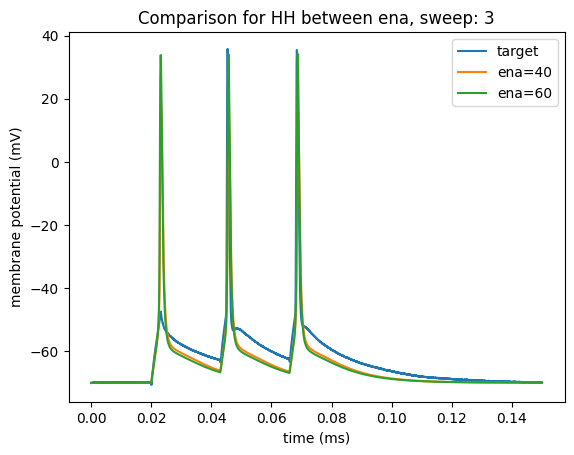

In [79]:
create_comparison_together_three(fastspikes_output_sliced[1], hh_9[1]*1000, hh_10[1]*1000,
                                 d2_title='ena=40', d3_title='ena=60')
title('Comparison for HH between ena, sweep: 3')

Text(0.5, 1.0, 'Comparison for HH between ena, sweep: 4')

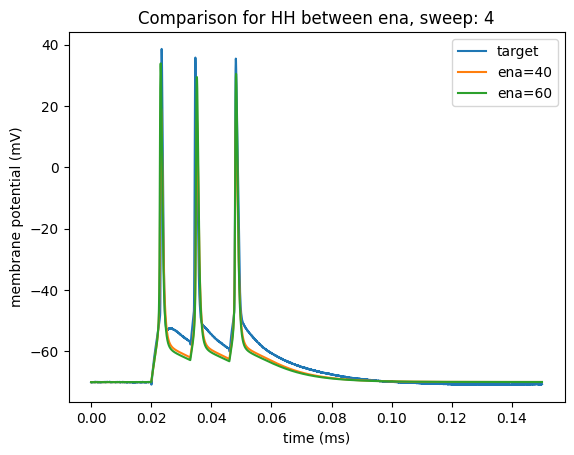

In [80]:
create_comparison_together_three(fastspikes_output_sliced[2], hh_9[2]*1000, hh_10[2]*1000,
                                 d2_title='ena=40', d3_title='ena=60')
title('Comparison for HH between ena, sweep: 4')

Text(0.5, 1.0, 'Comparison for HH between ena, sweep: 5')

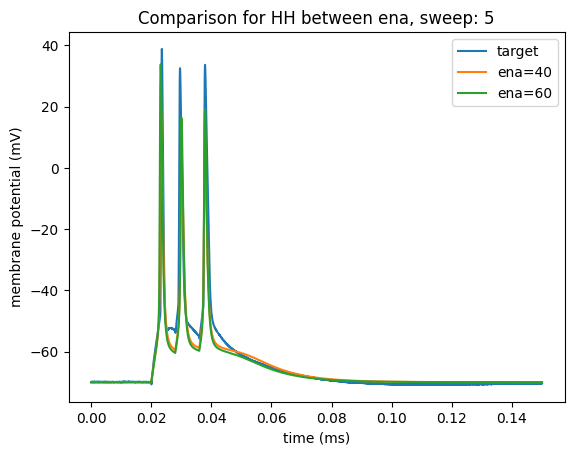

In [81]:
create_comparison_together_three(fastspikes_output_sliced[3], hh_9[3]*1000, hh_10[3]*1000,
                                 d2_title='ena=40', d3_title='ena=60')
title('Comparison for HH between ena, sweep: 5')

Text(0.5, 1.0, 'Sweep 2')

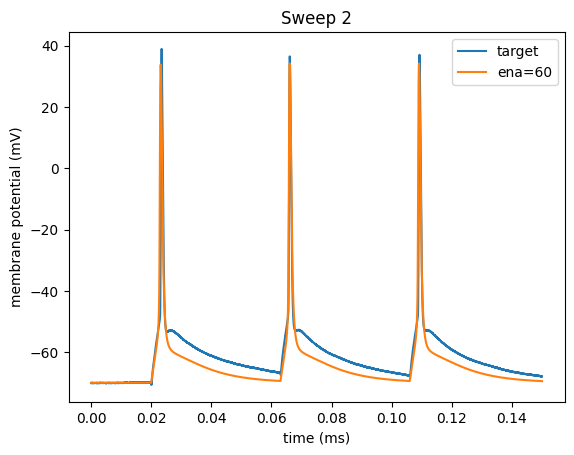

In [95]:
create_comparison_together(fastspikes_output_sliced[0], hh_10[0]*1000, d2_title='ena=60')
title('Sweep 2')

Text(0.5, 1.0, 'Sweep 3')

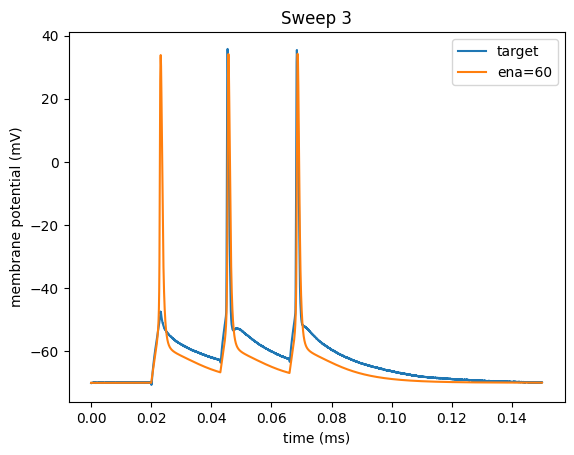

In [96]:
create_comparison_together(fastspikes_output_sliced[1], hh_10[1]*1000, d2_title='ena=60')
title('Sweep 3')

Text(0.5, 1.0, 'Sweep 4')

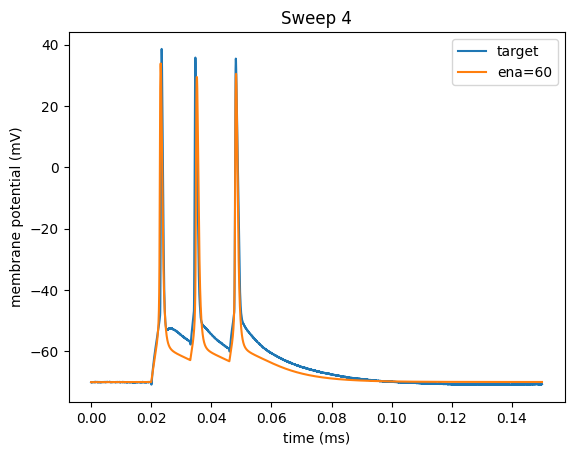

In [97]:
create_comparison_together(fastspikes_output_sliced[2], hh_10[2]*1000, d2_title='ena=60')
title('Sweep 4')

Text(0.5, 1.0, 'Sweep 5')

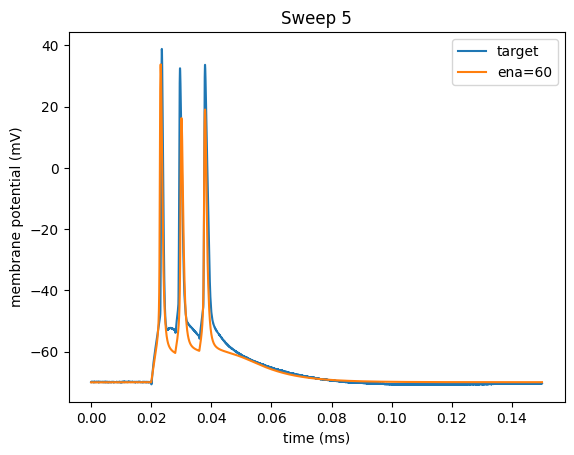

In [98]:
create_comparison_together(fastspikes_output_sliced[3], hh_10[3]*1000, d2_title='ena=60')
title('Sweep 5')

ena=60, underpeaks, more so as ISI shorter...

In [82]:
hh_11 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, ek=-70, ena=70)

first fit:
Round 0: Best parameters g_kd=0.74299265 uS, g_na=6.89805883 uS, gl=25.29311415 nS (error: 162.25451077 mV^2)
Round 1: Best parameters g_kd=0.50386861 uS, g_na=4.06859117 uS, gl=16.04414141 nS (error: 120.2743796 mV^2)
Round 2: Best parameters g_kd=0.50484674 uS, g_na=3.09785529 uS, gl=13.31916109 nS (error: 112.8212737 mV^2)
Round 3: Best parameters g_kd=0.46196655 uS, g_na=2.70817896 uS, gl=13.04054603 nS (error: 102.12813435 mV^2)
Round 4: Best parameters g_kd=0.35185078 uS, g_na=2.10233668 uS, gl=13.78285327 nS (error: 85.65833037 mV^2)
Round 5: Best parameters g_kd=0.368415 uS, g_na=1.70403275 uS, gl=11.81510333 nS (error: 67.1984006 mV^2)
Round 6: Best parameters g_kd=0.33604485 uS, g_na=1.46630392 uS, gl=11.08787921 nS (error: 51.62741865 mV^2)
Round 7: Best parameters g_kd=0.33604485 uS, g_na=1.39879547 uS, gl=11.08787921 nS (error: 51.08847374 mV^2)
Round 8: Best parameters g_kd=0.32011613 uS, g_na=1.41327515 uS, gl=11.53362876 nS (error: 48.38345779 mV^2)
Round 9: 

Text(0.5, 1.0, 'Sweep 2')

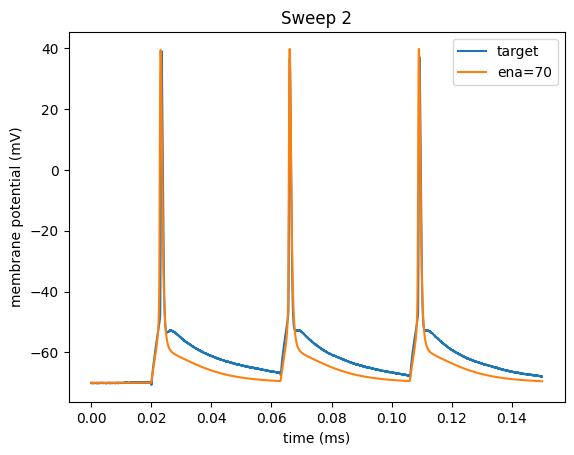

In [84]:
create_comparison_together(fastspikes_output_sliced[0], hh_11[0]*1000, d2_title='ena=70')
title('Sweep 2')

Text(0.5, 1.0, 'Comparison for HH between ena, sweep: 2')

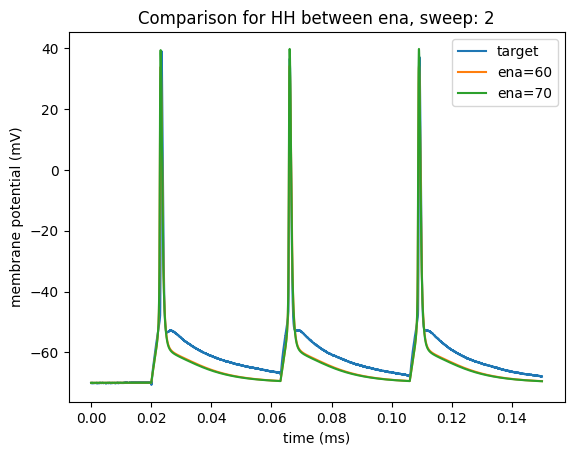

In [85]:
create_comparison_together_three(fastspikes_output_sliced[0], hh_10[0]*1000, hh_11[0]*1000,
                                 d2_title='ena=60', d3_title='ena=70')
title('Comparison for HH between ena, sweep: 2')

60 peaks just under original, 70 peaks just over...

Text(0.5, 1.0, 'Comparison for HH between ena, sweep: 3')

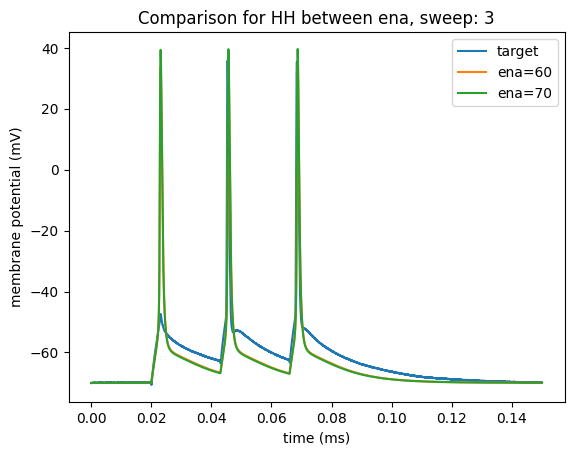

In [86]:
create_comparison_together_three(fastspikes_output_sliced[1], hh_10[1]*1000, hh_11[1]*1000,
                                 d2_title='ena=60', d3_title='ena=70')
title('Comparison for HH between ena, sweep: 3')

Text(0.5, 1.0, 'Sweep 3')

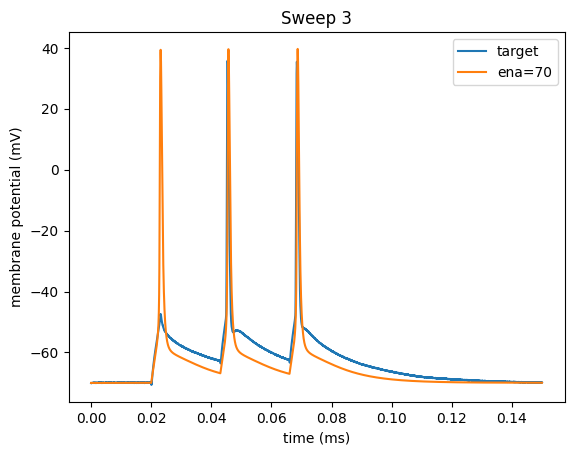

In [91]:
create_comparison_together(fastspikes_output_sliced[1], hh_11[1]*1000, d2_title='ena=70')
title('Sweep 3')

Text(0.5, 1.0, 'Sweep 4')

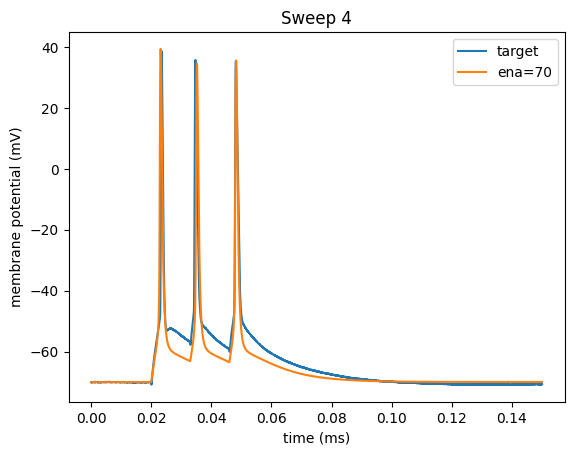

In [92]:
create_comparison_together(fastspikes_output_sliced[2], hh_11[2]*1000, d2_title='ena=70')
title('Sweep 4')

Text(0.5, 1.0, 'Sweep 5')

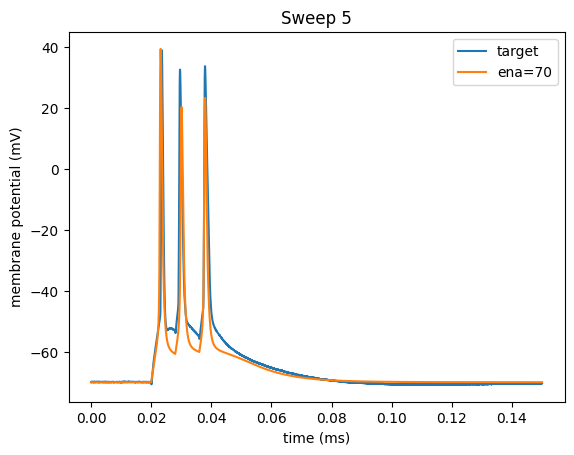

In [93]:
create_comparison_together(fastspikes_output_sliced[3], hh_11[3]*1000, d2_title='ena=70')
title('Sweep 5')

Oh, 70 over-peaks, but as ISI shorter, under-peaks...

In [87]:
hh_12 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, ek=-70, ena=65)

first fit:
Round 0: Best parameters g_kd=0.60487634 uS, g_na=3.70795119 uS, gl=16.55741958 nS (error: 130.90072182 mV^2)
Round 1: Best parameters g_kd=0.62679327 uS, g_na=2.86864093 uS, gl=12.56171731 nS (error: 121.4638127 mV^2)
Round 2: Best parameters g_kd=0.42586074 uS, g_na=2.35098069 uS, gl=12.29232852 nS (error: 84.46445284 mV^2)
Round 3: Best parameters g_kd=0.3882556 uS, g_na=2.01833454 uS, gl=12.91958164 nS (error: 75.70598189 mV^2)
Round 4: Best parameters g_kd=0.36533479 uS, g_na=1.77323153 uS, gl=11.62415662 nS (error: 61.88096365 mV^2)
Round 5: Best parameters g_kd=0.32849566 uS, g_na=1.53149335 uS, gl=12.83089521 nS (error: 56.08712957 mV^2)
Round 6: Best parameters g_kd=0.3289087 uS, g_na=1.42122743 uS, gl=11.50996866 nS (error: 48.35291609 mV^2)
Round 7: Best parameters g_kd=0.3289087 uS, g_na=1.42122743 uS, gl=11.50996866 nS (error: 48.35291609 mV^2)
Round 8: Best parameters g_kd=0.32849566 uS, g_na=1.37773308 uS, gl=10.90394605 nS (error: 44.72216068 mV^2)
Round 9: B

Text(0.5, 1.0, 'Sweep 2')

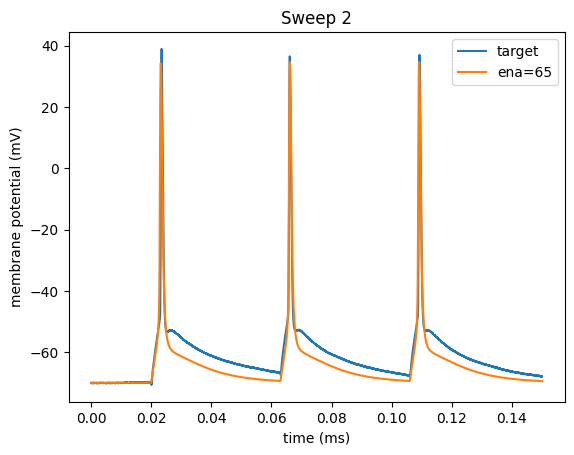

In [88]:
create_comparison_together(fastspikes_output_sliced[0], hh_12[0]*1000, d2_title='ena=65')
title('Sweep 2')

Text(0.5, 1.0, 'Sweep 3')

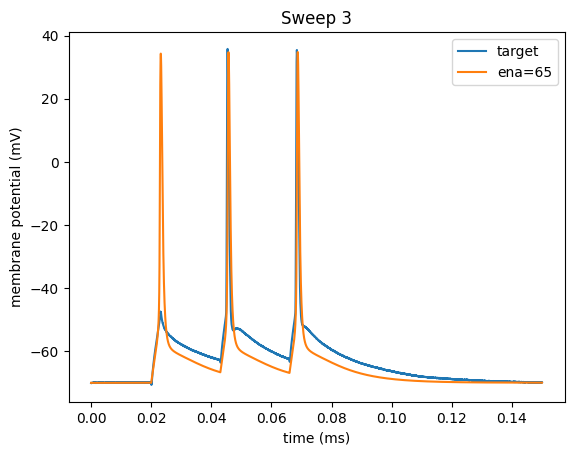

In [89]:
create_comparison_together(fastspikes_output_sliced[1], hh_12[1]*1000, d2_title='ena=65')
title('Sweep 3')

Text(0.5, 1.0, 'Sweep 4')

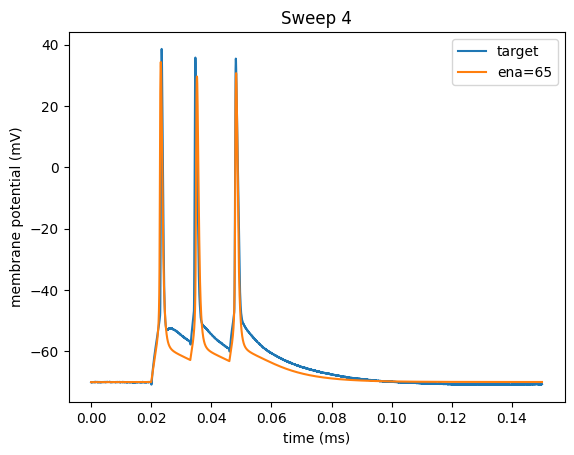

In [90]:
create_comparison_together(fastspikes_output_sliced[2], hh_12[2]*1000, d2_title='ena=65')
title('Sweep 4')

Text(0.5, 1.0, 'Sweep 5')

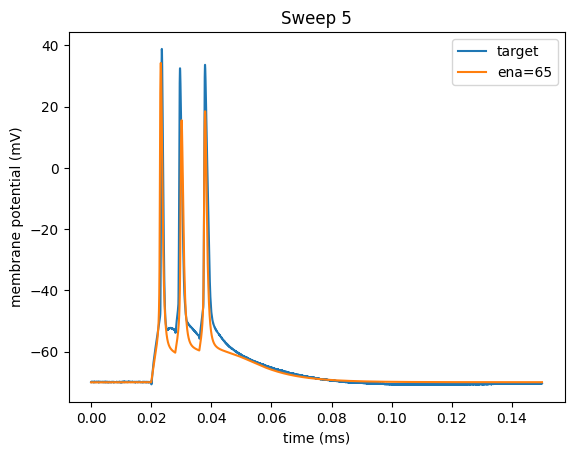

In [99]:
create_comparison_together(fastspikes_output_sliced[3], hh_12[3]*1000, d2_title='ena=65')
title('Sweep 5')

Text(0.5, 1.0, 'Comparison for HH between ena: sweep 5')

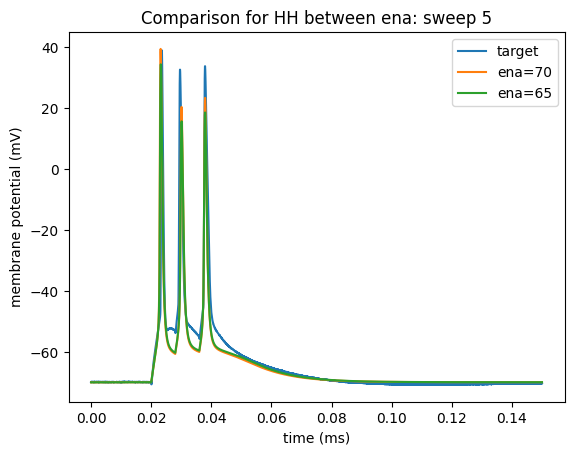

In [102]:
create_comparison_together_three(fastspikes_output_sliced[3], hh_11[3]*1000, hh_12[3]*1000,
                                 d2_title='ena=70', d3_title='ena=65')
title('Comparison for HH between ena: sweep 5')

ena=70 is closer... for sweeps 4 and 5

But 65 closer for sweeps 2 and 3...

In [103]:
hh_13 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, ek=-70, ena=68)

first fit:
Round 0: Best parameters g_kd=0.73594459 uS, g_na=6.70658915 uS, gl=24.9968139 nS (error: 158.96958189 mV^2)
Round 1: Best parameters g_kd=0.42865344 uS, g_na=3.28390774 uS, gl=23.7492289 nS (error: 128.07664172 mV^2)
Round 2: Best parameters g_kd=0.42951471 uS, g_na=2.61928269 uS, gl=15.21420689 nS (error: 100.10869918 mV^2)
Round 3: Best parameters g_kd=0.34438856 uS, g_na=2.06080676 uS, gl=15.9149168 nS (error: 78.85106169 mV^2)
Round 4: Best parameters g_kd=0.35150504 uS, g_na=1.88211923 uS, gl=12.82004608 nS (error: 65.81068492 mV^2)
Round 5: Best parameters g_kd=0.35150504 uS, g_na=1.88211923 uS, gl=12.82004608 nS (error: 65.81068492 mV^2)
Round 6: Best parameters g_kd=0.35342896 uS, g_na=1.7610953 uS, gl=11.65206796 nS (error: 60.9291675 mV^2)
Round 7: Best parameters g_kd=0.34438856 uS, g_na=1.65001963 uS, gl=11.96150353 nS (error: 58.38821135 mV^2)
Round 8: Best parameters g_kd=0.32147329 uS, g_na=1.44859903 uS, gl=11.09232124 nS (error: 57.11137719 mV^2)
Round 9: B

Text(0.5, 1.0, 'Comparison for HH between ena: sweep 2')

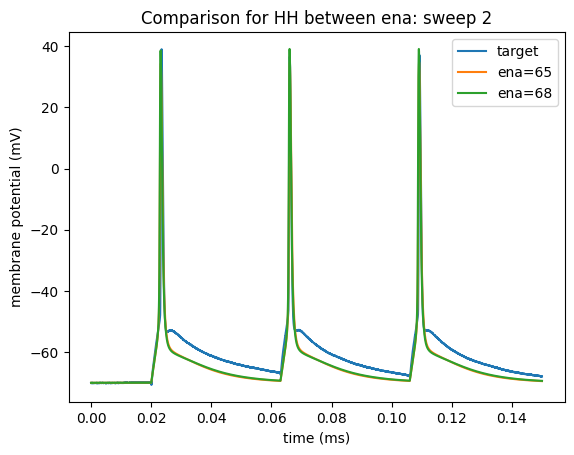

In [104]:
create_comparison_together_three(fastspikes_output_sliced[0], hh_12[0]*1000, hh_13[0]*1000,
                                 d2_title='ena=65', d3_title='ena=68')
title('Comparison for HH between ena: sweep 2')

Text(0.5, 1.0, 'Comparison for HH between ena: sweep 3')

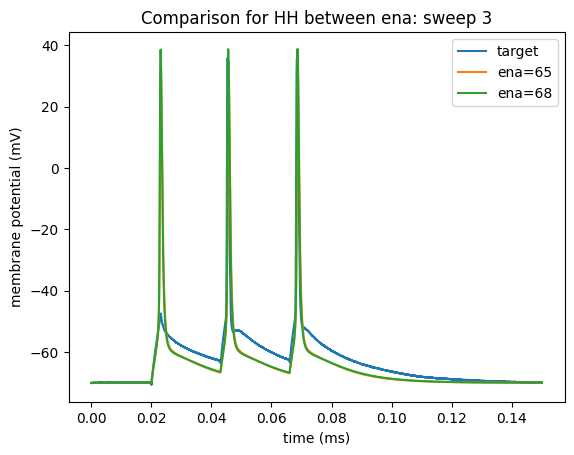

In [105]:
create_comparison_together_three(fastspikes_output_sliced[1], hh_12[1]*1000, hh_13[1]*1000,
                                 d2_title='ena=65', d3_title='ena=68')
title('Comparison for HH between ena: sweep 3')

Maybe 65 closer?

Text(0.5, 1.0, 'Comparison for HH between ena: sweep 4')

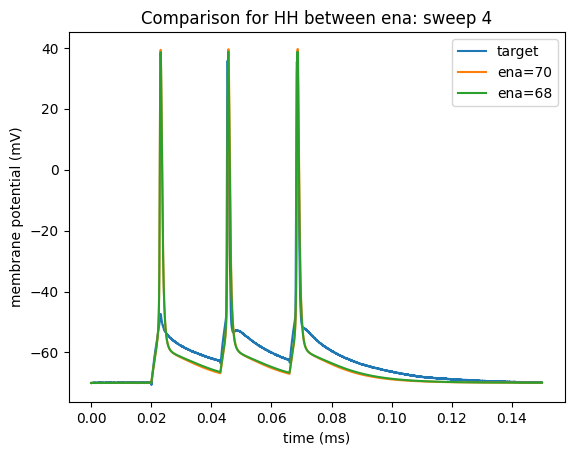

In [106]:
create_comparison_together_three(fastspikes_output_sliced[1], hh_11[1]*1000, hh_13[1]*1000,
                                 d2_title='ena=70', d3_title='ena=68')
title('Comparison for HH between ena: sweep 4')

68 closer

Text(0.5, 1.0, 'Comparison for HH between ena: sweep 5')

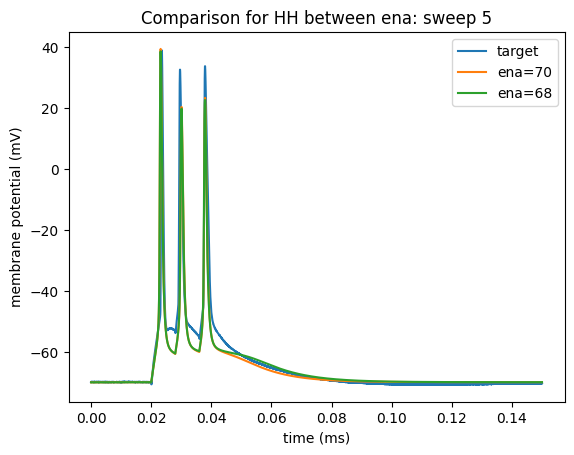

In [107]:
create_comparison_together_three(fastspikes_output_sliced[3], hh_11[3]*1000, hh_13[3]*1000,
                                 d2_title='ena=70', d3_title='ena=68')
title('Comparison for HH between ena: sweep 5')

70 closer

As average, ena=68 for now...

vt...

In [108]:
hh_14 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, ek=-70, ena=68, vt=0)

first fit:
Round 0: Best parameters g_kd=2.37508661 uS, g_na=13.97454815 uS, gl=13.62792279 nS (error: 100.78993764 mV^2)
Round 1: Best parameters g_kd=0.81322305 uS, g_na=13.17926271 uS, gl=11.76586164 nS (error: 94.74230441 mV^2)
Round 2: Best parameters g_kd=0.97741474 uS, g_na=4.69009487 uS, gl=11.14535916 nS (error: 92.8013046 mV^2)
Round 3: Best parameters g_kd=0.35957486 uS, g_na=3.27090422 uS, gl=10.74596987 nS (error: 91.60265808 mV^2)
Round 4: Best parameters g_kd=250.06153719 nS, g_na=5.67083849 uS, gl=10.45761055 nS (error: 90.77210434 mV^2)
Round 5: Best parameters g_kd=0.72512988 uS, g_na=10.77296804 uS, gl=10.30245504 nS (error: 90.34007612 mV^2)
Round 6: Best parameters g_kd=1.92456748 uS, g_na=4.33714102 uS, gl=10.202286 nS (error: 90.06743193 mV^2)
Round 7: Best parameters g_kd=0.67034481 uS, g_na=17.86800566 uS, gl=10.15975819 nS (error: 89.95327264 mV^2)
Round 8: Best parameters g_kd=182.53233003 nS, g_na=17.6558706 uS, gl=10.10831344 nS (error: 89.8165051 mV^2)
Rou

Text(0.5, 1.0, 'vt=0: sweep 2')

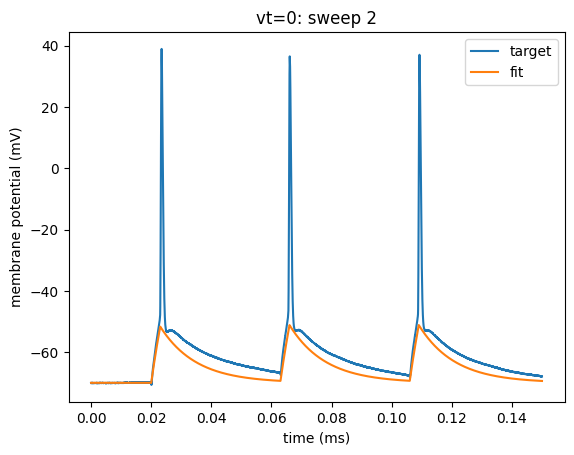

In [113]:
create_comparison_together(fastspikes_output_sliced[0], hh_14[0]*1000)
title('vt=0: sweep 2')

In [110]:
hh_15 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, ek=-70, ena=68, vt=70)

first fit:
Round 0: Best parameters g_kd=1.39218624 uS, g_na=5.62585578 uS, gl=13.43535503 nS (error: 100.16263432 mV^2)
Round 1: Best parameters g_kd=1.79509124 uS, g_na=5.17926433 uS, gl=11.94835345 nS (error: 95.32572128 mV^2)
Round 2: Best parameters g_kd=0.98446342 uS, g_na=4.69351486 uS, gl=11.02773457 nS (error: 92.44327796 mV^2)
Round 3: Best parameters g_kd=3.13789815 uS, g_na=3.4169705 uS, gl=10.71705045 nS (error: 91.51789848 mV^2)
Round 4: Best parameters g_kd=3.37621289 uS, g_na=3.63498296 uS, gl=10.4420181 nS (error: 90.72818282 mV^2)
Round 5: Best parameters g_kd=3.50831055 uS, g_na=2.40970297 uS, gl=10.33233002 nS (error: 90.42237205 mV^2)
Round 6: Best parameters g_kd=3.60821277 uS, g_na=1.96913292 uS, gl=10.22931735 nS (error: 90.14049576 mV^2)
Round 7: Best parameters g_kd=214.714279 nS, g_na=2.06465594 uS, gl=10.14258519 nS (error: 89.90745381 mV^2)
Round 8: Best parameters g_kd=103.20947305 nS, g_na=1.82641678 uS, gl=10.10020881 nS (error: 89.79509436 mV^2)
Round 9

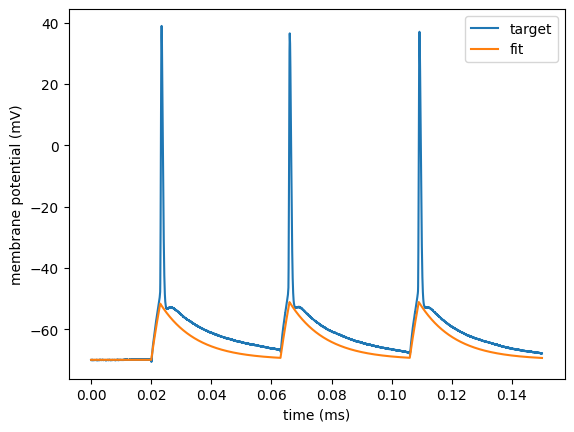

In [111]:
create_comparison_together(fastspikes_output_sliced[0], hh_15[0]*1000)

In [112]:
hh_16 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, ek=-70, ena=68, vt=-100)

first fit:
Round 0: Best parameters g_kd=2.78518175 uS, g_na=4.12714806 uS, gl=28.86276887 nS (error: 170.35959598 mV^2)
Round 1: Best parameters g_kd=2.15138314 uS, g_na=2.32069118 uS, gl=31.51514609 nS (error: 168.5592882 mV^2)
Round 2: Best parameters g_kd=1.65108406 uS, g_na=1.94042277 uS, gl=34.56326125 nS (error: 168.17675405 mV^2)
Round 3: Best parameters g_kd=1.50462905 uS, g_na=1.56961978 uS, gl=26.96996713 nS (error: 167.86622166 mV^2)
Round 4: Best parameters g_kd=1.20841849 uS, g_na=1.5185098 uS, gl=31.26069445 nS (error: 167.61567491 mV^2)
Round 5: Best parameters g_kd=1.14152305 uS, g_na=1.39151912 uS, gl=32.97130913 nS (error: 167.33907809 mV^2)
Round 6: Best parameters g_kd=1.08053944 uS, g_na=1.38481502 uS, gl=35.91789542 nS (error: 167.3018067 mV^2)
Round 7: Best parameters g_kd=1.01753266 uS, g_na=1.25592177 uS, gl=36.10750937 nS (error: 166.98286421 mV^2)
Round 8: Best parameters g_kd=0.91444982 uS, g_na=1.20599575 uS, gl=35.19133679 nS (error: 166.82233245 mV^2)
Ro

Text(0.5, 1.0, 'vt = -100: sweep 2')

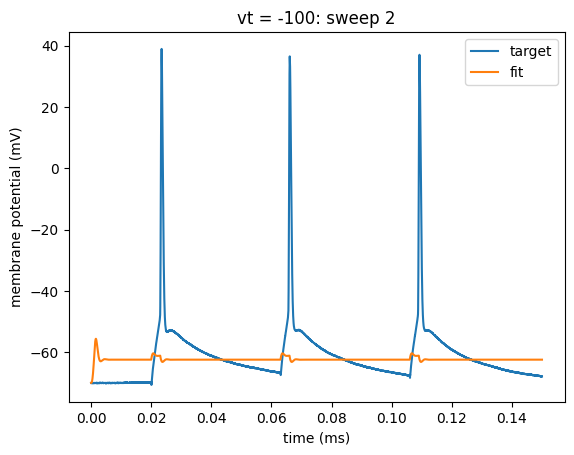

In [115]:
create_comparison_together(fastspikes_output_sliced[0], hh_16[0]*1000)
title('vt = -100: sweep 2')

In [116]:
hh_17 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, ek=-70, ena=68, vt=-50)

first fit:
Round 0: Best parameters g_kd=2.92148625 uS, g_na=3.65482358 uS, gl=14.51630707 nS (error: 103.60553145 mV^2)
Round 1: Best parameters g_kd=2.41006052 uS, g_na=3.25745337 uS, gl=12.48537605 nS (error: 97.16590382 mV^2)
Round 2: Best parameters g_kd=3.58218819 uS, g_na=2.28531194 uS, gl=11.49218669 nS (error: 94.502997 mV^2)
Round 3: Best parameters g_kd=3.21559734 uS, g_na=2.03973992 uS, gl=11.24276778 nS (error: 94.0650191 mV^2)
Round 4: Best parameters g_kd=3.58095267 uS, g_na=1.70736914 uS, gl=11.03152946 nS (error: 93.14231628 mV^2)
Round 5: Best parameters g_kd=3.71013883 uS, g_na=1.57335825 uS, gl=10.90630112 nS (error: 92.74705243 mV^2)
Round 6: Best parameters g_kd=3.84948048 uS, g_na=1.38092 uS, gl=10.56913424 nS (error: 92.11292886 mV^2)
Round 7: Best parameters g_kd=3.88423595 uS, g_na=1.23530081 uS, gl=10.61126097 nS (error: 91.71825483 mV^2)
Round 8: Best parameters g_kd=3.89416576 uS, g_na=1.21982786 uS, gl=10.39744218 nS (error: 91.47380083 mV^2)
Round 9: Best

Text(0.5, 1.0, 'vt = -50: sweep 2')

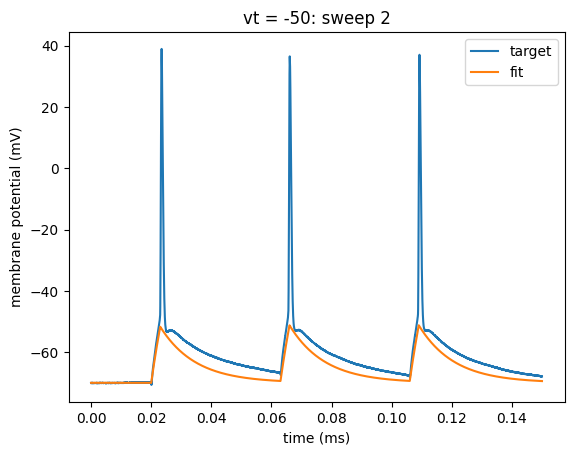

In [117]:
create_comparison_together(fastspikes_output_sliced[0], hh_17[0]*1000)
title('vt = -50: sweep 2')

In [118]:
hh_18 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, ek=-70, ena=68, vt=-60)

first fit:
Round 0: Best parameters g_kd=1.13200141 uS, g_na=4.18943135 uS, gl=16.61103937 nS (error: 129.36793965 mV^2)
Round 1: Best parameters g_kd=2.6563232 uS, g_na=2.95930243 uS, gl=13.66084647 nS (error: 116.92961063 mV^2)
Round 2: Best parameters g_kd=2.57009668 uS, g_na=2.20482833 uS, gl=20.01849352 nS (error: 116.23758485 mV^2)
Round 3: Best parameters g_kd=2.48298772 uS, g_na=1.83937203 uS, gl=12.08775499 nS (error: 110.68397966 mV^2)
Round 4: Best parameters g_kd=2.48298772 uS, g_na=1.83937203 uS, gl=12.08775499 nS (error: 110.68397966 mV^2)
Round 5: Best parameters g_kd=2.48298772 uS, g_na=1.83937203 uS, gl=12.08775499 nS (error: 110.68397966 mV^2)
Round 6: Best parameters g_kd=2.71535003 uS, g_na=1.84549644 uS, gl=12.07723055 nS (error: 110.60011733 mV^2)
Round 7: Best parameters g_kd=2.71535003 uS, g_na=1.84549644 uS, gl=12.07723055 nS (error: 110.60011733 mV^2)
Round 8: Best parameters g_kd=2.71535003 uS, g_na=1.84549644 uS, gl=12.07723055 nS (error: 110.60011733 mV^2)


Text(0.5, 1.0, 'vt = -60: sweep 2')

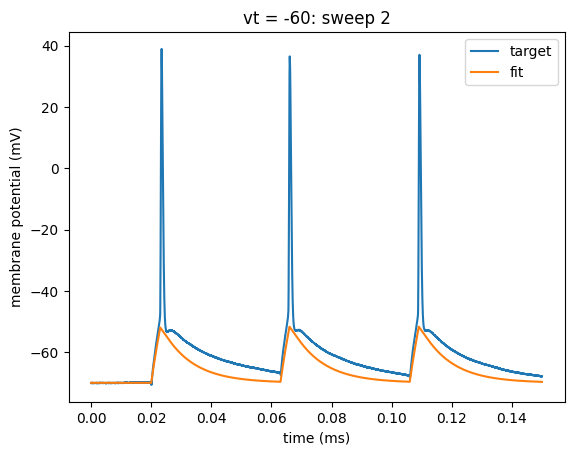

In [119]:
create_comparison_together(fastspikes_output_sliced[0], hh_18[0]*1000)
title('vt = -60: sweep 2')

In [120]:
hh_19 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, ek=-70, ena=68, vt=-80)

first fit:
Round 0: Best parameters g_kd=0.72359464 uS, g_na=3.49153217 uS, gl=18.97455981 nS (error: 573.24553846 mV^2)
Round 1: Best parameters g_kd=0.65884491 uS, g_na=2.5369957 uS, gl=35.82753072 nS (error: 521.31157073 mV^2)
Round 2: Best parameters g_kd=3.27459781 uS, g_na=2.0116448 uS, gl=23.34897508 nS (error: 475.09045604 mV^2)
Round 3: Best parameters g_kd=3.3465482 uS, g_na=1.64098945 uS, gl=16.46559764 nS (error: 394.21346661 mV^2)
Round 4: Best parameters g_kd=3.4739018 uS, g_na=1.52430322 uS, gl=35.90781856 nS (error: 374.35605208 mV^2)
Round 5: Best parameters g_kd=3.79636909 uS, g_na=1.29952788 uS, gl=27.95597418 nS (error: 338.11344506 mV^2)
Round 6: Best parameters g_kd=3.81651995 uS, g_na=1.27639988 uS, gl=34.15206907 nS (error: 323.45344342 mV^2)
Round 7: Best parameters g_kd=3.73044586 uS, g_na=1.17281935 uS, gl=37.35444653 nS (error: 305.24929042 mV^2)
Round 8: Best parameters g_kd=3.87219538 uS, g_na=1.12169545 uS, gl=36.87166655 nS (error: 291.91212495 mV^2)
Rou

Text(0.5, 1.0, 'vt = -80: sweep 2')

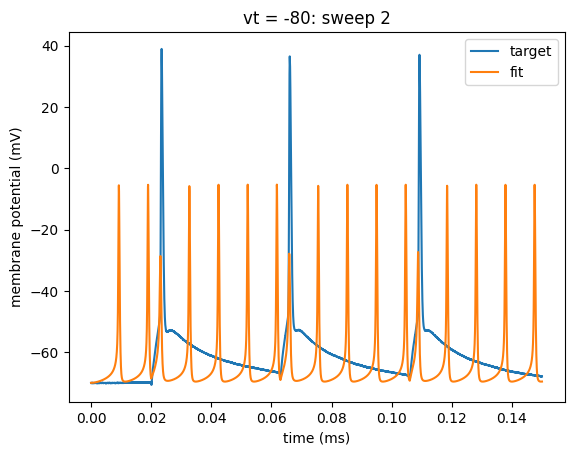

In [121]:
create_comparison_together(fastspikes_output_sliced[0], hh_19[0]*1000)
title('vt = -80: sweep 2')

In [122]:
hh_20 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, ek=-70, ena=68, vt=-70)

first fit:
Round 0: Best parameters g_kd=0.61310618 uS, g_na=4.09754571 uS, gl=15.97148859 nS (error: 134.19916954 mV^2)
Round 1: Best parameters g_kd=0.50740548 uS, g_na=3.34498429 uS, gl=15.72438409 nS (error: 117.89588076 mV^2)
Round 2: Best parameters g_kd=0.31656745 uS, g_na=2.12024271 uS, gl=18.93851279 nS (error: 83.15616984 mV^2)
Round 3: Best parameters g_kd=0.36023507 uS, g_na=2.30312427 uS, gl=15.88467991 nS (error: 82.8861197 mV^2)
Round 4: Best parameters g_kd=0.33508776 uS, g_na=1.71937296 uS, gl=13.83033076 nS (error: 65.50236713 mV^2)
Round 5: Best parameters g_kd=0.31840993 uS, g_na=1.67294657 uS, gl=13.57179291 nS (error: 57.68772946 mV^2)
Round 6: Best parameters g_kd=0.32642343 uS, g_na=1.39540694 uS, gl=12.63979809 nS (error: 56.51015212 mV^2)
Round 7: Best parameters g_kd=0.32106429 uS, g_na=1.40943107 uS, gl=11.42810159 nS (error: 46.85716586 mV^2)
Round 8: Best parameters g_kd=0.32106429 uS, g_na=1.40943107 uS, gl=11.42810159 nS (error: 46.85716586 mV^2)
Round 9

Text(0.5, 1.0, 'vt = -70: sweep 2')

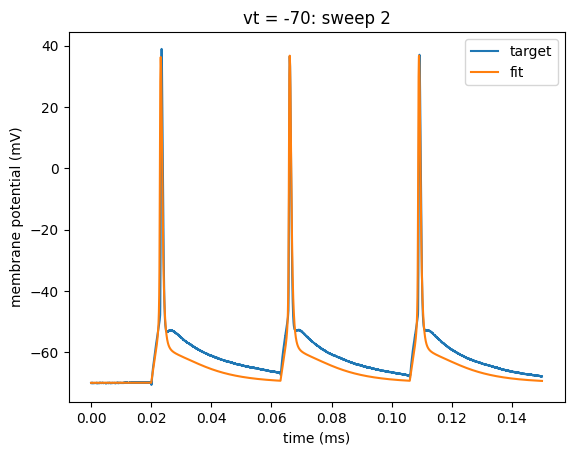

In [123]:
create_comparison_together(fastspikes_output_sliced[0], hh_20[0]*1000)
title('vt = -70: sweep 2')

In [124]:
hh_21 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, ek=-70, ena=68, vt=-75)

first fit:
Round 0: Best parameters g_kd=2.84573723 uS, g_na=3.52025917 uS, gl=27.79616591 nS (error: 320.8978049 mV^2)
Round 1: Best parameters g_kd=0.82400739 uS, g_na=2.74668406 uS, gl=34.5193559 nS (error: 184.50855692 mV^2)
Round 2: Best parameters g_kd=0.79605328 uS, g_na=2.63273141 uS, gl=35.27792421 nS (error: 180.88772665 mV^2)
Round 3: Best parameters g_kd=0.41083941 uS, g_na=2.12563733 uS, gl=37.57655704 nS (error: 147.29964788 mV^2)
Round 4: Best parameters g_kd=0.35443737 uS, g_na=1.74596211 uS, gl=36.98722912 nS (error: 131.18061263 mV^2)
Round 5: Best parameters g_kd=284.68290232 nS, g_na=1.48348407 uS, gl=37.65104152 nS (error: 113.02116875 mV^2)
Round 6: Best parameters g_kd=284.68290232 nS, g_na=1.48348407 uS, gl=37.65104152 nS (error: 113.02116875 mV^2)
Round 7: Best parameters g_kd=273.81527643 nS, g_na=1.33995998 uS, gl=38.60034688 nS (error: 111.14020863 mV^2)
Round 8: Best parameters g_kd=249.95086798 nS, g_na=1.26375662 uS, gl=38.83964639 nS (error: 104.51548585

Text(0.5, 1.0, 'vt = -75: sweep 2')

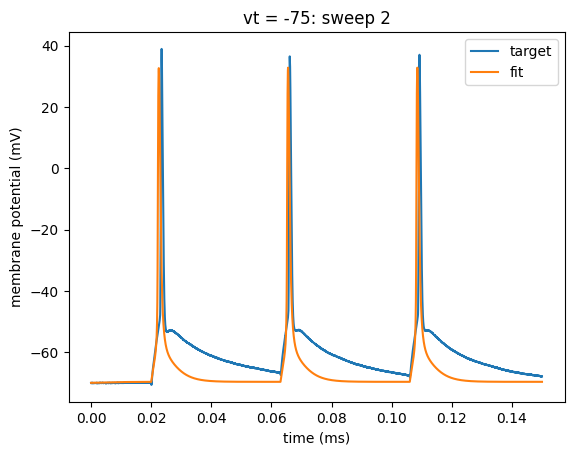

In [126]:
create_comparison_together(fastspikes_output_sliced[0], hh_21[0]*1000)
title('vt = -75: sweep 2')

In [125]:
hh_22 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, ek=-70, ena=68, vt=-65)

first fit:
Round 0: Best parameters g_kd=0.77249677 uS, g_na=5.03546467 uS, gl=14.10715326 nS (error: 138.96676178 mV^2)
Round 1: Best parameters g_kd=0.53612014 uS, g_na=6.12212726 uS, gl=11.96039135 nS (error: 103.92216378 mV^2)
Round 2: Best parameters g_kd=0.46219559 uS, g_na=4.78355773 uS, gl=11.18457708 nS (error: 93.79105585 mV^2)
Round 3: Best parameters g_kd=0.3382093 uS, g_na=3.50897913 uS, gl=11.012267 nS (error: 72.35093061 mV^2)
Round 4: Best parameters g_kd=0.3382093 uS, g_na=3.50897913 uS, gl=11.012267 nS (error: 72.35093061 mV^2)
Round 5: Best parameters g_kd=0.41774956 uS, g_na=5.16546295 uS, gl=11.1770244 nS (error: 67.95674036 mV^2)
Round 6: Best parameters g_kd=0.41774956 uS, g_na=5.16546295 uS, gl=11.1770244 nS (error: 67.95674036 mV^2)
Round 7: Best parameters g_kd=0.35257351 uS, g_na=3.81243472 uS, gl=10.88183357 nS (error: 67.52761316 mV^2)
Round 8: Best parameters g_kd=0.35257351 uS, g_na=3.81243472 uS, gl=10.88183357 nS (error: 67.52761316 mV^2)
Round 9: Best 

Text(0.5, 1.0, 'vt = -65: sweep 2')

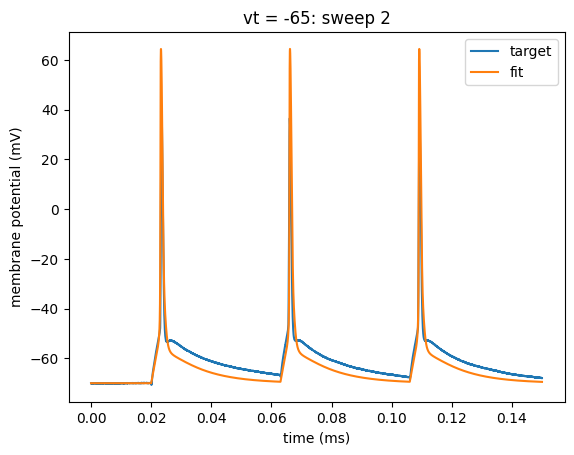

In [127]:
create_comparison_together(fastspikes_output_sliced[0], hh_22[0]*1000)
title('vt = -65: sweep 2')

Text(0.5, 1.0, 'Comparisons for HH between vt: sweep 2')

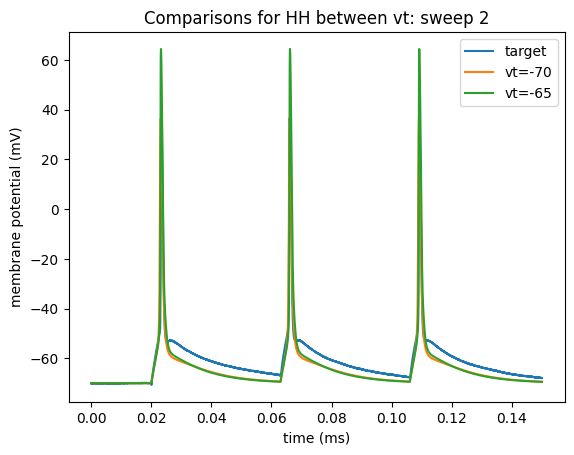

In [128]:
create_comparison_together_three(fastspikes_output_sliced[0], hh_20[0]*1000, hh_22[0]*1000,
                                 d2_title='vt=-70', d3_title='vt=-65')
title('Comparisons for HH between vt: sweep 2')

Text(0.5, 1.0, 'Comparisons for HH between vt: sweep 3')

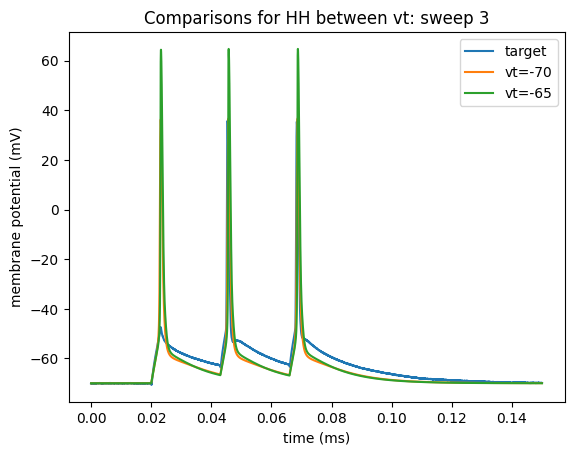

In [129]:
create_comparison_together_three(fastspikes_output_sliced[1], hh_20[1]*1000, hh_22[1]*1000,
                                 d2_title='vt=-70', d3_title='vt=-65')
title('Comparisons for HH between vt: sweep 3')

-65 over-reaches...

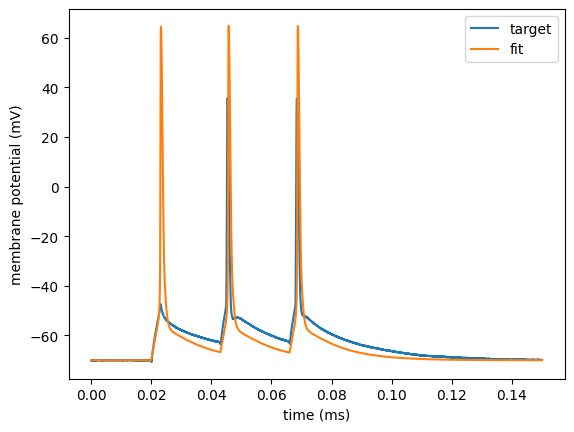

In [133]:
create_comparison_together(fastspikes_output_sliced[1], hh_22[1]*1000)

vt =-70...

so hh_20 best fit?

Text(0.5, 1.0, 'Possible best fit for HH: sweep 3')

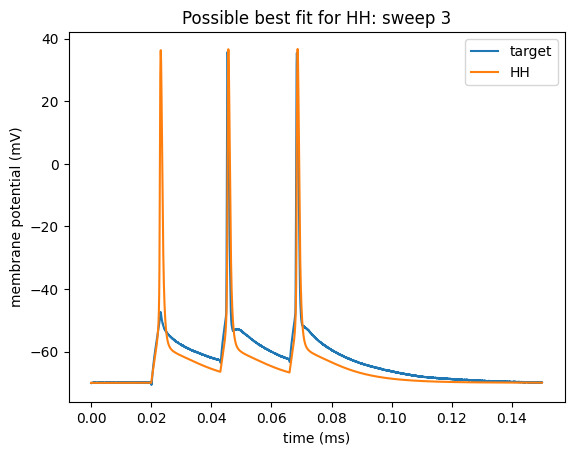

In [135]:
create_comparison_together(fastspikes_output_sliced[1], hh_20[1]*1000, d2_title='HH')
title('Possible best fit for HH: sweep 3')

# hh_20 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, ek=-70, ena=68, vt=-70)

Text(0.5, 1.0, 'Possible best fit for HH: sweep 4')

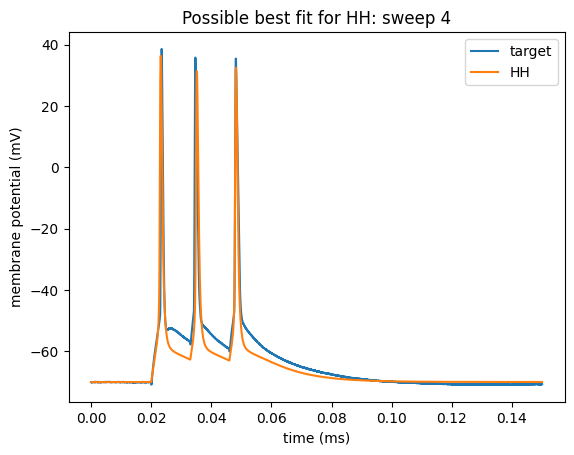

In [136]:
create_comparison_together(fastspikes_output_sliced[2], hh_20[2]*1000, d2_title='HH')
title('Possible best fit for HH: sweep 4')


Text(0.5, 1.0, 'Possible best fit for HH: sweep 5')

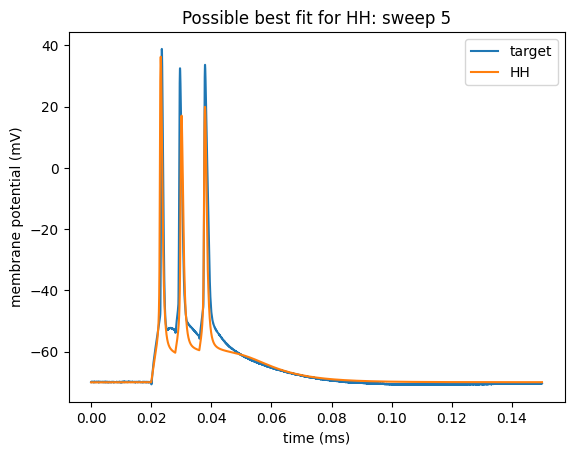

In [137]:
create_comparison_together(fastspikes_output_sliced[3], hh_20[3]*1000, d2_title='HH')
title('Possible best fit for HH: sweep 5')


In [139]:
# attempt diff ek...
# -80 (from -70)

hh_23 = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, ek=-80, ena=68, vt=-70)

first fit:
Round 0: Best parameters g_kd=0.5685713 uS, g_na=10.38657016 uS, gl=15.11910653 nS (error: 191.08073633 mV^2)
Round 1: Best parameters g_kd=0.34972901 uS, g_na=5.33121505 uS, gl=16.4728841 nS (error: 138.38300164 mV^2)
Round 2: Best parameters g_kd=297.28262294 nS, g_na=3.56865245 uS, gl=15.53203396 nS (error: 122.64968053 mV^2)
Round 3: Best parameters g_kd=255.85446911 nS, g_na=2.91701558 uS, gl=13.3017432 nS (error: 109.09885423 mV^2)
Round 4: Best parameters g_kd=236.17870949 nS, g_na=2.28961442 uS, gl=12.22440508 nS (error: 78.20070439 mV^2)
Round 5: Best parameters g_kd=236.17870949 nS, g_na=2.28961442 uS, gl=12.22440508 nS (error: 78.20070439 mV^2)
Round 6: Best parameters g_kd=236.17870949 nS, g_na=2.28961442 uS, gl=12.22440508 nS (error: 78.20070439 mV^2)
Round 7: Best parameters g_kd=236.17870949 nS, g_na=2.28961442 uS, gl=12.22440508 nS (error: 78.20070439 mV^2)
Round 8: Best parameters g_kd=236.17870949 nS, g_na=2.28961442 uS, gl=12.22440508 nS (error: 78.2007043

Text(0.5, 1.0, 'Sweep 2')

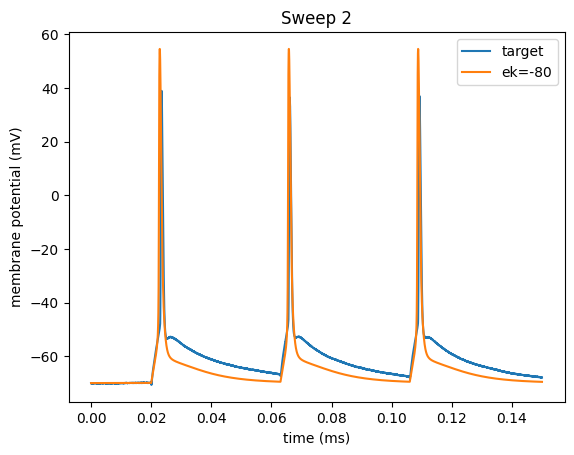

In [140]:
create_comparison_together(fastspikes_output_sliced[0], hh_23[0]*1000, d2_title='ek=-80')
title('Sweep 2')


***

### LIF

In [141]:
lif_3 = run_lif(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120)

first fit:
Round 0: Best parameters R=189.0094721 Mohm, tau=22.1505254 ms (error: 93.86254128 mV^2)
Round 1: Best parameters R=189.0094721 Mohm, tau=22.1505254 ms (error: 93.86254128 mV^2)
Round 2: Best parameters R=189.0094721 Mohm, tau=22.1505254 ms (error: 93.86254128 mV^2)
Round 3: Best parameters R=189.0094721 Mohm, tau=22.1505254 ms (error: 93.86254128 mV^2)
Round 4: Best parameters R=189.0094721 Mohm, tau=22.1505254 ms (error: 93.86254128 mV^2)
Round 5: Best parameters R=164.21103285 Mohm, tau=15.84392141 ms (error: 93.85520772 mV^2)
Round 6: Best parameters R=164.21103285 Mohm, tau=15.84392141 ms (error: 93.85520772 mV^2)
Round 7: Best parameters R=164.21103285 Mohm, tau=15.84392141 ms (error: 93.85520772 mV^2)
Round 8: Best parameters R=164.21103285 Mohm, tau=15.84392141 ms (error: 93.85520772 mV^2)
Round 9: Best parameters R=168.77955334 Mohm, tau=16.45479131 ms (error: 93.81804163 mV^2)


Text(0.5, 1.0, 'Sweep 2')

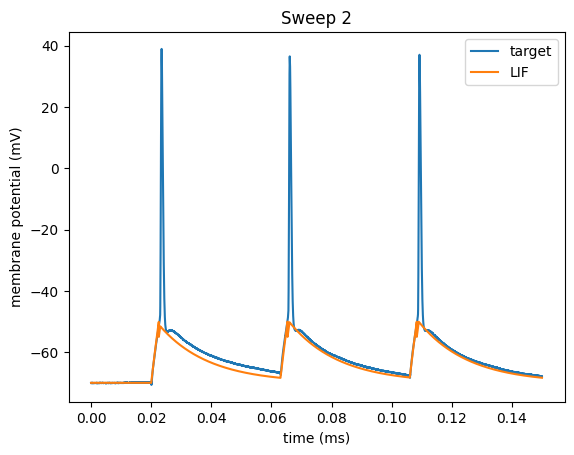

In [143]:
create_comparison_together(fastspikes_output_sliced[0], lif_3[0]*1000, d2_title='LIF')
title('Sweep 2')

Text(0.5, 1.0, 'Sweep 3')

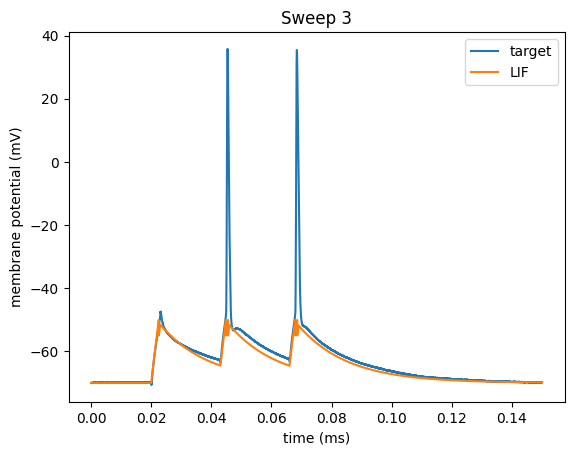

In [144]:
create_comparison_together(fastspikes_output_sliced[1], lif_3[1]*1000, d2_title='LIF')
title('Sweep 3')

(-70.0, -40.0)

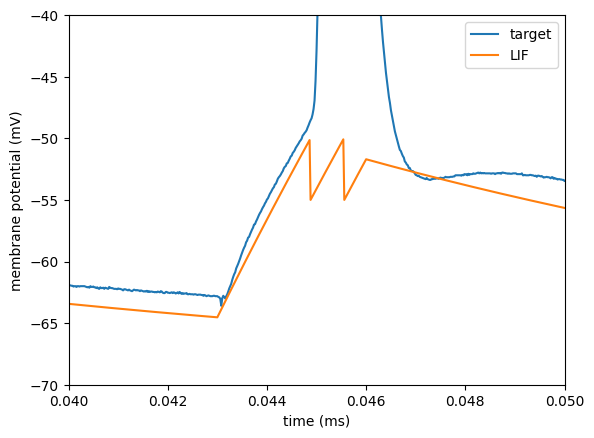

In [145]:
create_comparison_together(fastspikes_output_sliced[1], lif_3[1]*1000, d2_title='LIF')
xlim(0.04, 0.05)
ylim(-70, -40)

Text(0.5, 1.0, 'Sweep 3')

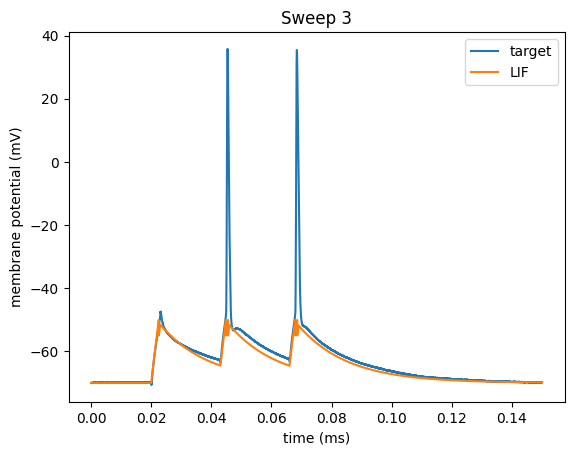

In [147]:
create_comparison_together(fastspikes_output_sliced[1], lif_3[1]*1000, d2_title='LIF')
title('Sweep 3')

Text(0.5, 1.0, 'Sweep 4')

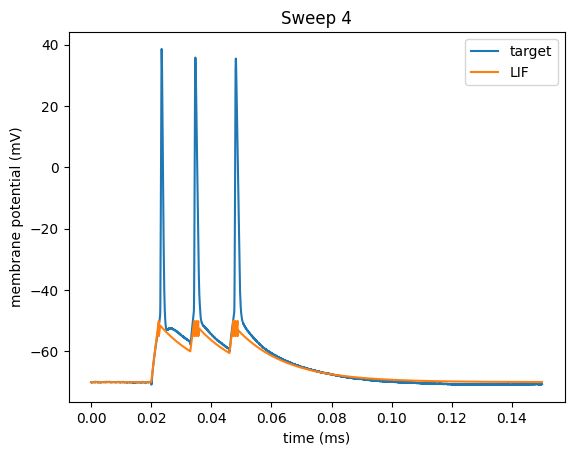

In [148]:
create_comparison_together(fastspikes_output_sliced[2], lif_3[2]*1000, d2_title='LIF')
title('Sweep 4')

Text(0.5, 1.0, 'Sweep 5')

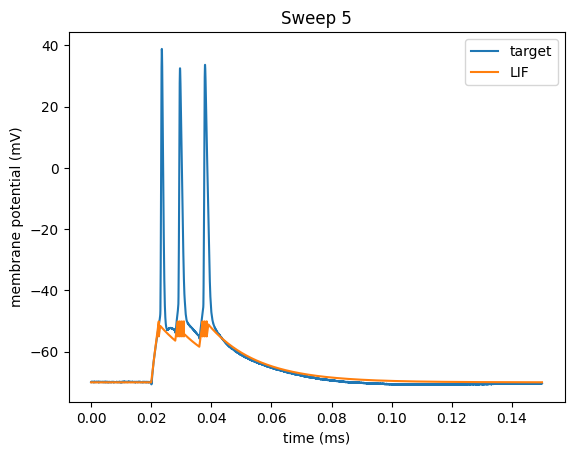

In [149]:
create_comparison_together(fastspikes_output_sliced[3], lif_3[3]*1000, d2_title='LIF')
title('Sweep 5')

Oscillations for each spike

In [150]:
lif_4 = run_lif(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, reset_var='v=-50*mV', thresh_var='v>-40*mV')

first fit:
Round 0: Best parameters R=161.28799335 Mohm, tau=13.30728902 ms (error: 74.35093867 mV^2)
Round 1: Best parameters R=170.28263423 Mohm, tau=13.23672233 ms (error: 73.34475126 mV^2)
Round 2: Best parameters R=170.28263423 Mohm, tau=13.23672233 ms (error: 73.34475126 mV^2)
Round 3: Best parameters R=170.28263423 Mohm, tau=13.23672233 ms (error: 73.34475126 mV^2)
Round 4: Best parameters R=164.78007894 Mohm, tau=12.58451137 ms (error: 73.09987227 mV^2)
Round 5: Best parameters R=164.06149675 Mohm, tau=12.51842751 ms (error: 73.06511402 mV^2)
Round 6: Best parameters R=164.06149675 Mohm, tau=12.51842751 ms (error: 73.06511402 mV^2)
Round 7: Best parameters R=164.06149675 Mohm, tau=12.51842751 ms (error: 73.06511402 mV^2)
Round 8: Best parameters R=164.06149675 Mohm, tau=12.51842751 ms (error: 73.06511402 mV^2)
Round 9: Best parameters R=164.06149675 Mohm, tau=12.51842751 ms (error: 73.06511402 mV^2)


Text(0.5, 1.0, 'thresh > -40: Sweep 2')

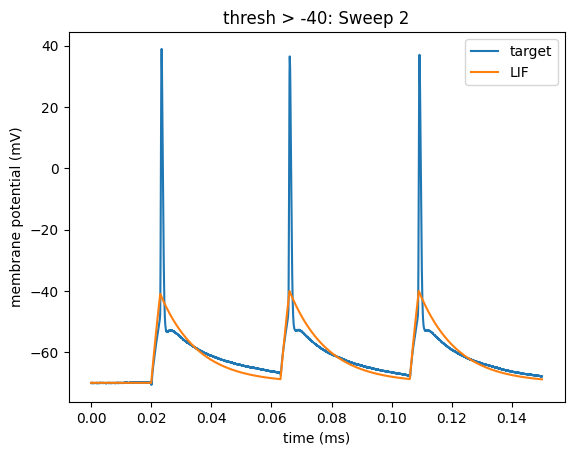

In [152]:
create_comparison_together(fastspikes_output_sliced[0], lif_4[0]*1000, d2_title='LIF')
title('thresh > -40: Sweep 2')

Text(0.5, 1.0, 'thresh > -40: Sweep 3')

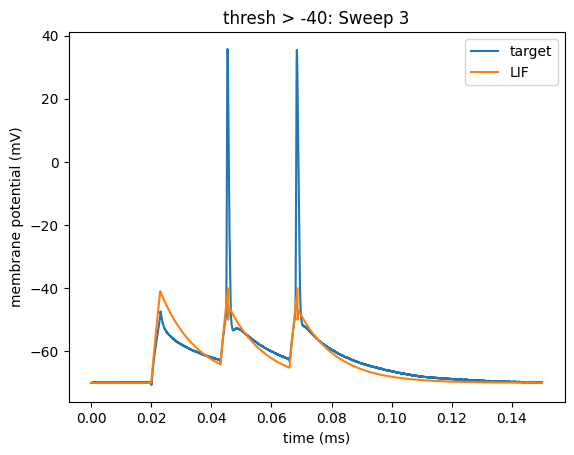

In [153]:
create_comparison_together(fastspikes_output_sliced[1], lif_4[1]*1000, d2_title='LIF')
title('thresh > -40: Sweep 3')

(-70.0, -40.0)

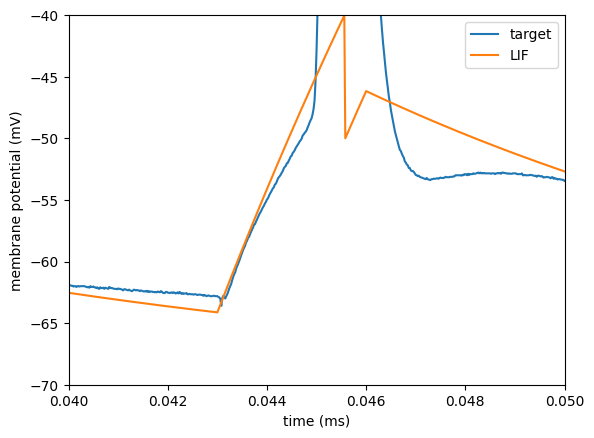

In [154]:
create_comparison_together(fastspikes_output_sliced[1], lif_4[1]*1000, d2_title='LIF')
xlim(0.04, 0.05)
ylim(-70, -40)

Text(0.5, 1.0, 'thresh > -40: Sweep 4')

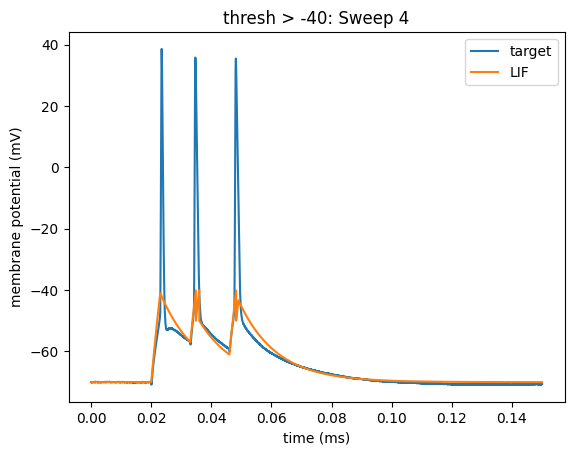

In [155]:
create_comparison_together(fastspikes_output_sliced[2], lif_4[2]*1000, d2_title='LIF')
title('thresh > -40: Sweep 4')

Text(0.5, 1.0, 'thresh > -40: Sweep 5')

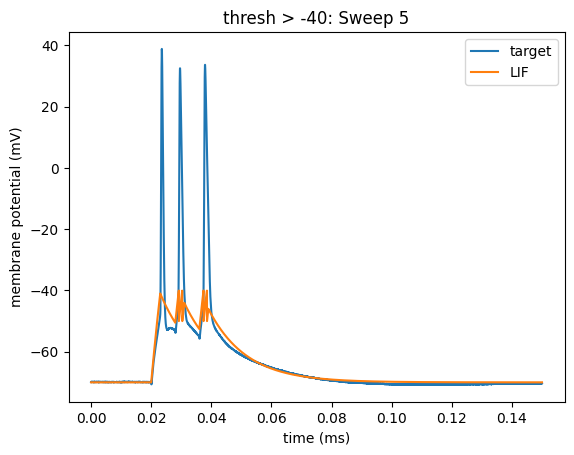

In [156]:
create_comparison_together(fastspikes_output_sliced[3], lif_4[3]*1000, d2_title='LIF')
title('thresh > -40: Sweep 5')

Fits first... need individual adjustments...

In [ ]:
lif_5 = run_lif(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, reset_var='v=-53*mV', thresh_var='v>-20*mV')

first fit:
Round 0: Best parameters R=168.40401857 Mohm, tau=13.74006612 ms (error: 73.97513893 mV^2)
Round 1: Best parameters R=167.78910391 Mohm, tau=12.11612697 ms (error: 73.53142433 mV^2)
Round 2: Best parameters R=151.37606856 Mohm, tau=11.38859487 ms (error: 70.2893047 mV^2)
Round 3: Best parameters R=206.00416065 Mohm, tau=11.85025315 ms (error: 69.89125933 mV^2)
Round 4: Best parameters R=197.72488309 Mohm, tau=11.3634792 ms (error: 67.86837223 mV^2)
Round 5: Best parameters R=197.72488309 Mohm, tau=11.3634792 ms (error: 67.86837223 mV^2)
Round 6: Best parameters R=197.72488309 Mohm, tau=11.3634792 ms (error: 67.86837223 mV^2)
Round 7: Best parameters R=190.82305329 Mohm, tau=10.69716262 ms (error: 66.71398967 mV^2)
Round 8: Best parameters R=190.82305329 Mohm, tau=10.69716262 ms (error: 66.71398967 mV^2)
Round 9: Best parameters R=190.82305329 Mohm, tau=10.69716262 ms (error: 66.71398967 mV^2)


Text(0.5, 1.0, 'thresh > -20: Sweep 2')

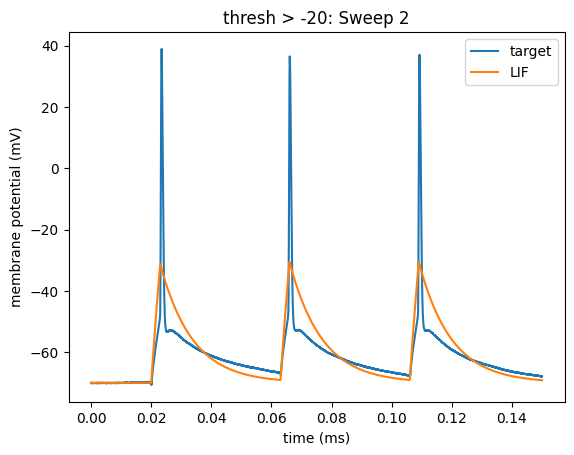

In [159]:
create_comparison_together(fastspikes_output_sliced[0], lif_5[0]*1000, d2_title='LIF')
title('thresh > -20: Sweep 2')

Text(0.5, 1.0, 'thresh > -20: Sweep 3')

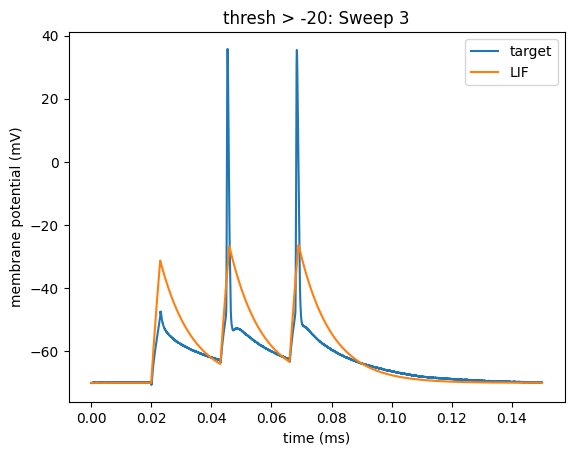

In [160]:
create_comparison_together(fastspikes_output_sliced[1], lif_5[1]*1000, d2_title='LIF')
title('thresh > -20: Sweep 3')

Text(0.5, 1.0, 'thresh > -20: Sweep 4')

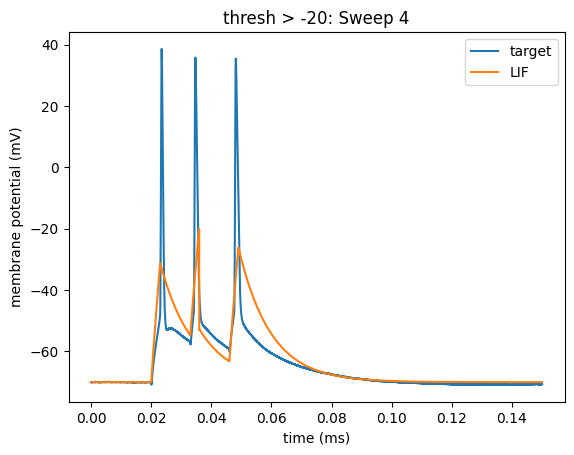

In [161]:
create_comparison_together(fastspikes_output_sliced[2], lif_5[2]*1000, d2_title='LIF')
title('thresh > -20: Sweep 4')

Text(0.5, 1.0, 'thresh > -20: Sweep 5')

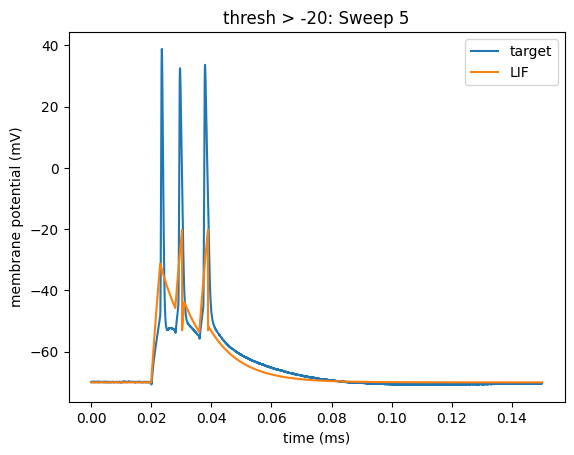

In [162]:
create_comparison_together(fastspikes_output_sliced[3], lif_5[3]*1000, d2_title='LIF')
title('thresh > -20: Sweep 5')

(-65.0, -10.0)

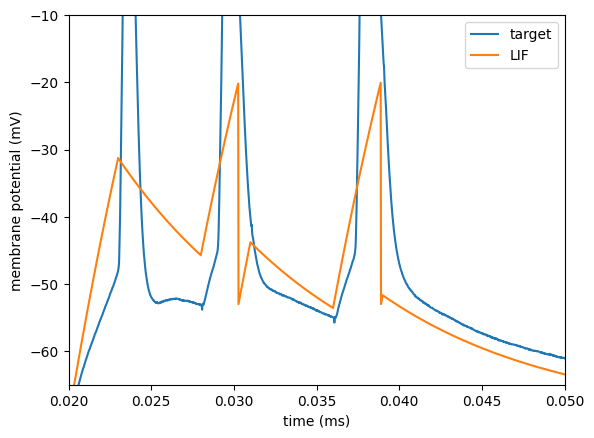

In [163]:
create_comparison_together(fastspikes_output_sliced[3], lif_5[3]*1000, d2_title='LIF')
xlim(0.02, 0.05)
ylim(-65, -10)

In [158]:
lif_6 = run_lif(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, reset_var='v=-53*mV', thresh_var='v>20*mV')

first fit:
Round 0: Best parameters R=154.12283346 Mohm, tau=14.4445483 ms (error: 81.51274419 mV^2)
Round 1: Best parameters R=137.32850265 Mohm, tau=11.70016789 ms (error: 75.9865448 mV^2)
Round 2: Best parameters R=149.33864783 Mohm, tau=11.17847234 ms (error: 75.17056234 mV^2)
Round 3: Best parameters R=141.88280179 Mohm, tau=10.90775244 ms (error: 74.22319241 mV^2)
Round 4: Best parameters R=139.47600212 Mohm, tau=10.59914074 ms (error: 73.62914756 mV^2)
Round 5: Best parameters R=137.61610868 Mohm, tau=10.42072366 ms (error: 73.31672405 mV^2)
Round 6: Best parameters R=138.59632302 Mohm, tau=10.33360453 ms (error: 73.13337256 mV^2)
Round 7: Best parameters R=136.44196962 Mohm, tau=10.23689984 ms (error: 72.99585931 mV^2)
Round 8: Best parameters R=138.59632302 Mohm, tau=10.1622173 ms (error: 72.81578463 mV^2)
Round 9: Best parameters R=139.70114004 Mohm, tau=10.13883443 ms (error: 72.78357653 mV^2)


Text(0.5, 1.0, 'thresh > 20: Sweep 2')

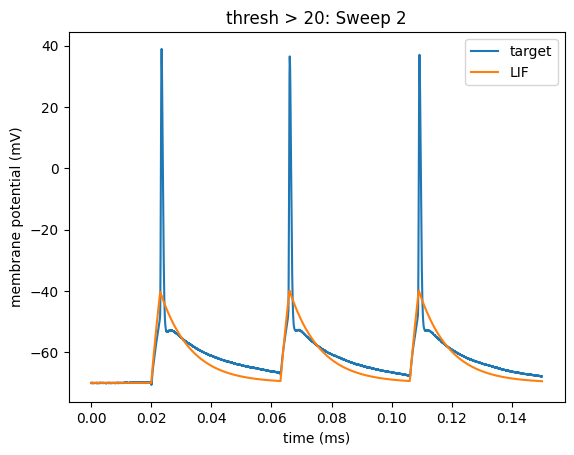

In [164]:
create_comparison_together(fastspikes_output_sliced[0], lif_6[0]*1000, d2_title='LIF')
title('thresh > 20: Sweep 2')

Text(0.5, 1.0, 'thresh > 20: Sweep 3')

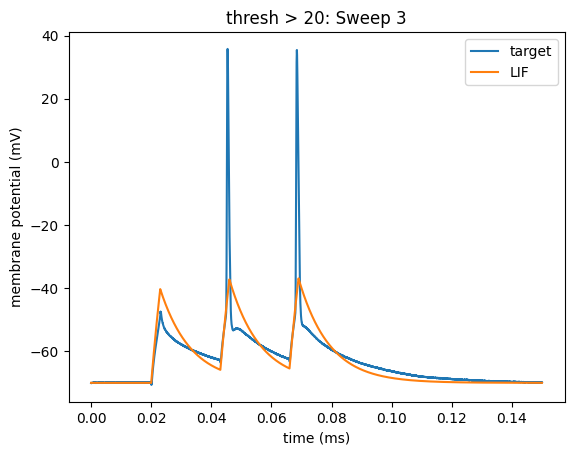

In [165]:
create_comparison_together(fastspikes_output_sliced[1], lif_6[1]*1000, d2_title='LIF')
title('thresh > 20: Sweep 3')

Text(0.5, 1.0, 'thresh > 20: Sweep 4')

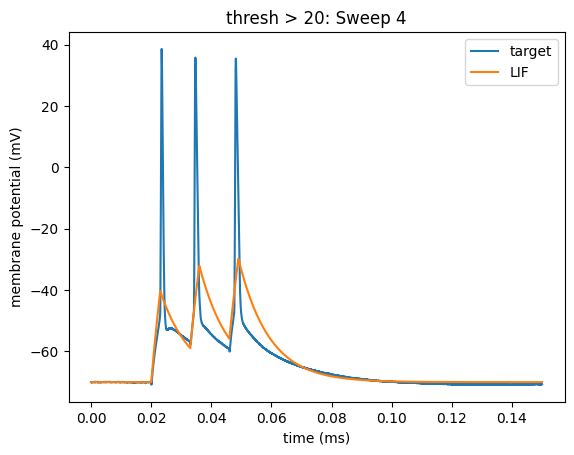

In [166]:
create_comparison_together(fastspikes_output_sliced[2], lif_6[2]*1000, d2_title='LIF')
title('thresh > 20: Sweep 4')

Text(0.5, 1.0, 'thresh > 20: Sweep 5')

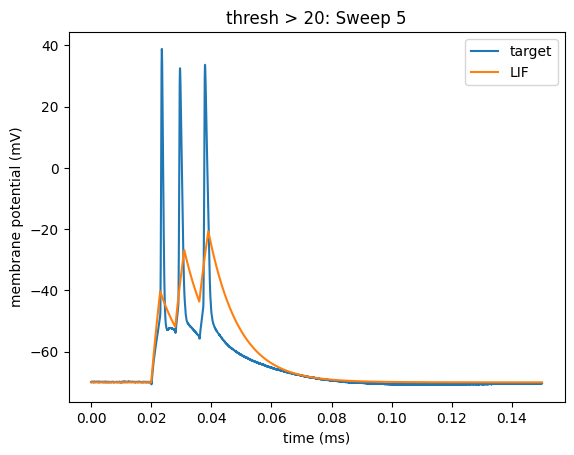

In [167]:
create_comparison_together(fastspikes_output_sliced[3], lif_6[3]*1000, d2_title='LIF')
title('thresh > 20: Sweep 5')

In [168]:
lif_7 = run_lif(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, reset_var='v=-52*mV', thresh_var='v>40*mV')

first fit:
Round 0: Best parameters R=150.06987179 Mohm, tau=13.13135989 ms (error: 78.74524999 mV^2)
Round 1: Best parameters R=138.6583788 Mohm, tau=11.69804966 ms (error: 75.88948449 mV^2)
Round 2: Best parameters R=145.15401506 Mohm, tau=11.15950909 ms (error: 74.79592082 mV^2)
Round 3: Best parameters R=138.4313765 Mohm, tau=10.71895551 ms (error: 73.87946928 mV^2)
Round 4: Best parameters R=134.33785035 Mohm, tau=10.4321329 ms (error: 73.50796158 mV^2)
Round 5: Best parameters R=139.72931894 Mohm, tau=10.41629805 ms (error: 73.28580556 mV^2)
Round 6: Best parameters R=138.4313765 Mohm, tau=10.30989588 ms (error: 73.090298 mV^2)
Round 7: Best parameters R=139.1897089 Mohm, tau=10.23144089 ms (error: 72.94378045 mV^2)
Round 8: Best parameters R=138.68629328 Mohm, tau=10.17731746 ms (error: 72.843426 mV^2)
Round 9: Best parameters R=138.63297564 Mohm, tau=10.12344369 ms (error: 72.74517726 mV^2)


Text(0.5, 1.0, 'thresh > 40: Sweep 2')

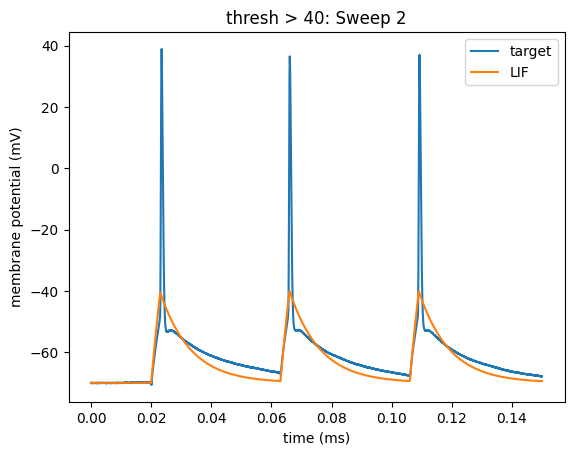

In [169]:
create_comparison_together(fastspikes_output_sliced[0], lif_7[0]*1000, d2_title='LIF')
title('thresh > 40: Sweep 2')

Text(0.5, 1.0, 'thresh > 40: Sweep 3')

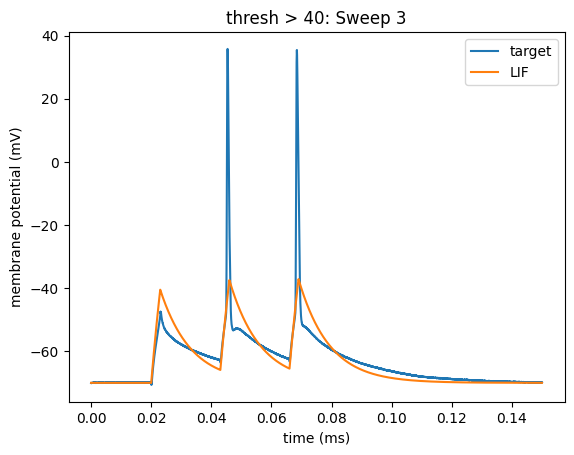

In [170]:
create_comparison_together(fastspikes_output_sliced[1], lif_7[1]*1000, d2_title='LIF')
title('thresh > 40: Sweep 3')

Text(0.5, 1.0, 'thresh > 40: Sweep 4')

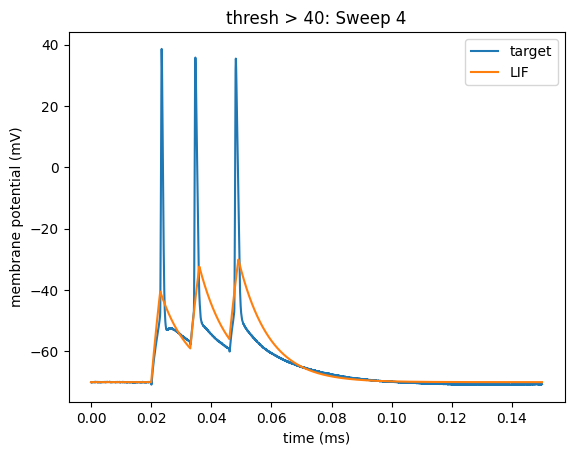

In [171]:
create_comparison_together(fastspikes_output_sliced[2], lif_7[2]*1000, d2_title='LIF')
title('thresh > 40: Sweep 4')

Text(0.5, 1.0, 'thresh > 40: Sweep 5')

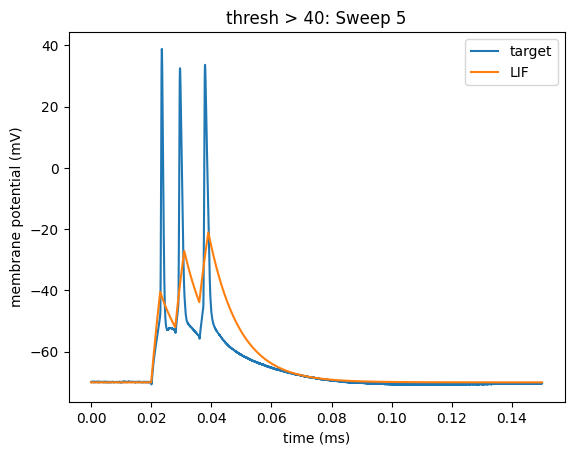

In [172]:
create_comparison_together(fastspikes_output_sliced[3], lif_7[3]*1000, d2_title='LIF')
title('thresh > 40: Sweep 5')

***

# hh_20/ lif_7 best fit so far...

***

In [173]:
adex_3 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced)

first fit:
Round 0: Best parameters a=3.11815006 nS, b=65.228086 pA, tauw=132.54138986 ms (error: 130.53875244 mV^2)
Round 1: Best parameters a=1.79100952 nS, b=39.67678519 pA, tauw=139.95893589 ms (error: 111.31281274 mV^2)
Round 2: Best parameters a=1.95705295 nS, b=26.20299755 pA, tauw=135.22324926 ms (error: 105.58125129 mV^2)
Round 3: Best parameters a=1.35234727 nS, b=18.88547368 pA, tauw=141.88541924 ms (error: 103.35125245 mV^2)
Round 4: Best parameters a=2.07242113 nS, b=12.74400111 pA, tauw=142.89426637 ms (error: 102.39831486 mV^2)
Round 5: Best parameters a=2.65339779 nS, b=8.05821144 pA, tauw=154.80779974 ms (error: 101.99227238 mV^2)
Round 6: Best parameters a=1.84215457 nS, b=6.23278821 pA, tauw=125.74875042 ms (error: 101.82779644 mV^2)
Round 7: Best parameters a=2.13156232 nS, b=5.11699982 pA, tauw=121.95903678 ms (error: 101.77123876 mV^2)
Round 8: Best parameters a=2.27674574 nS, b=4.8463985 pA, tauw=123.29739092 ms (error: 101.76179554 mV^2)
Round 9: Best parameters

Text(0.5, 1.0, 'Sweep 2')

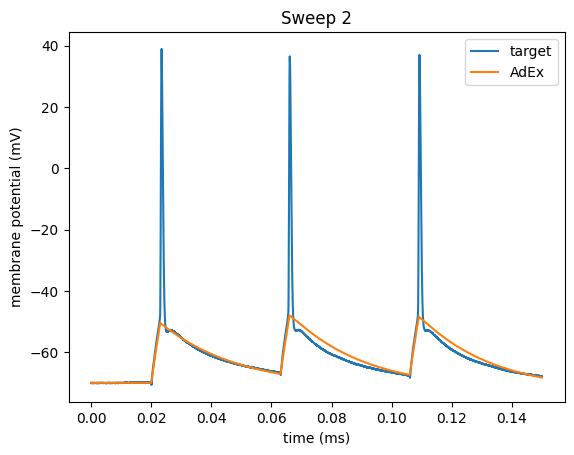

In [174]:
create_comparison_together(fastspikes_output_sliced[0], adex_3[0]*1000, d2_title='AdEx')
title('Sweep 2')

Text(0.5, 1.0, 'Sweep 3')

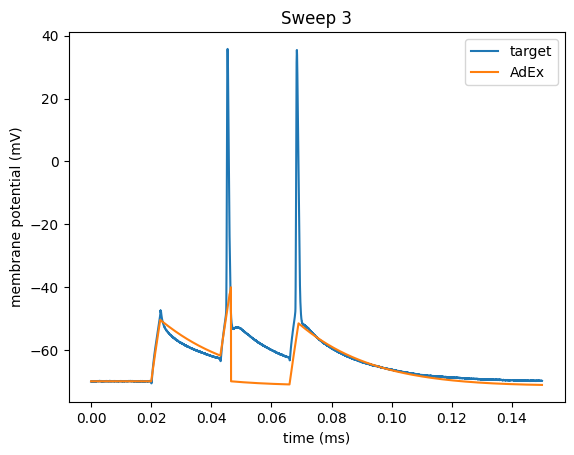

In [175]:
create_comparison_together(fastspikes_output_sliced[1], adex_3[1]*1000, d2_title='AdEx')
title('Sweep 3')

Text(0.5, 1.0, 'Sweep 4')

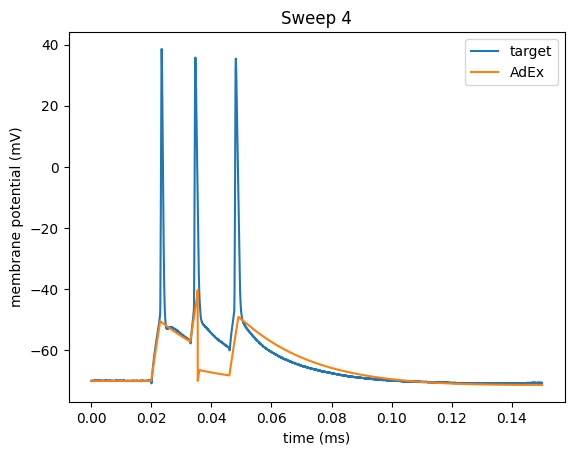

In [176]:
create_comparison_together(fastspikes_output_sliced[2], adex_3[2]*1000, d2_title='AdEx')
title('Sweep 4')

In [177]:
create_comparison_together(fastspikes_output_sliced[3], adex_3[3]*1000, d2_title='AdEx')
title('Sweep 5')

Text(0.5, 1.0, 'Sweep 5')

Sweep 2 ok...

In [178]:
adex_4 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, vr=-50)

first fit:
Round 0: Best parameters a=2.48932157 nS, b=58.52876531 pA, tauw=125.04919289 ms (error: 156.4539221 mV^2)
Round 1: Best parameters a=1.79320562 nS, b=28.5772365 pA, tauw=124.56621178 ms (error: 95.49244642 mV^2)
Round 2: Best parameters a=1.80220672 nS, b=19.55360488 pA, tauw=124.42393552 ms (error: 88.40529335 mV^2)
Round 3: Best parameters a=1.31504464 nS, b=13.19817896 pA, tauw=124.23033561 ms (error: 86.31102443 mV^2)
Round 4: Best parameters a=1.39457892 nS, b=8.61432581 pA, tauw=155.4516219 ms (error: 83.56686205 mV^2)
Round 5: Best parameters a=1.19281804 nS, b=5.95349017 pA, tauw=123.56148569 ms (error: 81.62074997 mV^2)
Round 6: Best parameters a=1.13130947 nS, b=5.01792832 pA, tauw=126.4898358 ms (error: 81.29865004 mV^2)
Round 7: Best parameters a=1.12940483 nS, b=3.47821348 pA, tauw=123.70581447 ms (error: 81.12259213 mV^2)
Round 8: Best parameters a=1.2428144 nS, b=3.00437924 pA, tauw=121.84263677 ms (error: 81.11208252 mV^2)
Round 9: Best parameters a=1.438223

In [179]:
create_comparison_together(fastspikes_output_sliced[0], adex_4[0]*1000, d2_title='AdEx')
title('vr=-50: Sweep 2')

Text(0.5, 1.0, 'vr=-50: Sweep 2')

Text(0.5, 1.0, 'vr=-50: Sweep 3')

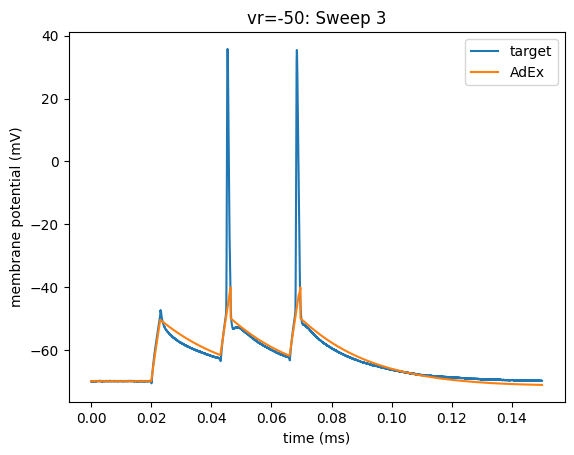

In [180]:
create_comparison_together(fastspikes_output_sliced[1], adex_4[1]*1000, d2_title='AdEx')
title('vr=-50: Sweep 3')

In [181]:
create_comparison_together(fastspikes_output_sliced[2], adex_4[2]*1000, d2_title='AdEx')
title('vr=-50: Sweep 4')

Text(0.5, 1.0, 'vr=-50: Sweep 4')

In [182]:
create_comparison_together(fastspikes_output_sliced[3], adex_4[3]*1000, d2_title='AdEx')
title('vr=-50: Sweep 5')

Text(0.5, 1.0, 'vr=-50: Sweep 5')

In [184]:
# vt = -40
adex_5 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, vt_var=-40, vr=-50)

first fit:
Round 0: Best parameters a=1.79977049 nS, b=63.78961712 pA, tauw=143.98350529 ms (error: 95.97417379 mV^2)
Round 1: Best parameters a=2.07296468 nS, b=36.12066558 pA, tauw=132.72389688 ms (error: 86.63873366 mV^2)
Round 2: Best parameters a=1.91762743 nS, b=19.38734328 pA, tauw=151.07876996 ms (error: 84.55474321 mV^2)
Round 3: Best parameters a=2.32584566 nS, b=16.10383936 pA, tauw=130.45298367 ms (error: 84.05266554 mV^2)
Round 4: Best parameters a=2.96285257 nS, b=12.35303093 pA, tauw=123.97448704 ms (error: 83.88575051 mV^2)
Round 5: Best parameters a=2.86174525 nS, b=11.82707389 pA, tauw=122.56072132 ms (error: 83.81924457 mV^2)
Round 6: Best parameters a=2.86174525 nS, b=11.82707389 pA, tauw=122.56072132 ms (error: 83.81924457 mV^2)
Round 7: Best parameters a=2.69348511 nS, b=8.61084696 pA, tauw=122.2466124 ms (error: 83.69944705 mV^2)
Round 8: Best parameters a=2.69348511 nS, b=8.61084696 pA, tauw=122.2466124 ms (error: 83.69944705 mV^2)
Round 9: Best parameters a=2.6

In [185]:
create_comparison_together(fastspikes_output_sliced[0], adex_5[0]*1000, d2_title='AdEx')
title('vt=-40: Sweep 2')

Text(0.5, 1.0, 'vt=-40: Sweep 2')

In [186]:
create_comparison_together(fastspikes_output_sliced[1], adex_5[1]*1000, d2_title='AdEx')
title('vt=-40: Sweep 3')

Text(0.5, 1.0, 'vt=-40: Sweep 3')

Text(0.5, 1.0, 'vt=-40: Sweep 4')

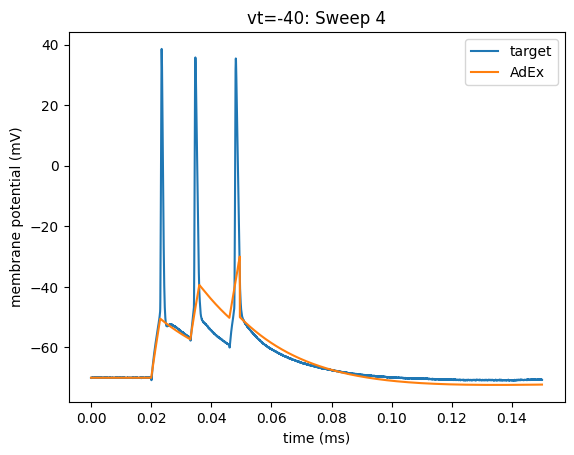

In [187]:
create_comparison_together(fastspikes_output_sliced[2], adex_5[2]*1000, d2_title='AdEx')
title('vt=-40: Sweep 4')

Text(0.5, 1.0, 'vt=-40: Sweep 5')

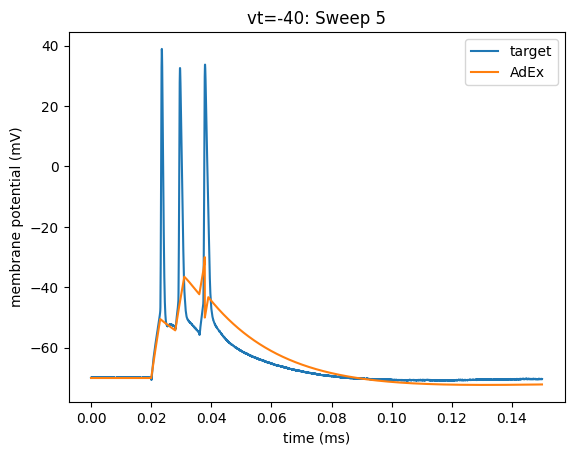

In [188]:
create_comparison_together(fastspikes_output_sliced[3], adex_5[3]*1000, d2_title='AdEx')
title('vt=-40: Sweep 5')

In [190]:
# vt = -60
adex_6 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, vt_var=-60, vr=-50)

first fit:
Round 0: Best parameters a=3.09456301 nS, b=99.86264401 pA, tauw=130.93182194 ms (error: 0.0155938 V^2)
Round 1: Best parameters a=3.69178229 nS, b=51.93359232 pA, tauw=125.800629 ms (error: 0.01439049 V^2)
Round 2: Best parameters a=3.64672007 nS, b=44.81677091 pA, tauw=123.33813946 ms (error: 0.01377751 V^2)
Round 3: Best parameters a=3.74314451 nS, b=25.79351059 pA, tauw=122.36402917 ms (error: 0.01359869 V^2)
Round 4: Best parameters a=3.79416573 nS, b=22.88573818 pA, tauw=121.94175779 ms (error: 0.01357203 V^2)
Round 5: Best parameters a=3.85283471 nS, b=24.84312282 pA, tauw=122.06877627 ms (error: 0.01334713 V^2)
Round 6: Best parameters a=3.85502366 nS, b=18.09866137 pA, tauw=121.46466584 ms (error: 0.01327636 V^2)
Round 7: Best parameters a=3.85502366 nS, b=18.09866137 pA, tauw=121.46466584 ms (error: 0.01327636 V^2)
Round 8: Best parameters a=3.85198843 nS, b=10.75619535 pA, tauw=121.28529149 ms (error: 0.01307237 V^2)
Round 9: Best parameters a=3.85198843 nS, b=10.

Text(0.5, 1.0, 'vt=-60: Sweep 2')

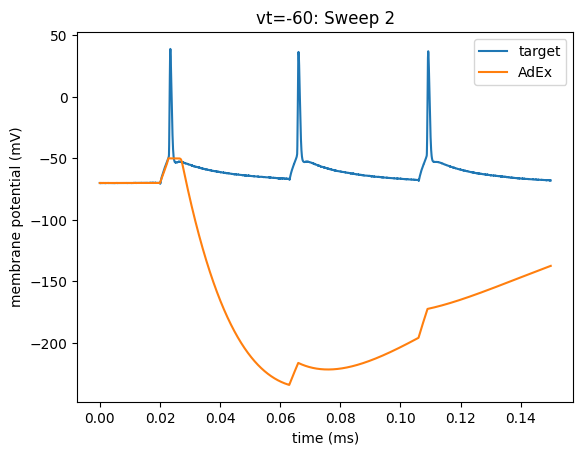

In [191]:
create_comparison_together(fastspikes_output_sliced[0], adex_6[0]*1000, d2_title='AdEx')
title('vt=-60: Sweep 2')

In [192]:
create_comparison_together(fastspikes_output_sliced[1], adex_6[1]*1000, d2_title='AdEx')
title('vt=-60: Sweep 3')

Text(0.5, 1.0, 'vt=-60: Sweep 3')

Text(0.5, 1.0, 'vt=-60: Sweep 4')

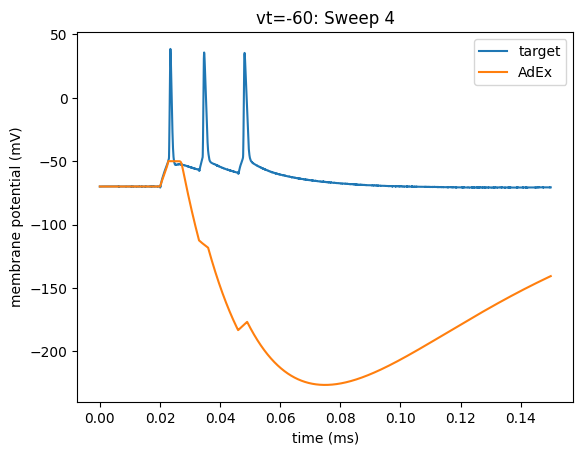

In [193]:
create_comparison_together(fastspikes_output_sliced[2], adex_6[2]*1000, d2_title='AdEx')
title('vt=-60: Sweep 4')

Text(0.5, 1.0, 'vt=-60: Sweep 5')

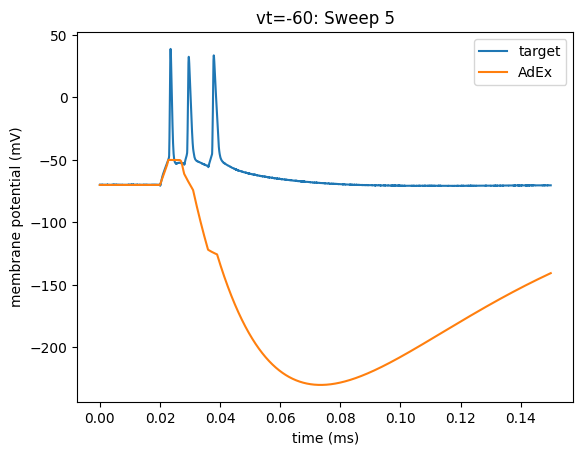

In [194]:
create_comparison_together(fastspikes_output_sliced[3], adex_6[3]*1000, d2_title='AdEx')
title('vt=-60: Sweep 5')

Although error = 0.01!

In [195]:
# vt = -30
adex_7 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, vt_var=-30, vr=-50)

first fit:
Round 0: Best parameters a=3.47497179 nS, b=262.65432411 pA, tauw=127.26019877 ms (error: 96.49501306 mV^2)
Round 1: Best parameters a=3.69766208 nS, b=175.78928112 pA, tauw=125.25970049 ms (error: 96.21983697 mV^2)
Round 2: Best parameters a=3.75928374 nS, b=0.33210048 nA, tauw=122.72957037 ms (error: 96.08900437 mV^2)
Round 3: Best parameters a=3.81055074 nS, b=137.34275206 pA, tauw=121.68380846 ms (error: 96.01779612 mV^2)
Round 4: Best parameters a=3.89178117 nS, b=279.57544627 pA, tauw=121.02474013 ms (error: 95.94258463 mV^2)
Round 5: Best parameters a=3.90882103 nS, b=0.41486475 nA, tauw=120.83256829 ms (error: 95.92594711 mV^2)
Round 6: Best parameters a=3.93996354 nS, b=0.39295724 nA, tauw=120.78683826 ms (error: 95.90577959 mV^2)
Round 7: Best parameters a=3.95701726 nS, b=0.34883669 nA, tauw=120.62439688 ms (error: 95.89085664 mV^2)
Round 8: Best parameters a=3.96004534 nS, b=60.89734893 pA, tauw=120.4877143 ms (error: 95.88491654 mV^2)
Round 9: Best parameters a=

In [196]:
create_comparison_together(fastspikes_output_sliced[0], adex_7[0]*1000, d2_title='AdEx')
title('vt=-30: Sweep 2')

Text(0.5, 1.0, 'vt=-30: Sweep 2')

Text(0.5, 1.0, 'vt=-30: Sweep 3')

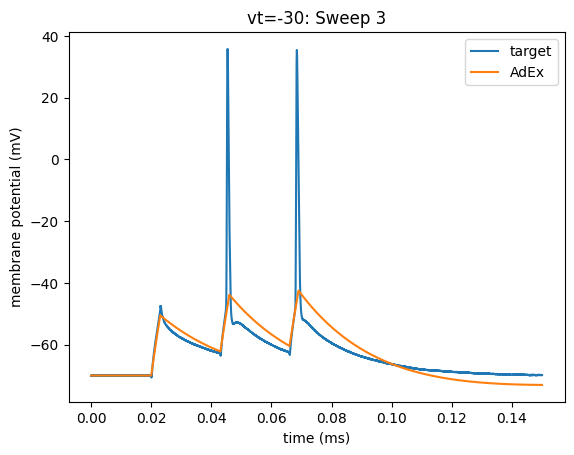

In [197]:
create_comparison_together(fastspikes_output_sliced[1], adex_7[1]*1000, d2_title='AdEx')
title('vt=-30: Sweep 3')

In [198]:
create_comparison_together(fastspikes_output_sliced[2], adex_7[2]*1000, d2_title='AdEx')
title('vt=-30: Sweep 4')

Text(0.5, 1.0, 'vt=-30: Sweep 4')

In [199]:
create_comparison_together(fastspikes_output_sliced[3], adex_7[3]*1000, d2_title='AdEx')
title('vt=-30: Sweep 5')

Text(0.5, 1.0, 'vt=-30: Sweep 5')

In [201]:
# delt = 1
adex_8 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, vt_var=-30, delt_var=1, vr=-50)

first fit:
Round 0: Best parameters a=3.66033051 nS, b=235.36829321 pA, tauw=131.80065142 ms (error: 96.62433384 mV^2)
Round 1: Best parameters a=3.7141643 nS, b=0.39978629 nA, tauw=123.74127067 ms (error: 96.28501629 mV^2)
Round 2: Best parameters a=3.86318052 nS, b=0.39314112 nA, tauw=122.34101802 ms (error: 96.10789138 mV^2)
Round 3: Best parameters a=3.86318052 nS, b=0.39314112 nA, tauw=122.34101802 ms (error: 96.10789138 mV^2)
Round 4: Best parameters a=3.86318052 nS, b=0.39314112 nA, tauw=122.34101802 ms (error: 96.10789138 mV^2)
Round 5: Best parameters a=3.86318052 nS, b=0.39314112 nA, tauw=122.34101802 ms (error: 96.10789138 mV^2)
Round 6: Best parameters a=3.86318052 nS, b=0.39314112 nA, tauw=122.34101802 ms (error: 96.10789138 mV^2)
Round 7: Best parameters a=3.86318052 nS, b=0.39314112 nA, tauw=122.34101802 ms (error: 96.10789138 mV^2)
Round 8: Best parameters a=3.86318052 nS, b=0.39314112 nA, tauw=122.34101802 ms (error: 96.10789138 mV^2)
Round 9: Best parameters a=3.86318

In [202]:
create_comparison_together(fastspikes_output_sliced[0], adex_8[0]*1000, d2_title='AdEx')
title('delt=1: Sweep 2')

Text(0.5, 1.0, 'delt=1: Sweep 2')

In [203]:
create_comparison_together(fastspikes_output_sliced[1], adex_7[1]*1000, d2_title='AdEx')
title('delt=1: Sweep 3')

Text(0.5, 1.0, 'delt=1: Sweep 3')

Text(0.5, 1.0, 'delt=1: Sweep 4')

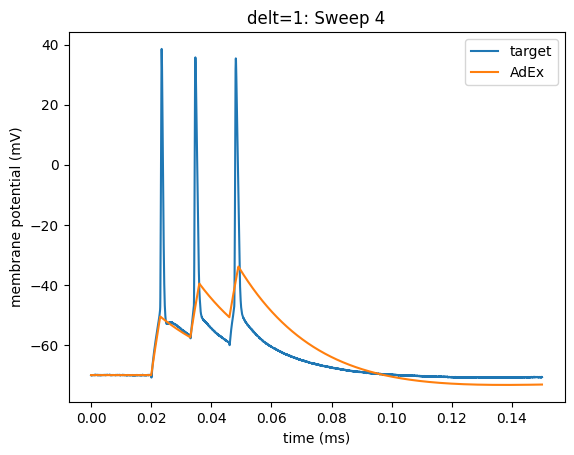

In [204]:
create_comparison_together(fastspikes_output_sliced[2], adex_7[2]*1000, d2_title='AdEx')
title('delt=1: Sweep 4')

Text(0.5, 1.0, 'delt=1: Sweep 5')

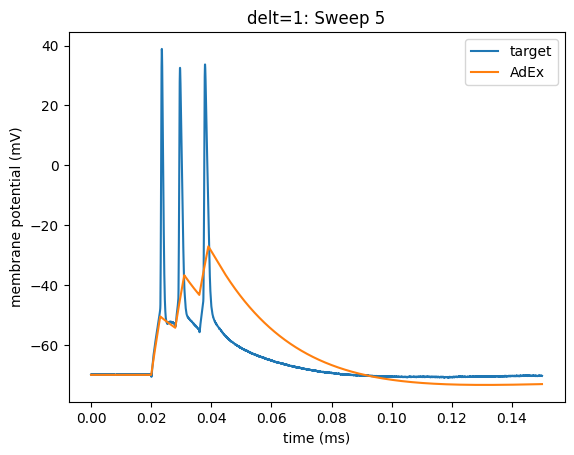

In [205]:
create_comparison_together(fastspikes_output_sliced[3], adex_7[3]*1000, d2_title='AdEx')
title('delt=1: Sweep 5')

In [6]:
# delt = 10
adex_9 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, vt_var=-30, delt_var=10, vr=-50)

WARNING    Cannot use Cython, a test compilation failed: Cython is not available (ImportError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


first fit:
Round 0: Best parameters a=3.55151293 nS, b=200.75433432 pA, tauw=130.14988947 ms (error: 104.75062643 mV^2)
Round 1: Best parameters a=3.7444099 nS, b=0.35883942 nA, tauw=125.36891619 ms (error: 104.09137412 mV^2)
Round 2: Best parameters a=3.8139167 nS, b=137.1976447 pA, tauw=123.03169068 ms (error: 103.82764636 mV^2)
Round 3: Best parameters a=3.87662253 nS, b=0.41227622 nA, tauw=121.89198931 ms (error: 103.65272257 mV^2)
Round 4: Best parameters a=3.91933416 nS, b=252.07258417 pA, tauw=121.38685785 ms (error: 103.55264416 mV^2)
Round 5: Best parameters a=3.93407501 nS, b=0.46538826 nA, tauw=120.96629447 ms (error: 103.50385582 mV^2)
Round 6: Best parameters a=3.95255024 nS, b=0.4513588 nA, tauw=120.93741132 ms (error: 103.47296784 mV^2)
Round 7: Best parameters a=3.96661656 nS, b=0.39360634 nA, tauw=120.65494002 ms (error: 103.43412078 mV^2)
Round 8: Best parameters a=3.97378116 nS, b=0.4557094 nA, tauw=120.53919459 ms (error: 103.41611356 mV^2)
Round 9: Best parameters 

Text(0.5, 1.0, 'delt=10: Sweep 2')

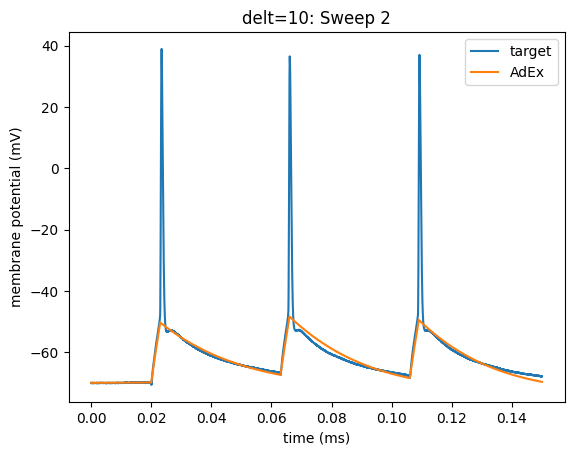

In [7]:
create_comparison_together(fastspikes_output_sliced[0], adex_9[0]*1000, d2_title='AdEx')
title('delt=10: Sweep 2')

In [8]:
create_comparison_together(fastspikes_output_sliced[1], adex_9[1]*1000, d2_title='AdEx')
title('delt=10: Sweep 3')

Text(0.5, 1.0, 'delt=10: Sweep 3')

In [9]:
create_comparison_together(fastspikes_output_sliced[2], adex_9[2]*1000, d2_title='AdEx')
title('delt=10: Sweep 4')

Text(0.5, 1.0, 'delt=10: Sweep 4')

Text(0.5, 1.0, 'delt=10: Sweep 5')

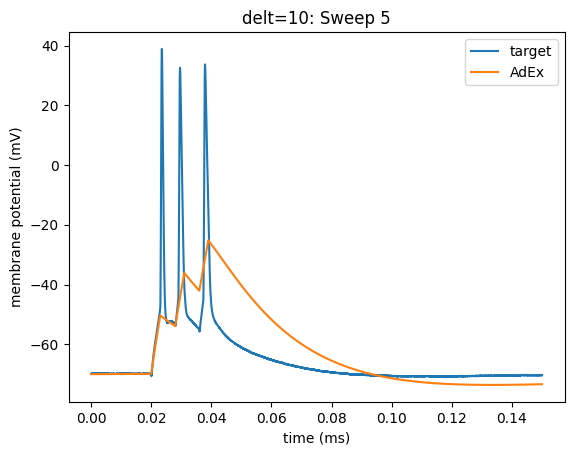

In [10]:
create_comparison_together(fastspikes_output_sliced[3], adex_9[3]*1000, d2_title='AdEx')
title('delt=10: Sweep 5')

In [12]:
# delt = 5
# vc=10
adex_10 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, vt_var=-30, delt_var=5, vc_var=10, vr=-50)

first fit:
Round 0: Best parameters a=3.46681656 nS, b=315.73073062 pA, tauw=128.34439329 ms (error: 97.97113302 mV^2)
Round 1: Best parameters a=3.66000563 nS, b=0.41734932 nA, tauw=124.79135092 ms (error: 97.63010919 mV^2)
Round 2: Best parameters a=3.72593837 nS, b=0.43266713 nA, tauw=121.97529511 ms (error: 97.46492741 mV^2)
Round 3: Best parameters a=3.825653 nS, b=0.46067824 nA, tauw=121.59143324 ms (error: 97.36492038 mV^2)
Round 4: Best parameters a=3.86482107 nS, b=0.41629584 nA, tauw=120.9643307 ms (error: 97.31133723 mV^2)
Round 5: Best parameters a=3.92829121 nS, b=0.33235889 nA, tauw=121.04781086 ms (error: 97.26657815 mV^2)
Round 6: Best parameters a=3.93518347 nS, b=0.46420426 nA, tauw=120.78135597 ms (error: 97.25233016 mV^2)
Round 7: Best parameters a=3.95366248 nS, b=0.32723292 nA, tauw=120.59751542 ms (error: 97.23286726 mV^2)
Round 8: Best parameters a=3.96246478 nS, b=0.41262203 nA, tauw=120.43500861 ms (error: 97.22112315 mV^2)
Round 9: Best parameters a=3.9781380

Text(0.5, 1.0, 'delt=5, vc=10: Sweep 5')

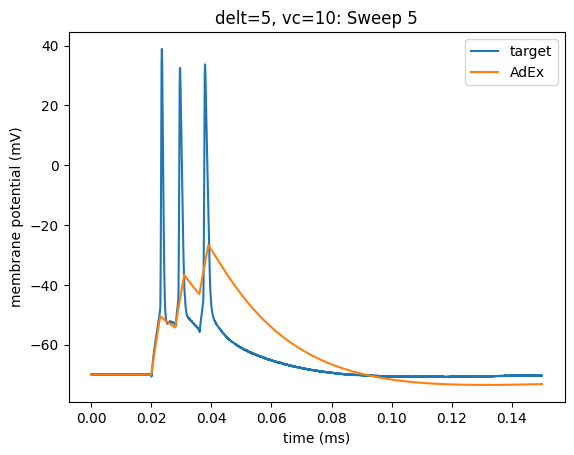

In [13]:
create_comparison_together(fastspikes_output_sliced[3], adex_10[3]*1000, d2_title='AdEx')
title('delt=5, vc=10: Sweep 5')

In [14]:
# c=80
adex_11 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, c_var=80, vt_var=-30, vr=-50)

first fit:
Round 0: Best parameters a=2.40932592 nS, b=64.82810042 pA, tauw=128.35937668 ms (error: 96.64339157 mV^2)
Round 1: Best parameters a=1.63895755 nS, b=38.97475353 pA, tauw=124.17996199 ms (error: 88.23360371 mV^2)
Round 2: Best parameters a=1.56032832 nS, b=26.41060431 pA, tauw=126.82164547 ms (error: 83.4804543 mV^2)
Round 3: Best parameters a=1.21385882 nS, b=16.00089668 pA, tauw=142.65895691 ms (error: 80.52848897 mV^2)
Round 4: Best parameters a=1.22615697 nS, b=10.16263427 pA, tauw=132.58425578 ms (error: 80.03144887 mV^2)
Round 5: Best parameters a=1.12537382 nS, b=8.09083459 pA, tauw=129.30705906 ms (error: 79.85215773 mV^2)
Round 6: Best parameters a=1.09323402 nS, b=7.00272001 pA, tauw=135.03491592 ms (error: 79.81014237 mV^2)
Round 7: Best parameters a=1.07585831 nS, b=5.7664524 pA, tauw=124.35339053 ms (error: 79.77412621 mV^2)
Round 8: Best parameters a=1.05509989 nS, b=4.44838549 pA, tauw=124.25665746 ms (error: 79.77078188 mV^2)
Round 9: Best parameters a=1.036

Text(0.5, 1.0, 'c=80: Sweep 5')

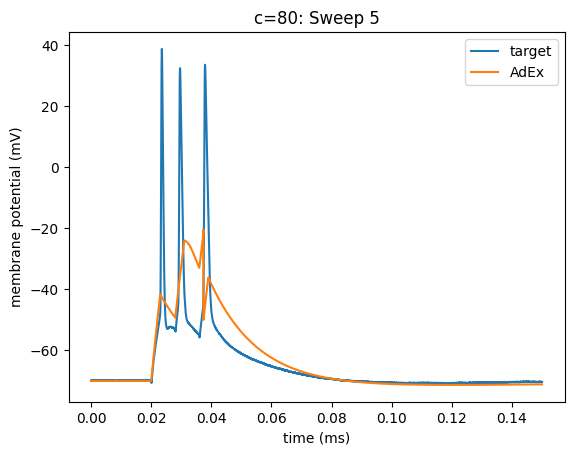

In [15]:
create_comparison_together(fastspikes_output_sliced[3], adex_11[3]*1000, d2_title='AdEx')
title('c=80: Sweep 5')

In [16]:
# c=100
adex_12 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, c_var=100, vt_var=-30, vr=-50)

first fit:
Round 0: Best parameters a=2.90407891 nS, b=73.29976879 pA, tauw=128.89671817 ms (error: 92.98069179 mV^2)
Round 1: Best parameters a=2.74383489 nS, b=34.73252228 pA, tauw=138.78200604 ms (error: 84.04732783 mV^2)
Round 2: Best parameters a=2.63786822 nS, b=24.74006087 pA, tauw=126.47792788 ms (error: 82.48553532 mV^2)
Round 3: Best parameters a=2.28925343 nS, b=13.04353964 pA, tauw=124.78247096 ms (error: 81.62140311 mV^2)
Round 4: Best parameters a=2.52127714 nS, b=9.50620349 pA, tauw=123.9059448 ms (error: 81.2961517 mV^2)
Round 5: Best parameters a=3.22904387 nS, b=7.54114642 pA, tauw=124.17675626 ms (error: 81.13955846 mV^2)
Round 6: Best parameters a=3.025865 nS, b=5.92564145 pA, tauw=123.80085446 ms (error: 81.03273363 mV^2)
Round 7: Best parameters a=2.9453612 nS, b=4.7631477 pA, tauw=122.67708317 ms (error: 80.9777486 mV^2)
Round 8: Best parameters a=3.06035471 nS, b=3.77659744 pA, tauw=121.99032927 ms (error: 80.94102192 mV^2)
Round 9: Best parameters a=3.3767941 n

Text(0.5, 1.0, 'c=100: Sweep 5')

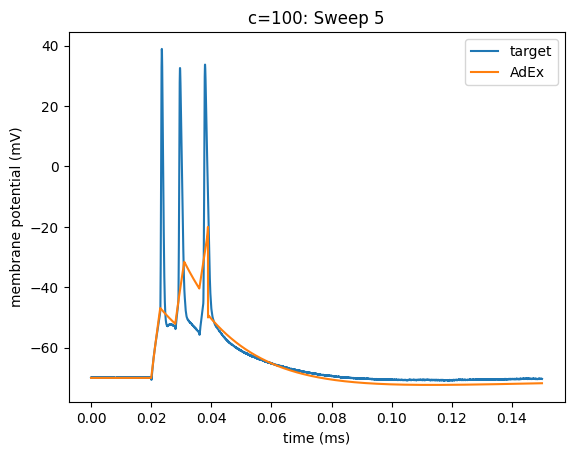

In [17]:
create_comparison_together(fastspikes_output_sliced[3], adex_12[3]*1000, d2_title='AdEx')
title('c=100: Sweep 5')

In [18]:
# c=110
adex_13 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, c_var=110, vt_var=-30, vr=-50)

first fit:
Round 0: Best parameters a=3.58747896 nS, b=0.31906335 nA, tauw=125.73598301 ms (error: 97.66597263 mV^2)
Round 1: Best parameters a=3.74236369 nS, b=183.50603742 pA, tauw=123.74295967 ms (error: 97.26515843 mV^2)
Round 2: Best parameters a=3.83221445 nS, b=0.38750417 nA, tauw=121.94225745 ms (error: 97.01973641 mV^2)
Round 3: Best parameters a=3.88231091 nS, b=117.91144521 pA, tauw=122.01088221 ms (error: 96.95308904 mV^2)
Round 4: Best parameters a=3.93506583 nS, b=105.19567716 pA, tauw=121.88740835 ms (error: 96.87571978 mV^2)
Round 5: Best parameters a=3.9532385 nS, b=47.95198827 pA, tauw=121.3436471 ms (error: 96.82201237 mV^2)
Round 6: Best parameters a=3.95925968 nS, b=0.44112172 nA, tauw=121.00863024 ms (error: 96.79575738 mV^2)
Round 7: Best parameters a=3.96959971 nS, b=0.43684306 nA, tauw=120.79618748 ms (error: 96.77118044 mV^2)
Round 8: Best parameters a=3.97006002 nS, b=0.39165611 nA, tauw=120.67755392 ms (error: 96.76401358 mV^2)
Round 9: Best parameters a=3.9

In [19]:
create_comparison_together(fastspikes_output_sliced[3], adex_13[3]*1000, d2_title='AdEx')
title('c=110: Sweep 5')

Text(0.5, 1.0, 'c=110: Sweep 5')

In [20]:
# c=150
adex_14 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, c_var=150, vt_var=-30, vr=-50)

first fit:
Round 0: Best parameters a=3.51241083 nS, b=0.35739613 nA, tauw=127.65792045 ms (error: 102.20988352 mV^2)
Round 1: Best parameters a=3.7368188 nS, b=282.7583931 pA, tauw=125.21969462 ms (error: 101.80233046 mV^2)
Round 2: Best parameters a=3.78815586 nS, b=246.47150184 pA, tauw=123.25922388 ms (error: 101.6620397 mV^2)
Round 3: Best parameters a=3.83921696 nS, b=0.34160677 nA, tauw=121.57324187 ms (error: 101.53499404 mV^2)
Round 4: Best parameters a=3.89219037 nS, b=205.28416393 pA, tauw=121.8672476 ms (error: 101.48336439 mV^2)
Round 5: Best parameters a=3.9292883 nS, b=186.53514695 pA, tauw=121.34759323 ms (error: 101.4211586 mV^2)
Round 6: Best parameters a=3.94496975 nS, b=132.3975885 pA, tauw=121.1113389 ms (error: 101.39462316 mV^2)
Round 7: Best parameters a=3.9586787 nS, b=66.81872944 pA, tauw=120.84768349 ms (error: 101.36947559 mV^2)
Round 8: Best parameters a=3.96897681 nS, b=205.37873908 pA, tauw=120.69416529 ms (error: 101.35236982 mV^2)
Round 9: Best paramete

Text(0.5, 1.0, 'c=150: Sweep 5')

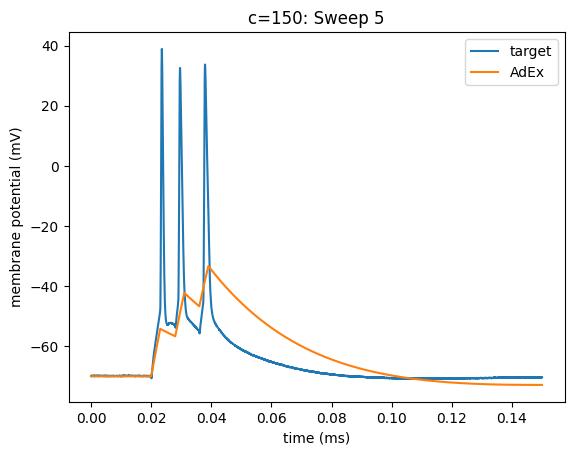

In [21]:
create_comparison_together(fastspikes_output_sliced[3], adex_14[3]*1000, d2_title='AdEx')
title('c=150: Sweep 5')

In [22]:
adex_15 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, gl_var=20, vt_var=-30, vr=-50)

first fit:
Round 0: Best parameters a=1.32821865 nS, b=124.70927964 pA, tauw=152.71039765 ms (error: 120.0844769 mV^2)
Round 1: Best parameters a=1.20716112 nS, b=98.2869641 pA, tauw=152.18110075 ms (error: 120.03157527 mV^2)
Round 2: Best parameters a=1.13161686 nS, b=163.5810635 pA, tauw=152.7867213 ms (error: 119.99579037 mV^2)
Round 3: Best parameters a=1.08085831 nS, b=0.32795738 nA, tauw=154.89904107 ms (error: 119.96739324 mV^2)
Round 4: Best parameters a=1.06105081 nS, b=0.39868534 nA, tauw=156.30015146 ms (error: 119.95502896 mV^2)
Round 5: Best parameters a=1.04805209 nS, b=135.03472058 pA, tauw=157.84045204 ms (error: 119.94548876 mV^2)
Round 6: Best parameters a=1.03452483 nS, b=0.46087007 nA, tauw=157.7032852 ms (error: 119.93990663 mV^2)
Round 7: Best parameters a=1.02372963 nS, b=231.16881141 pA, tauw=158.39274756 ms (error: 119.93353549 mV^2)
Round 8: Best parameters a=1.01803857 nS, b=0.44803872 nA, tauw=158.74457526 ms (error: 119.93022315 mV^2)
Round 9: Best paramete

Text(0.5, 1.0, 'gl=20: Sweep 5')

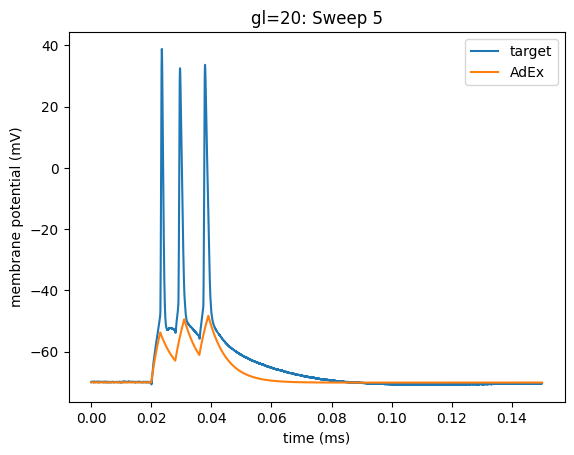

In [23]:
create_comparison_together(fastspikes_output_sliced[3], adex_15[3]*1000, d2_title='AdEx')
title('gl=20: Sweep 5')

In [25]:
adex_16 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, gl_var=30, vt_var=-30, vr=-50)

first fit:
Round 0: Best parameters a=1.34658331 nS, b=112.18177844 pA, tauw=142.61538642 ms (error: 140.12450749 mV^2)
Round 1: Best parameters a=1.23476909 nS, b=0.34003019 nA, tauw=153.60244692 ms (error: 140.07282308 mV^2)
Round 2: Best parameters a=1.13595371 nS, b=247.67294651 pA, tauw=151.45314602 ms (error: 140.05061127 mV^2)
Round 3: Best parameters a=1.10374184 nS, b=68.77892174 pA, tauw=156.10690075 ms (error: 140.03476163 mV^2)
Round 4: Best parameters a=1.073509 nS, b=0.33626474 nA, tauw=157.4399478 ms (error: 140.0250038 mV^2)
Round 5: Best parameters a=1.05957812 nS, b=0.328086 nA, tauw=157.70059633 ms (error: 140.02106726 mV^2)
Round 6: Best parameters a=1.03267685 nS, b=255.90195886 pA, tauw=157.30123348 ms (error: 140.01477474 mV^2)
Round 7: Best parameters a=1.02438716 nS, b=119.14448044 pA, tauw=158.58821113 ms (error: 140.01085189 mV^2)
Round 8: Best parameters a=1.01793748 nS, b=68.72244645 pA, tauw=158.50914327 ms (error: 140.00932442 mV^2)
Round 9: Best paramete

Text(0.5, 1.0, 'gl=30: Sweep 5')

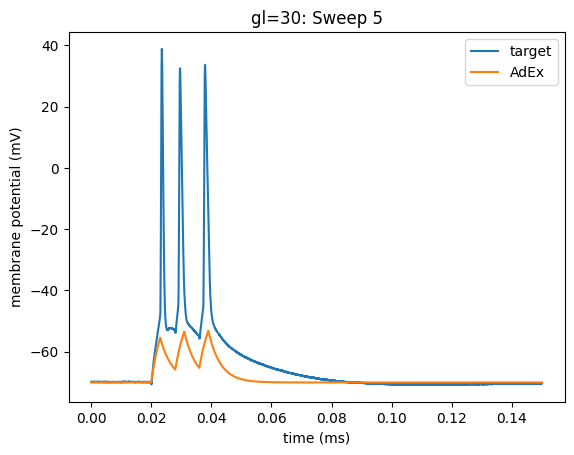

In [26]:
create_comparison_together(fastspikes_output_sliced[3], adex_16[3]*1000, d2_title='AdEx')
title('gl=30: Sweep 5')

In [27]:
adex_17 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, gl_var=40, vt_var=-30, vr=-50)

first fit:
Round 0: Best parameters a=1.4488601 nS, b=0.39342328 nA, tauw=151.32063584 ms (error: 153.20880186 mV^2)
Round 1: Best parameters a=1.1826277 nS, b=0.43380005 nA, tauw=141.15721115 ms (error: 153.17592941 mV^2)
Round 2: Best parameters a=1.16613744 nS, b=0.37518259 nA, tauw=155.23087847 ms (error: 153.15696335 mV^2)
Round 3: Best parameters a=1.08546092 nS, b=0.44810543 nA, tauw=151.33247426 ms (error: 153.1475483 mV^2)
Round 4: Best parameters a=1.07644542 nS, b=0.46641497 nA, tauw=157.79042557 ms (error: 153.1397109 mV^2)
Round 5: Best parameters a=1.04822844 nS, b=0.47976189 nA, tauw=158.49117565 ms (error: 153.13447521 mV^2)
Round 6: Best parameters a=1.03321497 nS, b=0.48118429 nA, tauw=158.35430597 ms (error: 153.1321633 mV^2)
Round 7: Best parameters a=1.02166352 nS, b=0.48402476 nA, tauw=158.64544386 ms (error: 153.13002918 mV^2)
Round 8: Best parameters a=1.01699602 nS, b=0.48993535 nA, tauw=158.80403268 ms (error: 153.12913257 mV^2)
Round 9: Best parameters a=1.01

Text(0.5, 1.0, 'gl=40: Sweep 5')

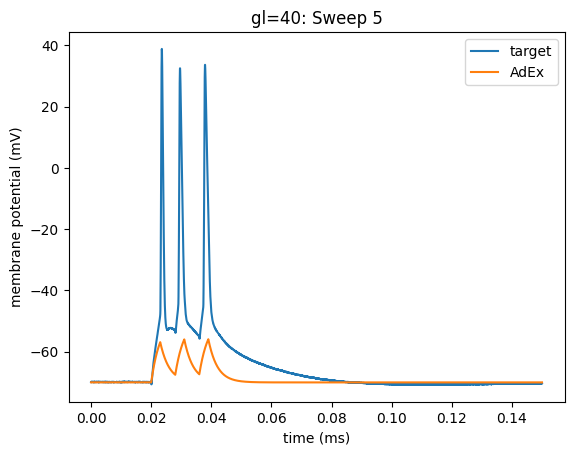

In [28]:
create_comparison_together(fastspikes_output_sliced[3], adex_17[3]*1000, d2_title='AdEx')
title('gl=40: Sweep 5')

In [30]:
# delt=3, vc=10
adex_18 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, gl_var=40, delt_var=3, vc_var=10, vt_var=-30, vr=-50)

first fit:
Round 0: Best parameters a=1.44087556 nS, b=65.50296785 pA, tauw=147.93117225 ms (error: 153.21153846 mV^2)
Round 1: Best parameters a=1.25523678 nS, b=34.89282144 pA, tauw=154.8040802 ms (error: 153.17154868 mV^2)
Round 2: Best parameters a=1.14527883 nS, b=24.17516085 pA, tauw=157.02002072 ms (error: 153.15109355 mV^2)
Round 3: Best parameters a=1.08342817 nS, b=26.42501495 pA, tauw=154.74880179 ms (error: 153.14318788 mV^2)
Round 4: Best parameters a=1.06604548 nS, b=65.99079747 pA, tauw=158.27677612 ms (error: 153.13696557 mV^2)
Round 5: Best parameters a=1.03971071 nS, b=65.99079747 pA, tauw=158.27677612 ms (error: 153.13268929 mV^2)
Round 6: Best parameters a=1.03006804 nS, b=34.91535192 pA, tauw=158.34692156 ms (error: 153.13106036 mV^2)
Round 7: Best parameters a=1.02074477 nS, b=89.20860993 pA, tauw=159.03621099 ms (error: 153.12893538 mV^2)
Round 8: Best parameters a=1.01523576 nS, b=17.45595732 pA, tauw=159.13459803 ms (error: 153.12795789 mV^2)
Round 9: Best para

Text(0.5, 1.0, 'delt=3, vc=10: Sweep 5')

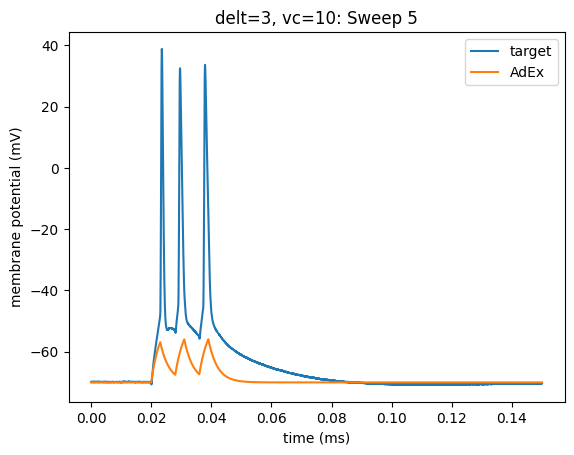

In [31]:
create_comparison_together(fastspikes_output_sliced[3], adex_18[3]*1000, d2_title='AdEx')
title('delt=3, vc=10: Sweep 5')

In [34]:
# expand tauw params
adex_19 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, gl_var=40, delt_var=3, vc_var=10, vt_var=-30, vr=-50,
                   tauw_min=80, tauw_max=200)

first fit:
Round 0: Best parameters a=1.56385773 nS, b=211.77644097 pA, tauw=174.83550191 ms (error: 153.19700577 mV^2)
Round 1: Best parameters a=1.26155783 nS, b=300.84508485 pA, tauw=171.83939061 ms (error: 153.15478837 mV^2)
Round 2: Best parameters a=1.14516534 nS, b=111.5244503 pA, tauw=189.26554049 ms (error: 153.12325049 mV^2)
Round 3: Best parameters a=1.09535375 nS, b=100.32856332 pA, tauw=192.55199923 ms (error: 153.11403743 mV^2)
Round 4: Best parameters a=1.06241233 nS, b=86.82691768 pA, tauw=193.12421807 ms (error: 153.10914035 mV^2)
Round 5: Best parameters a=1.04454514 nS, b=77.23622723 pA, tauw=195.28768796 ms (error: 153.10530771 mV^2)
Round 6: Best parameters a=1.03375481 nS, b=47.05237981 pA, tauw=195.78231211 ms (error: 153.10353509 mV^2)
Round 7: Best parameters a=1.02665285 nS, b=84.67517052 pA, tauw=196.64364183 ms (error: 153.10204136 mV^2)
Round 8: Best parameters a=1.01892422 nS, b=0.33663933 nA, tauw=197.68945802 ms (error: 153.10036291 mV^2)
Round 9: Best p

Text(0.5, 1.0, 'tauw=80-200: Sweep 5')

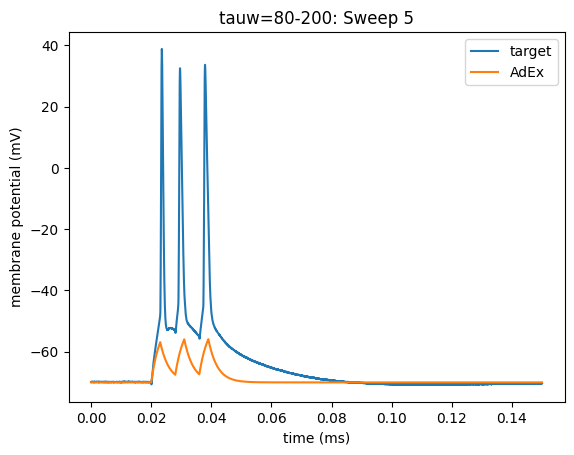

In [35]:
create_comparison_together(fastspikes_output_sliced[3], adex_19[3]*1000, d2_title='AdEx')
title('tauw=80-200: Sweep 5')

In [36]:
# expand a params
adex_20 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, gl_var=40, delt_var=3, vc_var=10, vt_var=-30, vr=-50,
                   tauw_min=80, tauw_max=200, a_min=0, a_max=10)

first fit:
Round 0: Best parameters a=1.0612571 nS, b=0.31776071 nA, tauw=159.30274411 ms (error: 153.13524293 mV^2)
Round 1: Best parameters a=0.58162668 nS, b=288.53279754 pA, tauw=159.30274411 ms (error: 153.05772414 mV^2)
Round 2: Best parameters a=0.34654668 nS, b=88.21306264 pA, tauw=170.07287527 ms (error: 153.01662806 mV^2)
Round 3: Best parameters a=220.37618364 pS, b=36.77174861 pA, tauw=186.59325276 ms (error: 152.99470733 mV^2)
Round 4: Best parameters a=151.25233746 pS, b=37.45016969 pA, tauw=186.4655395 ms (error: 152.9849499 mV^2)
Round 5: Best parameters a=151.25233746 pS, b=37.45016969 pA, tauw=186.4655395 ms (error: 152.9849499 mV^2)
Round 6: Best parameters a=151.25233746 pS, b=37.45016969 pA, tauw=186.4655395 ms (error: 152.9849499 mV^2)
Round 7: Best parameters a=151.25233746 pS, b=37.45016969 pA, tauw=186.4655395 ms (error: 152.9849499 mV^2)
Round 8: Best parameters a=151.25233746 pS, b=37.45016969 pA, tauw=186.4655395 ms (error: 152.9849499 mV^2)
Round 9: Best pa

Text(0.5, 1.0, 'a=0-10: Sweep 5')

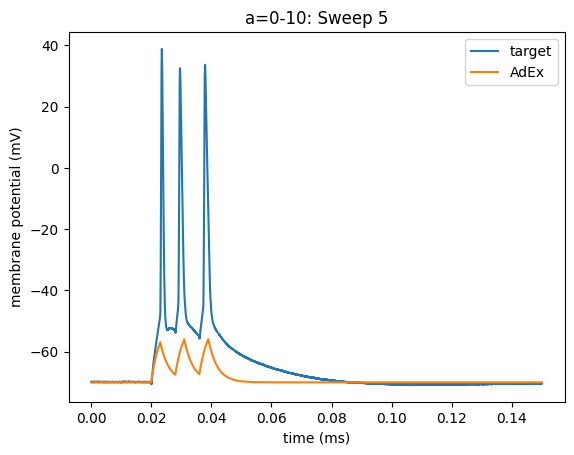

In [37]:
create_comparison_together(fastspikes_output_sliced[3], adex_20[3]*1000, d2_title='AdEx')
title('a=0-10: Sweep 5')

In [38]:
# expand b params
adex_21 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, gl_var=40, delt_var=3, vc_var=10, vt_var=-30, vr=-50,
                   tauw_min=80, tauw_max=200, a_min=0, a_max=10, b_max=5)

first fit:
Round 0: Best parameters a=1.19335426 nS, b=2.82611598 nA, tauw=161.48940798 ms (error: 153.15434483 mV^2)
Round 1: Best parameters a=0.5948621 nS, b=4.07720287 nA, tauw=162.94038468 ms (error: 153.05802891 mV^2)
Round 2: Best parameters a=0.3958973 nS, b=4.17560181 nA, tauw=162.55991215 ms (error: 153.0265752 mV^2)
Round 3: Best parameters a=264.04530001 pS, b=3.39681567 nA, tauw=161.52547662 ms (error: 153.00582446 mV^2)
Round 4: Best parameters a=212.93437738 pS, b=2.63335719 nA, tauw=176.2249184 ms (error: 152.99518685 mV^2)
Round 5: Best parameters a=160.03200562 pS, b=3.79899925 nA, tauw=170.86548476 ms (error: 152.98797126 mV^2)
Round 6: Best parameters a=118.56509514 pS, b=3.80338139 nA, tauw=168.29112 ms (error: 152.98188276 mV^2)
Round 7: Best parameters a=82.07475914 pS, b=3.97986446 nA, tauw=182.38971626 ms (error: 152.97538987 mV^2)
Round 8: Best parameters a=59.88471188 pS, b=4.38194985 nA, tauw=166.52576385 ms (error: 152.97289559 mV^2)
Round 9: Best parameter

Text(0.5, 1.0, 'b=0-5: Sweep 5')

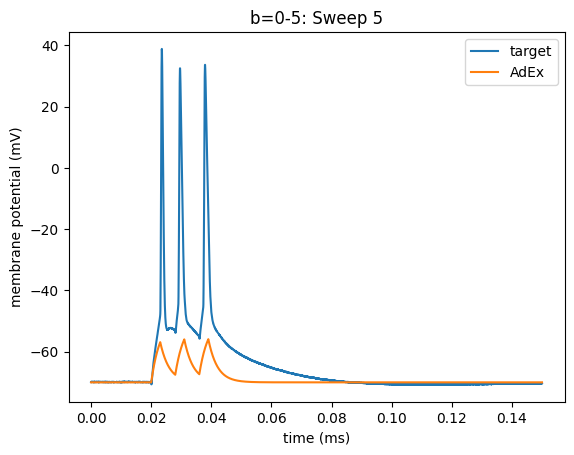

In [39]:
create_comparison_together(fastspikes_output_sliced[3], adex_21[3]*1000, d2_title='AdEx')
title('b=0-5: Sweep 5')

In [ ]:
# c=100
adex_22 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, c_var=100, gl_var=30, delt_var=1, vc_var=2, vt_var=-30, vr=-50,
                   tauw_min=80, tauw_max=200, a_min=0, a_max=10, b_max=5)

# Round 0: Best parameters a=1.05851107 nS, b=2.11905687 nA, tauw=167.38683919 ms (error: 137.22048888 mV^2)
# Round 1: Best parameters a=0.86830623 nS, b=4.16715056 nA, tauw=189.29787331 ms (error: 137.14985502 mV^2)
# Round 2: Best parameters a=0.50136893 nS, b=4.00391223 nA, tauw=186.91223485 ms (error: 137.06715568 mV^2)
# Round 3: Best parameters a=312.78278507 pS, b=3.64519284 nA, tauw=188.71188835 ms (error: 137.02289315 mV^2)
# Round 4: Best parameters a=208.96800932 pS, b=4.5605299 nA, tauw=177.03919349 ms (error: 137.0017852 mV^2)
# Round 5: Best parameters a=163.59571953 pS, b=4.49099507 nA, tauw=190.23694203 ms (error: 136.98836666 mV^2)
# Round 6: Best parameters a=106.99939352 pS, b=4.73023815 nA, tauw=178.13898713 ms (error: 136.97689018 mV^2)
# Round 7: Best parameters a=80.39116528 pS, b=4.66618974 nA, tauw=189.12366967 ms (error: 136.96948067 mV^2)
# Round 8: Best parameters a=62.72770658 pS, b=4.72479403 nA, tauw=193.47535225 ms (error: 136.96514746 mV^2)
# Round 9: Best parameters a=46.51408668 pS, b=4.22954447 nA, tauw=194.36277109 ms (error: 136.96146081 mV^2)

WARNING    Cannot use Cython, a test compilation failed: Cython is not available (ImportError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


first fit:
Round 0: Best parameters a=1.24353748 nS, b=4.12324968 nA, tauw=185.81916193 ms (error: 137.24028608 mV^2)
Round 1: Best parameters a=0.64548976 nS, b=1.71624046 nA, tauw=184.06712008 ms (error: 137.10251536 mV^2)
Round 2: Best parameters a=0.42081196 nS, b=1.2565455 nA, tauw=190.27521138 ms (error: 137.04700565 mV^2)
Round 3: Best parameters a=254.41372702 pS, b=3.87951853 nA, tauw=192.64582157 ms (error: 137.00844623 mV^2)
Round 4: Best parameters a=168.79862232 pS, b=1.36449304 nA, tauw=190.2183132 ms (error: 136.98955671 mV^2)
Round 5: Best parameters a=129.70192565 pS, b=0.40487247 nA, tauw=190.0241118 ms (error: 136.98066428 mV^2)
Round 6: Best parameters a=91.41918724 pS, b=3.63521228 nA, tauw=194.18849736 ms (error: 136.97153113 mV^2)
Round 7: Best parameters a=62.52899146 pS, b=288.66520712 pA, tauw=194.28588947 ms (error: 136.96505148 mV^2)
Round 8: Best parameters a=48.26516261 pS, b=0.41435245 nA, tauw=194.69674843 ms (error: 136.96183666 mV^2)
Round 9: Best para

In [7]:
create_comparison_together(fastspikes_output_sliced[3], adex_22[3]*1000, d2_title='AdEx')
title('c_var=100, gl_var=30, delt_var=1, vc_var=2, vt_var=-30, vr=-50,' \
'tauw_min=80, tauw_max=200, a_min=0, a_max=10, b_max=5: Sweep 5')

Text(0.5, 1.0, 'c_var=100, gl_var=30, delt_var=1, vc_var=2, vt_var=-30, vr=-50,tauw_min=80, tauw_max=200, a_min=0, a_max=10, b_max=5: Sweep 5')

In [8]:
# c=80
adex_23 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, c_var=80, gl_var=30, delt_var=1, vc_var=2, vt_var=-30, vr=-50,
                   tauw_min=80, tauw_max=200, a_min=0, a_max=10, b_max=5)

first fit:
Round 0: Best parameters a=1.32092438 nS, b=2.12916683 nA, tauw=175.95237619 ms (error: 134.33198786 mV^2)
Round 1: Best parameters a=0.6749314 nS, b=1.57867355 nA, tauw=181.88930314 ms (error: 134.16177432 mV^2)
Round 2: Best parameters a=0.42373693 nS, b=0.55277326 nA, tauw=188.04142123 ms (error: 134.09622146 mV^2)
Round 3: Best parameters a=272.51812485 pS, b=1.4055848 nA, tauw=174.07874062 ms (error: 134.06418147 mV^2)
Round 4: Best parameters a=175.67720151 pS, b=2.98057858 nA, tauw=189.08021723 ms (error: 134.03597273 mV^2)
Round 5: Best parameters a=128.29670529 pS, b=0.40276258 nA, tauw=187.03020102 ms (error: 134.02484982 mV^2)
Round 6: Best parameters a=90.34005697 pS, b=230.93583831 pA, tauw=191.70236187 ms (error: 134.01514703 mV^2)
Round 7: Best parameters a=69.16286877 pS, b=190.71991772 pA, tauw=189.71706609 ms (error: 134.01025412 mV^2)
Round 8: Best parameters a=51.91862011 pS, b=0.35279053 nA, tauw=194.01888058 ms (error: 134.00586791 mV^2)
Round 9: Best p

Text(0.5, 1.0, 'c_var=80, gl_var=30, delt_var=1, vc_var=2, vt_var=-30, vr=-50,tauw_min=80, tauw_max=200, a_min=0, a_max=10, b_max=5: Sweep 5')

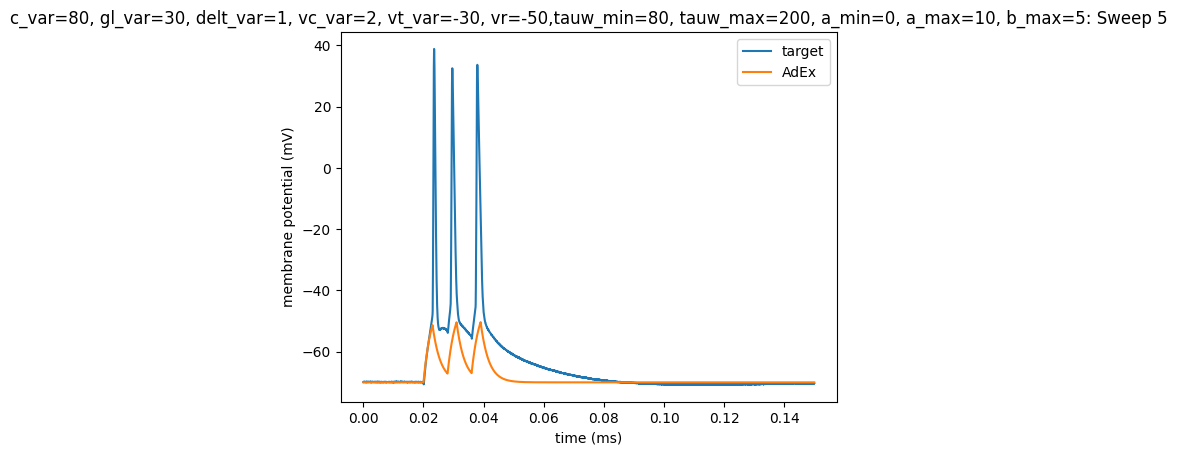

In [9]:
create_comparison_together(fastspikes_output_sliced[3], adex_23[3]*1000, d2_title='AdEx')
title('c_var=80, gl_var=30, delt_var=1, vc_var=2, vt_var=-30, vr=-50,' \
'tauw_min=80, tauw_max=200, a_min=0, a_max=10, b_max=5: Sweep 5')

In [10]:
# delt=5
# vc=15
# vt=-45
# vr=-55

adex_24 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, c_var=80, gl_var=30, delt_var=5, vc_var=15, vt_var=-45, vr=-55,
                   tauw_min=80, tauw_max=200, a_min=0, a_max=10, b_max=5)

first fit:
Round 0: Best parameters a=1.24119551 nS, b=3.14730621 nA, tauw=151.66812289 ms (error: 131.9442367 mV^2)
Round 1: Best parameters a=0.57250285 nS, b=3.7398881 nA, tauw=154.13797006 ms (error: 131.73534126 mV^2)
Round 2: Best parameters a=0.32391868 nS, b=4.30352397 nA, tauw=186.47004235 ms (error: 131.64458372 mV^2)
Round 3: Best parameters a=254.89973192 pS, b=4.334662 nA, tauw=188.88732598 ms (error: 131.62595396 mV^2)
Round 4: Best parameters a=166.18411644 pS, b=4.31935659 nA, tauw=191.86547422 ms (error: 131.60262991 mV^2)
Round 5: Best parameters a=107.24806907 pS, b=4.31935659 nA, tauw=194.01852042 ms (error: 131.58745807 mV^2)
Round 6: Best parameters a=92.40578572 pS, b=1.72197784 nA, tauw=193.25856674 ms (error: 131.58381938 mV^2)
Round 7: Best parameters a=63.55717979 pS, b=3.08827036 nA, tauw=195.60767865 ms (error: 131.57639885 mV^2)
Round 8: Best parameters a=48.22380447 pS, b=4.44067124 nA, tauw=189.00286155 ms (error: 131.57295019 mV^2)
Round 9: Best paramet

Text(0.5, 1.0, 'c_var=80, gl_var=30, delt_var=5, vc_var=15, vt_var=-45, vr=-55,tauw_min=80, tauw_max=200, a_min=0, a_max=10, b_max=5: Sweep 5')

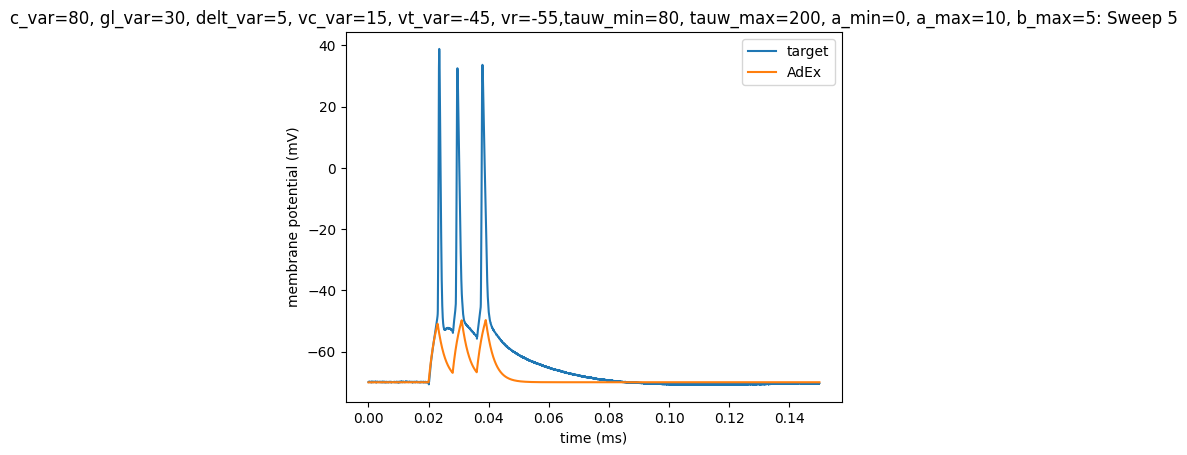

In [11]:
create_comparison_together(fastspikes_output_sliced[3], adex_24[3]*1000, d2_title='AdEx')
title('c_var=80, gl_var=30, delt_var=5, vc_var=15, vt_var=-45, vr=-55,' \
'tauw_min=80, tauw_max=200, a_min=0, a_max=10, b_max=5: Sweep 5')

In [12]:
# gl = 20

# delt=5
# vc=15
# vt=-45
# vr=-55

adex_25 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, c_var=80, gl_var=20, delt_var=5, vc_var=15, vt_var=-45, vr=-55,
                   tauw_min=80, tauw_max=200, a_min=0, a_max=10, b_max=5)

first fit:
Round 0: Best parameters a=1.82401079 nS, b=2.09920574 nA, tauw=159.7100847 ms (error: 108.82282199 mV^2)
Round 1: Best parameters a=0.86875443 nS, b=1.79006722 nA, tauw=157.69873576 ms (error: 108.31045634 mV^2)
Round 2: Best parameters a=0.54310776 nS, b=3.02735589 nA, tauw=171.01981461 ms (error: 108.11271215 mV^2)
Round 3: Best parameters a=0.35408418 nS, b=3.96238636 nA, tauw=151.61492308 ms (error: 108.0358306 mV^2)
Round 4: Best parameters a=228.28395669 pS, b=4.18168375 nA, tauw=184.11562201 ms (error: 107.94518637 mV^2)
Round 5: Best parameters a=160.86697431 pS, b=4.38857964 nA, tauw=183.92546165 ms (error: 107.91305769 mV^2)
Round 6: Best parameters a=115.03895651 pS, b=3.28227195 nA, tauw=186.44513406 ms (error: 107.89051136 mV^2)
Round 7: Best parameters a=83.61846072 pS, b=4.564229 nA, tauw=190.26621084 ms (error: 107.87498379 mV^2)
Round 8: Best parameters a=65.99879181 pS, b=4.68600339 nA, tauw=188.57055063 ms (error: 107.86704962 mV^2)
Round 9: Best paramete

In [13]:
create_comparison_together(fastspikes_output_sliced[3], adex_25[3]*1000, d2_title='AdEx')
title('c_var=80, gl_var=20, delt_var=5, vc_var=15, vt_var=-45, vr=-55,' \
'tauw_min=80, tauw_max=200, a_min=0, a_max=10, b_max=5: Sweep 5')

Text(0.5, 1.0, 'c_var=80, gl_var=20, delt_var=5, vc_var=15, vt_var=-45, vr=-55,tauw_min=80, tauw_max=200, a_min=0, a_max=10, b_max=5: Sweep 5')

In [14]:
# gl = 10

# delt=5
# vc=15
# vt=-45
# vr=-55

adex_26 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, c_var=80, gl_var=10, delt_var=5, vc_var=15, vt_var=-45, vr=-55,
                   tauw_min=80, tauw_max=200, a_min=0, a_max=10, b_max=5)

first fit:
Round 0: Best parameters a=7.01620999 nS, b=0.9141567 nA, tauw=127.76449687 ms (error: 605.65488115 mV^2)
Round 1: Best parameters a=8.65750373 nS, b=0.57014337 nA, tauw=98.30602306 ms (error: 255.76117615 mV^2)
Round 2: Best parameters a=8.68637334 nS, b=263.71791597 pA, tauw=162.76477619 ms (error: 147.51757415 mV^2)
Round 3: Best parameters a=8.17748794 nS, b=189.27639848 pA, tauw=89.64469038 ms (error: 115.12799614 mV^2)
Round 4: Best parameters a=6.28664848 nS, b=130.3717229 pA, tauw=93.66003321 ms (error: 101.33392615 mV^2)
Round 5: Best parameters a=1.56450677 nS, b=94.02621875 pA, tauw=88.00244218 ms (error: 95.64139506 mV^2)
Round 6: Best parameters a=1.56854193 nS, b=56.78760833 pA, tauw=119.04114034 ms (error: 87.43433342 mV^2)
Round 7: Best parameters a=0.78295478 nS, b=41.51460498 pA, tauw=87.3282831 ms (error: 82.71907812 mV^2)
Round 8: Best parameters a=282.21163802 pS, b=31.26376669 pA, tauw=93.26266742 ms (error: 80.63592727 mV^2)
Round 9: Best parameters a=

Text(0.5, 1.0, 'c_var=80, gl_var=10, delt_var=5, vc_var=15, vt_var=-45, vr=-55,tauw_min=80, tauw_max=200, a_min=0, a_max=10, b_max=5: Sweep 5')

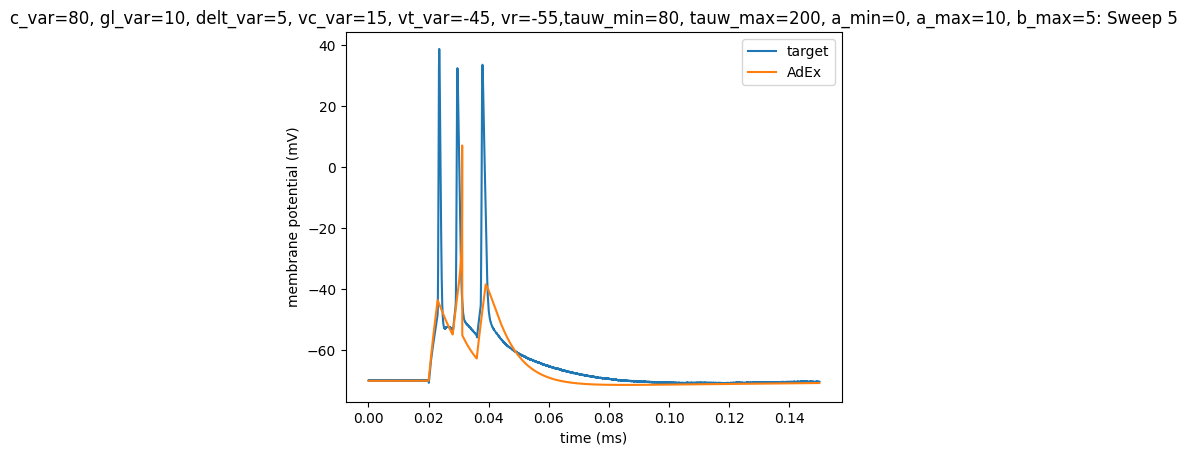

In [15]:
create_comparison_together(fastspikes_output_sliced[3], adex_26[3]*1000, d2_title='AdEx')
title('c_var=80, gl_var=10, delt_var=5, vc_var=15, vt_var=-45, vr=-55,' \
'tauw_min=80, tauw_max=200, a_min=0, a_max=10, b_max=5: Sweep 5')

In [16]:
# attempt c and gl as previous experiment...

# c = 120
# gl = 5

# delt=5
# vc=15
# vt=-45
# vr=-55

adex_27 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, c_var=120, gl_var=5, delt_var=5, vc_var=15, vt_var=-45, vr=-55,
                   tauw_min=80, tauw_max=200, a_min=0, a_max=10, b_max=5)

first fit:
Round 0: Best parameters a=4.65540863 nS, b=0.61314155 nA, tauw=106.09508681 ms (error: 1195.89304669 mV^2)
Round 1: Best parameters a=3.16708208 nS, b=0.38198788 nA, tauw=123.7469388 ms (error: 623.68938591 mV^2)
Round 2: Best parameters a=4.68996164 nS, b=221.66869059 pA, tauw=96.22767078 ms (error: 231.89876798 mV^2)
Round 3: Best parameters a=4.24874978 nS, b=127.60737621 pA, tauw=90.2642152 ms (error: 137.03602589 mV^2)
Round 4: Best parameters a=4.98763664 nS, b=93.0844482 pA, tauw=90.28744758 ms (error: 117.35759939 mV^2)
Round 5: Best parameters a=2.78177455 nS, b=62.78123472 pA, tauw=88.3332282 ms (error: 99.10598708 mV^2)
Round 6: Best parameters a=1.13805014 nS, b=39.92711546 pA, tauw=91.2624771 ms (error: 92.48135689 mV^2)
Round 7: Best parameters a=1.77321011 nS, b=30.73037753 pA, tauw=88.88138353 ms (error: 90.21611767 mV^2)
Round 8: Best parameters a=2.38025407 nS, b=27.81365246 pA, tauw=85.20141602 ms (error: 89.4970895 mV^2)
Round 9: Best parameters a=1.8351

Text(0.5, 1.0, 'c_var=120, gl_var=5, delt_var=5, vc_var=15, vt_var=-45, vr=-55,tauw_min=80, tauw_max=200, a_min=0, a_max=10, b_max=5: Sweep 5')

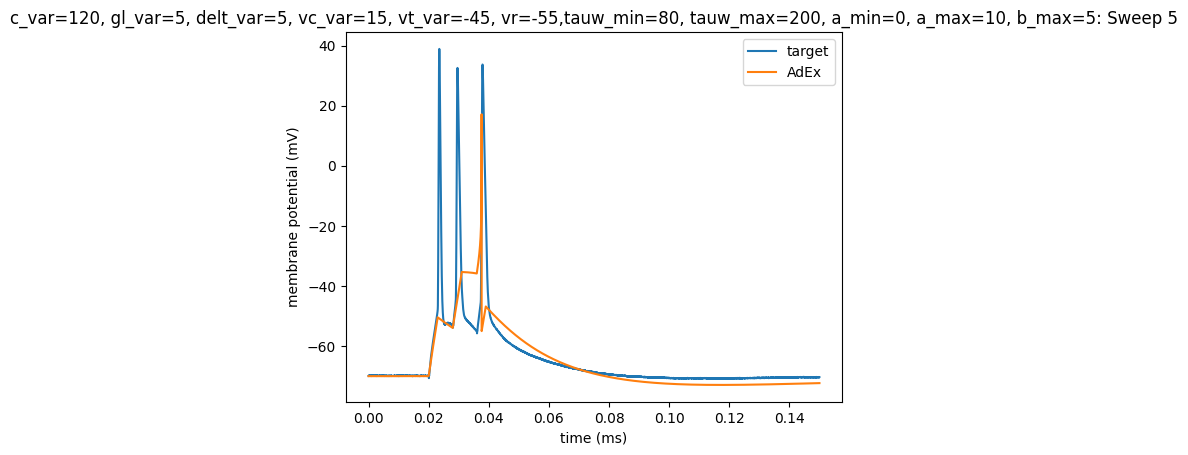

In [17]:
create_comparison_together(fastspikes_output_sliced[3], adex_27[3]*1000, d2_title='AdEx')
title('c_var=120, gl_var=5, delt_var=5, vc_var=15, vt_var=-45, vr=-55,' \
'tauw_min=80, tauw_max=200, a_min=0, a_max=10, b_max=5: Sweep 5')

In [18]:
# reduce param min/max

# c = 120
# gl = 5

# delt=5
# vc=15
# vt=-45
# vr=-55

adex_28 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, c_var=120, gl_var=5, delt_var=5, vc_var=15, vt_var=-45, vr=-55,
                   tauw_min=135, tauw_max=155, a_min=0, a_max=3, b_max=0.01)

first fit:
Round 0: Best parameters a=2.50405634 nS, b=4.28865372 pA, tauw=137.28252275 ms (error: 88.67996744 mV^2)
Round 1: Best parameters a=2.79230282 nS, b=5.87729882 pA, tauw=137.19790083 ms (error: 88.45870906 mV^2)
Round 2: Best parameters a=2.82741041 nS, b=1.41307498 pA, tauw=136.14887162 ms (error: 88.32847805 mV^2)
Round 3: Best parameters a=2.84080426 nS, b=3.12466927 pA, tauw=136.79973969 ms (error: 88.32727202 mV^2)
Round 4: Best parameters a=2.90057227 nS, b=1.28297982 pA, tauw=135.90019961 ms (error: 88.29580062 mV^2)
Round 5: Best parameters a=2.93700966 nS, b=1.22959701 pA, tauw=135.79732863 ms (error: 88.24099677 mV^2)
Round 6: Best parameters a=2.94825903 nS, b=2.07328287 pA, tauw=135.57914381 ms (error: 88.22089892 mV^2)
Round 7: Best parameters a=2.9628164 nS, b=1.22476379 pA, tauw=135.69024365 ms (error: 88.20724829 mV^2)
Round 8: Best parameters a=2.96798304 nS, b=2.44453392 pA, tauw=135.31083459 ms (error: 88.19474637 mV^2)
Round 9: Best parameters a=2.9700042

Text(0.5, 1.0, 'c_var=120, gl_var=5, delt_var=5, vc_var=15, vt_var=-45, vr=-55,tauw_min=135, tauw_max=155, a_min=0, a_max=3, b_max=0.01: Sweep 5')

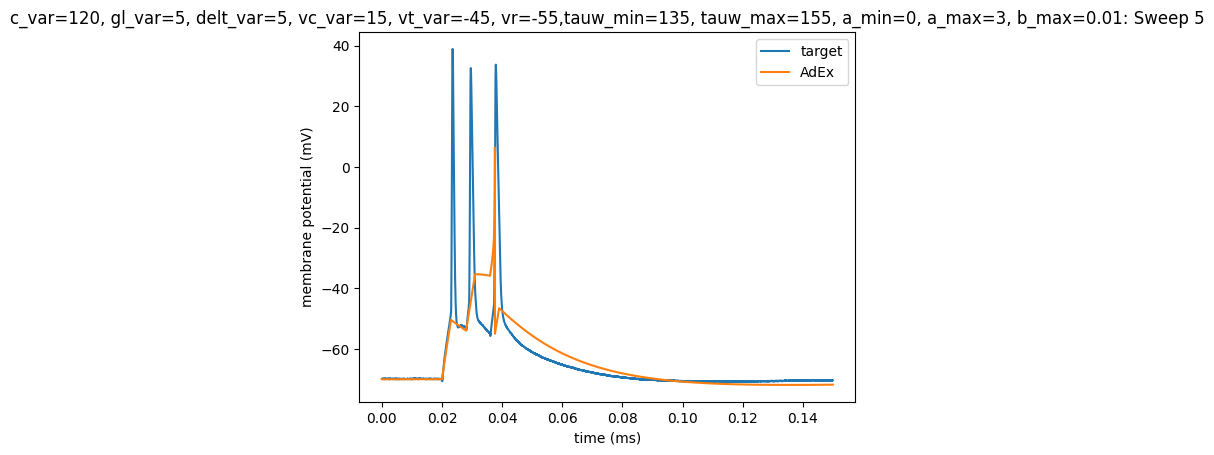

In [21]:
create_comparison_together(fastspikes_output_sliced[3], adex_28[3]*1000, d2_title='AdEx')
title('c_var=120, gl_var=5, delt_var=5, vc_var=15, vt_var=-45, vr=-55,' \
'tauw_min=135, tauw_max=155, a_min=0, a_max=3, b_max=0.01: Sweep 5')

In [20]:
# vt=-50

# c = 120
# gl = 5

# delt=5
# vc=15
# vt=-45
# vr=-55

adex_29 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, c_var=120, gl_var=5, delt_var=5, vc_var=15, vt_var=-50, vr=-55,
                   tauw_min=135, tauw_max=155, a_min=0, a_max=3, b_max=0.01)

first fit:
Round 0: Best parameters a=2.12702846 nS, b=1.8415071 pA, tauw=149.90272065 ms (error: 89.73234897 mV^2)
Round 1: Best parameters a=2.64195455 nS, b=0.933156 pA, tauw=152.4114667 ms (error: 89.53795569 mV^2)
Round 2: Best parameters a=2.31042418 nS, b=0.57642848 pA, tauw=151.80879339 ms (error: 89.28982977 mV^2)
Round 3: Best parameters a=2.36590061 nS, b=0.39635815 pA, tauw=148.5864888 ms (error: 89.14314926 mV^2)
Round 4: Best parameters a=2.15778213 nS, b=0.45741657 pA, tauw=152.52071083 ms (error: 89.05253426 mV^2)
Round 5: Best parameters a=2.35643752 nS, b=0.31858708 pA, tauw=152.45388235 ms (error: 89.0365051 mV^2)
Round 6: Best parameters a=2.11996139 nS, b=247.47224765 fA, tauw=151.28310979 ms (error: 89.02687018 mV^2)
Round 7: Best parameters a=2.07087867 nS, b=247.20522861 fA, tauw=148.27841828 ms (error: 89.00000501 mV^2)
Round 8: Best parameters a=2.30343643 nS, b=234.39903217 fA, tauw=145.68353417 ms (error: 88.96700367 mV^2)
Round 9: Best parameters a=2.303436

In [22]:
create_comparison_together(fastspikes_output_sliced[3], adex_29[3]*1000, d2_title='AdEx')
title('c_var=120, gl_var=5, delt_var=5, vc_var=15, vt_var=-50, vr=-55,' \
'tauw_min=135, tauw_max=155, a_min=0, a_max=3, b_max=0.01: Sweep 5')

Text(0.5, 1.0, 'c_var=120, gl_var=5, delt_var=5, vc_var=15, vt_var=-50, vr=-55,tauw_min=135, tauw_max=155, a_min=0, a_max=3, b_max=0.01: Sweep 5')

In [ ]:
# a_max=2

# vt=-50

# c = 120
# gl = 5

# delt=5
# vc=15
# vt=-45
# vr=-55

adex_30 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, c_var=120, gl_var=5, delt_var=5, vc_var=15, vt_var=-50, vr=-55,
                   tauw_min=135, tauw_max=155, a_min=0, a_max=2, b_max=0.01)

first fit:
Round 0: Best parameters a=1.48156175 nS, b=1.57226352 pA, tauw=150.00354024 ms (error: 90.1104904 mV^2)
Round 1: Best parameters a=1.61383126 nS, b=1.33234044 pA, tauw=144.86792256 ms (error: 89.64086937 mV^2)
Round 2: Best parameters a=1.75256138 nS, b=0.82051921 pA, tauw=140.06628853 ms (error: 89.45523185 mV^2)
Round 3: Best parameters a=1.8094895 nS, b=0.56636477 pA, tauw=141.34170061 ms (error: 89.22594081 mV^2)
Round 4: Best parameters a=1.82658794 nS, b=0.36091854 pA, tauw=142.18155555 ms (error: 89.12619934 mV^2)
Round 5: Best parameters a=1.89757332 nS, b=0.32591666 pA, tauw=138.79992311 ms (error: 89.08058589 mV^2)
Round 6: Best parameters a=1.93197622 nS, b=224.30548022 fA, tauw=137.09673976 ms (error: 89.01556795 mV^2)
Round 7: Best parameters a=1.92826929 nS, b=209.42351834 fA, tauw=136.23156427 ms (error: 88.97312214 mV^2)
Round 8: Best parameters a=1.92826929 nS, b=209.42351834 fA, tauw=136.23156427 ms (error: 88.97312214 mV^2)
Round 9: Best parameters a=1.95

Text(0.5, 1.0, 'c_var=120, gl_var=5, delt_var=5, vc_var=15, vt_var=-50, vr=-55,tauw_min=135, tauw_max=155, a_min=0, a_max=2, b_max=0.01: Sweep 5')

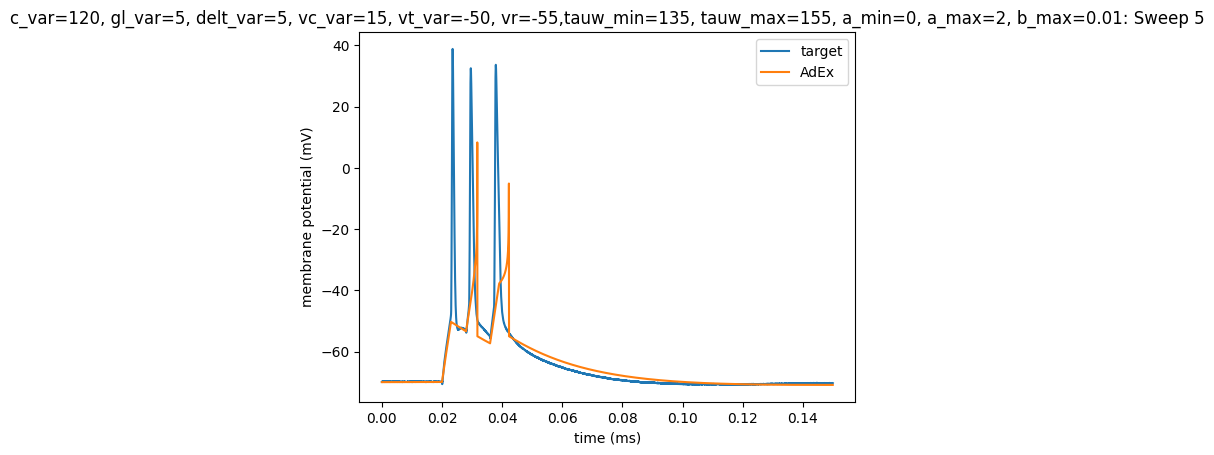

In [24]:
create_comparison_together(fastspikes_output_sliced[3], adex_30[3]*1000, d2_title='AdEx')
title('c_var=120, gl_var=5, delt_var=5, vc_var=15, vt_var=-50, vr=-55,' \
'tauw_min=135, tauw_max=155, a_min=0, a_max=2, b_max=0.01: Sweep 5')

In [ ]:
# bmax=0.0001

# If you want to set a parameter to 0, Brian still expects a unit. Therefore use a=0*b2.nS instead of a=0.

# c = 120
# gl = 5

# delt=5
# vc=15
# vt=-50
# vr=-55

adex_31 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, c_var=120, gl_var=5, delt_var=5, vc_var=15, vt_var=-50, vr=-55,
                   tauw_min=135, tauw_max=155, a_min=0, a_max=3, b_max=0.0001)

first fit:
Round 0: Best parameters a=2.25398493 nS, b=79.92571368 fA, tauw=140.02419402 ms (error: 89.00166769 mV^2)
Round 1: Best parameters a=2.24823475 nS, b=80.1055971 fA, tauw=146.84285507 ms (error: 88.99503253 mV^2)
Round 2: Best parameters a=2.2117443 nS, b=38.86361146 fA, tauw=142.37675014 ms (error: 88.92235808 mV^2)
Round 3: Best parameters a=2.2117443 nS, b=38.86361146 fA, tauw=142.37675014 ms (error: 88.92235808 mV^2)
Round 4: Best parameters a=2.2117443 nS, b=38.86361146 fA, tauw=142.37675014 ms (error: 88.92235808 mV^2)
Round 5: Best parameters a=2.2117443 nS, b=38.86361146 fA, tauw=142.37675014 ms (error: 88.92235808 mV^2)
Round 6: Best parameters a=2.19710238 nS, b=7.81118502 fA, tauw=139.58483199 ms (error: 88.89410423 mV^2)
Round 7: Best parameters a=2.19710238 nS, b=7.81118502 fA, tauw=139.58483199 ms (error: 88.89410423 mV^2)
Round 8: Best parameters a=2.26353647 nS, b=4.681731 fA, tauw=144.00269714 ms (error: 88.8732601 mV^2)
Round 9: Best parameters a=2.26353647

In [27]:
create_comparison_together(fastspikes_output_sliced[3], adex_31[3]*1000, d2_title='AdEx')
title('c_var=120, gl_var=5, delt_var=5, vc_var=15, vt_var=-50, vr=-55,' \
'tauw_min=135, tauw_max=155, a_min=0, a_max=2, b_max=0.0001: Sweep 5')

Text(0.5, 1.0, 'c_var=120, gl_var=5, delt_var=5, vc_var=15, vt_var=-50, vr=-55,tauw_min=135, tauw_max=155, a_min=0, a_max=2, b_max=0.0001: Sweep 5')

In [28]:
create_comparison_together(fastspikes_output_sliced[2], adex_31[2]*1000, d2_title='AdEx')
title('c_var=120, gl_var=5, delt_var=5, vc_var=15, vt_var=-50, vr=-55,' \
'tauw_min=135, tauw_max=155, a_min=0, a_max=2, b_max=0.0001: Sweep 4')

Text(0.5, 1.0, 'c_var=120, gl_var=5, delt_var=5, vc_var=15, vt_var=-50, vr=-55,tauw_min=135, tauw_max=155, a_min=0, a_max=2, b_max=0.0001: Sweep 4')

In [29]:
# bmax=0.0001

# If you want to set a parameter to 0, Brian still expects a unit. Therefore use a=0*b2.nS instead of a=0.

# c = 120
# gl = 5

# delt=1
# vc=75
# vt=-50
# vr=-55

adex_32 = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, c_var=120, gl_var=5, delt_var=1, vc_var=75, vt_var=-50, vr=-55,
                   tauw_min=135, tauw_max=155, a_min=0, a_max=3, b_max=0.0001)

first fit:
Round 0: Best parameters a=2.38994801 nS, b=87.96922218 fA, tauw=142.7339403 ms (error: 86.90305469 mV^2)
Round 1: Best parameters a=2.38994801 nS, b=87.96922218 fA, tauw=142.7339403 ms (error: 86.90305469 mV^2)
Round 2: Best parameters a=2.38994801 nS, b=87.96922218 fA, tauw=142.7339403 ms (error: 86.90305469 mV^2)
Round 3: Best parameters a=2.38994801 nS, b=87.96922218 fA, tauw=142.7339403 ms (error: 86.90305469 mV^2)
Round 4: Best parameters a=2.38994801 nS, b=87.96922218 fA, tauw=142.7339403 ms (error: 86.90305469 mV^2)
Round 5: Best parameters a=2.33167009 nS, b=78.4657316 fA, tauw=138.78113387 ms (error: 86.90149438 mV^2)
Round 6: Best parameters a=2.33167009 nS, b=78.4657316 fA, tauw=138.78113387 ms (error: 86.90149438 mV^2)
Round 7: Best parameters a=2.33167009 nS, b=78.4657316 fA, tauw=138.78113387 ms (error: 86.90149438 mV^2)
Round 8: Best parameters a=2.30740312 nS, b=78.87062938 fA, tauw=137.10392559 ms (error: 86.90082095 mV^2)
Round 9: Best parameters a=2.31529

Text(0.5, 1.0, 'c_var=120, gl_var=5, delt_var=1, vc_var=75, vt_var=-50, vr=-55,tauw_min=135, tauw_max=155, a_min=0, a_max=2, b_max=0.0001: Sweep 5')

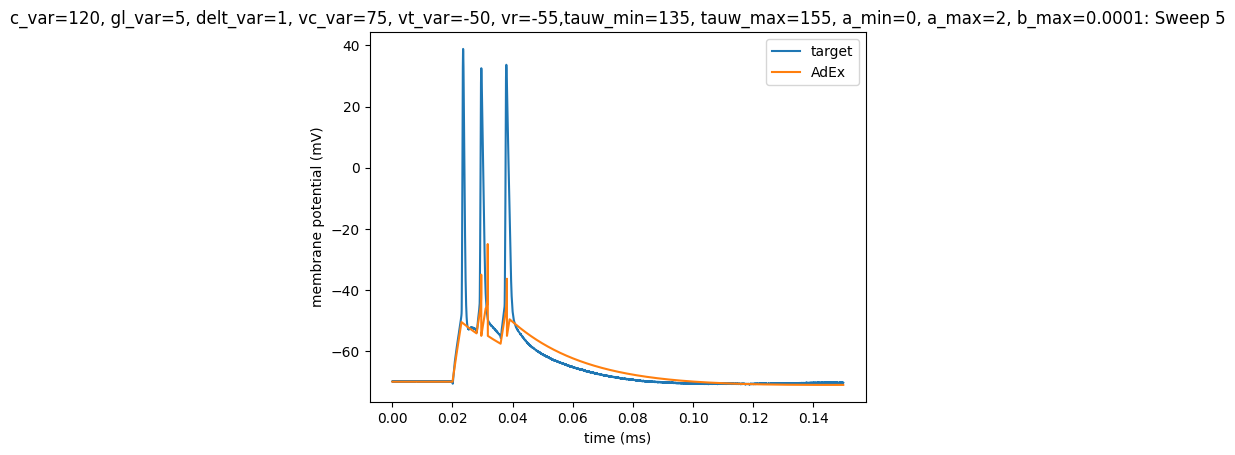

In [30]:
create_comparison_together(fastspikes_output_sliced[3], adex_32[3]*1000, d2_title='AdEx')
title('c_var=120, gl_var=5, delt_var=1, vc_var=75, vt_var=-50, vr=-55,' \
'tauw_min=135, tauw_max=155, a_min=0, a_max=2, b_max=0.0001: Sweep 5')

More work on AdEx poss?

Meanwhile quick check of comparison so far...

hh_20, lif_8, adex_32

In [33]:
hh_best_fit = run_hh(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, ek=-70, ena=68, vt=-70)

first fit:
Round 0: Best parameters g_kd=0.60187237 uS, g_na=5.25286693 uS, gl=17.5827929 nS (error: 135.33027639 mV^2)
Round 1: Best parameters g_kd=0.53384543 uS, g_na=4.0361641 uS, gl=15.91189472 nS (error: 122.44259762 mV^2)
Round 2: Best parameters g_kd=0.42190057 uS, g_na=2.79355918 uS, gl=14.46820096 nS (error: 95.02751025 mV^2)
Round 3: Best parameters g_kd=0.42109741 uS, g_na=1.96476861 uS, gl=12.61850496 nS (error: 85.43042581 mV^2)
Round 4: Best parameters g_kd=0.341667 uS, g_na=1.8462733 uS, gl=12.10113457 nS (error: 72.11719876 mV^2)
Round 5: Best parameters g_kd=0.32013786 uS, g_na=1.52875129 uS, gl=12.3295605 nS (error: 51.61203602 mV^2)
Round 6: Best parameters g_kd=0.32591003 uS, g_na=1.36319465 uS, gl=11.62240121 nS (error: 49.67785439 mV^2)
Round 7: Best parameters g_kd=0.32591003 uS, g_na=1.36319465 uS, gl=11.62240121 nS (error: 49.67785439 mV^2)
Round 8: Best parameters g_kd=0.3174524 uS, g_na=1.30204524 uS, gl=11.16584821 nS (error: 43.92294348 mV^2)
Round 9: Best

In [34]:
lif_best_fit = run_lif(fastspikes_input_sliced, fastspikes_output_sliced, cm_var=120, reset_var='v=-52*mV', thresh_var='v>40*mV')

first fit:
Round 0: Best parameters R=145.57102499 Mohm, tau=12.43364014 ms (error: 77.23996636 mV^2)
Round 1: Best parameters R=145.57102499 Mohm, tau=11.66476945 ms (error: 75.7444573 mV^2)
Round 2: Best parameters R=138.27879464 Mohm, tau=10.98437479 ms (error: 74.41749646 mV^2)
Round 3: Best parameters R=140.27512452 Mohm, tau=10.77357703 ms (error: 73.95852863 mV^2)
Round 4: Best parameters R=137.72117784 Mohm, tau=10.48414945 ms (error: 73.43743492 mV^2)
Round 5: Best parameters R=138.35416063 Mohm, tau=10.35922987 ms (error: 73.18420575 mV^2)
Round 6: Best parameters R=138.37742637 Mohm, tau=10.28360176 ms (error: 73.04147929 mV^2)
Round 7: Best parameters R=140.75457433 Mohm, tau=10.21826486 ms (error: 72.9482187 mV^2)
Round 8: Best parameters R=139.12074908 Mohm, tau=10.15227828 ms (error: 72.79994387 mV^2)
Round 9: Best parameters R=138.49974002 Mohm, tau=10.12582184 ms (error: 72.74932955 mV^2)


In [35]:
adex_best_fit = run_adex(fastspikes_input_sliced, fastspikes_output_sliced, c_var=120, gl_var=5, delt_var=1, vc_var=75, vt_var=-50, vr=-55,
                   tauw_min=135, tauw_max=155, a_min=0, a_max=3, b_max=0.0001)

first fit:
Round 0: Best parameters a=2.49716304 nS, b=16.1312546 fA, tauw=146.04870976 ms (error: 86.94200955 mV^2)
Round 1: Best parameters a=2.45808932 nS, b=13.61537131 fA, tauw=145.15284109 ms (error: 86.92301165 mV^2)
Round 2: Best parameters a=2.44378593 nS, b=39.70655003 fA, tauw=144.2797492 ms (error: 86.92111587 mV^2)
Round 3: Best parameters a=2.39014773 nS, b=73.82265041 fA, tauw=142.49087943 ms (error: 86.9051577 mV^2)
Round 4: Best parameters a=2.38952447 nS, b=82.79671328 fA, tauw=142.49087943 ms (error: 86.9043781 mV^2)
Round 5: Best parameters a=2.38620137 nS, b=89.29274876 fA, tauw=142.43816224 ms (error: 86.90306967 mV^2)
Round 6: Best parameters a=2.33816 nS, b=85.36469569 fA, tauw=139.00323112 ms (error: 86.90284745 mV^2)
Round 7: Best parameters a=2.33816 nS, b=85.36469569 fA, tauw=139.00323112 ms (error: 86.90284745 mV^2)
Round 8: Best parameters a=2.37094762 nS, b=82.44925681 fA, tauw=141.46658184 ms (error: 86.90259434 mV^2)
Round 9: Best parameters a=2.3727819

Text(0.5, 1.0, 'Best fit comparison for Short Square - Triple: sweep 2')

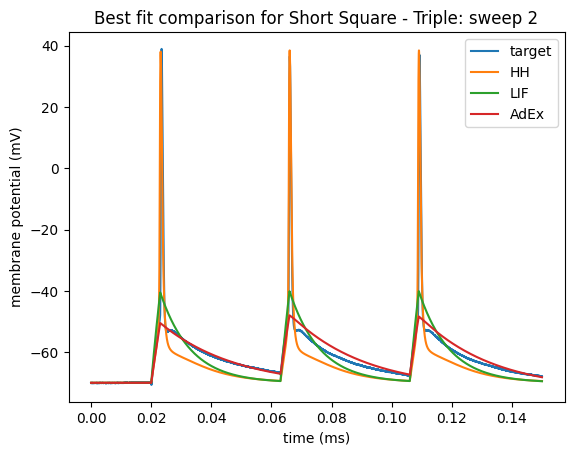

In [36]:
create_comparison_together_four(fastspikes_output_sliced[0], hh_best_fit[0]*1000, lif_best_fit[0]*1000, adex_best_fit[0]*1000,
                                d2_title='HH', d3_title='LIF', d4_title='AdEx')
title('Best fit comparison for Short Square - Triple: sweep 2')

In [37]:
create_comparison_together_four(fastspikes_output_sliced[1], hh_best_fit[1]*1000, lif_best_fit[1]*1000, adex_best_fit[1]*1000,
                                d2_title='HH', d3_title='LIF', d4_title='AdEx')
title('Best fit comparison for Short Square - Triple: sweep 3')

Text(0.5, 1.0, 'Best fit comparison for Short Square - Triple: sweep 3')

Text(0.5, 1.0, 'Best fit comparison for Short Square - Triple: sweep 4')

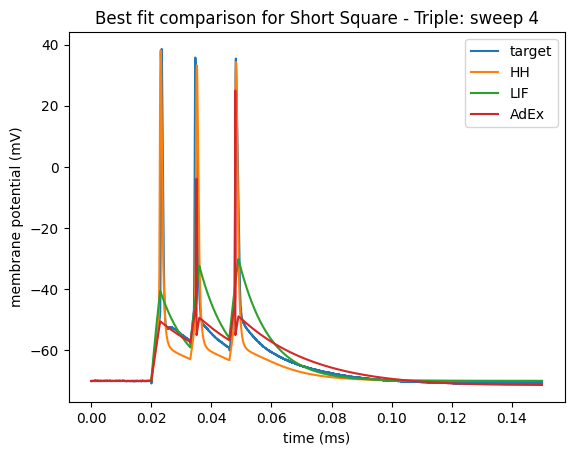

In [38]:
create_comparison_together_four(fastspikes_output_sliced[2], hh_best_fit[2]*1000, lif_best_fit[2]*1000, adex_best_fit[2]*1000,
                                d2_title='HH', d3_title='LIF', d4_title='AdEx')
title('Best fit comparison for Short Square - Triple: sweep 4')

In [39]:
create_comparison_together_four(fastspikes_output_sliced[3], hh_best_fit[3]*1000, lif_best_fit[3]*1000, adex_best_fit[3]*1000,
                                d2_title='HH', d3_title='LIF', d4_title='AdEx')
title('Best fit comparison for Short Square - Triple: sweep 5')

Text(0.5, 1.0, 'Best fit comparison for Short Square - Triple: sweep 5')

HH much more accurate. Biologically complex?  Very fast spikes...

But when ISI longer, LIF is sufficient...